<a href="https://colab.research.google.com/github/nitrogenlab/oceanography_colab_notebooks/blob/master/Mbari_Nitrite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Background Info

## Ken Johnson Slide

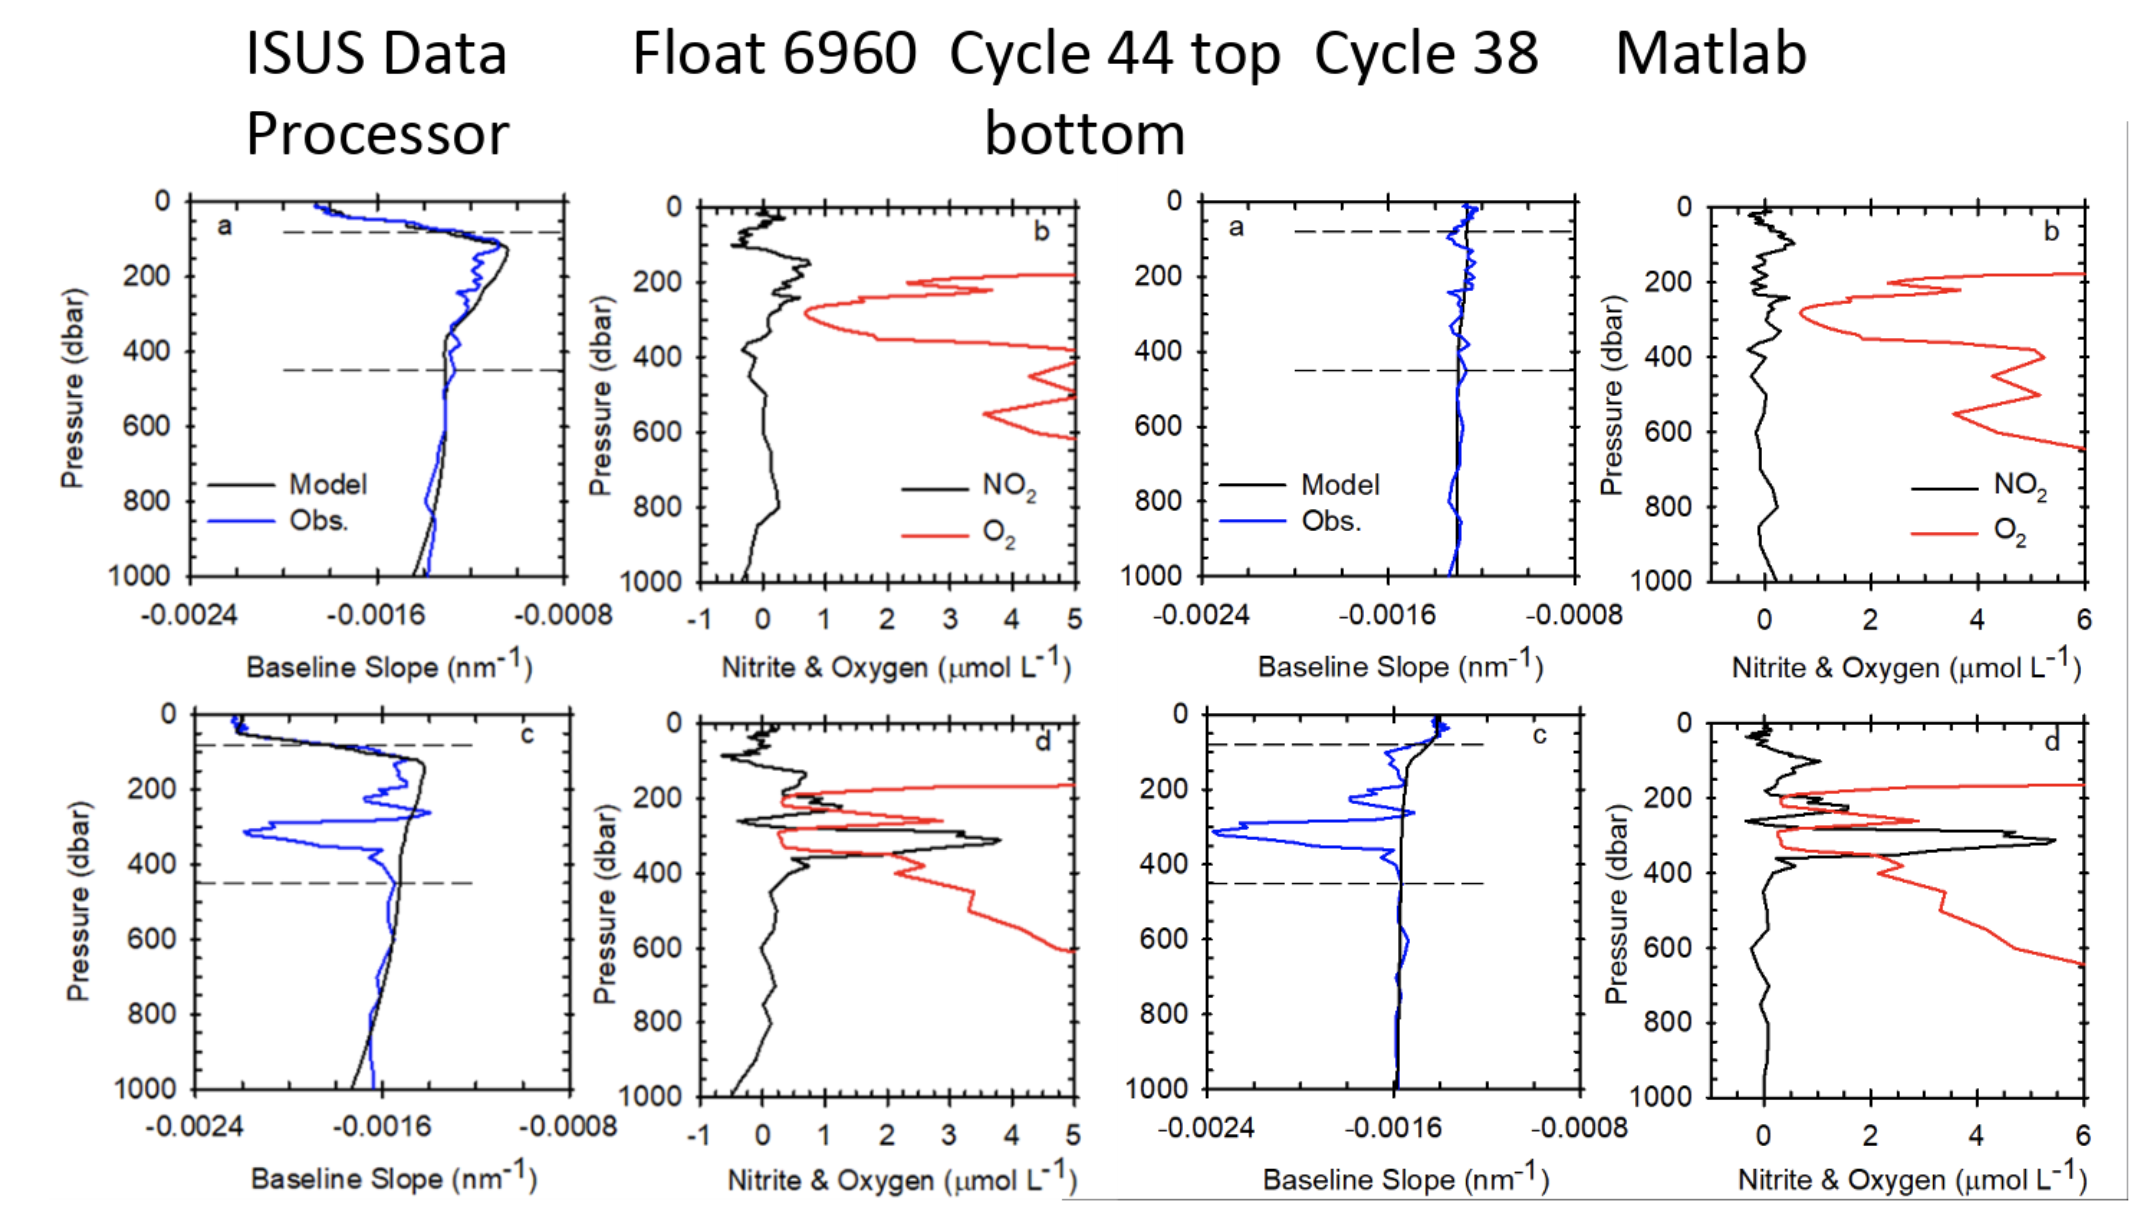

Let's try replicating the calculation that gets us here.
Matlab code:
```
float_out = calc_FLOAT_NO3(parse_NO3msg('../data/f6960/6960.038.isus'), ...
                           parseNO3cal(['../data/6960ETNP.cal']), 1);
```
When I set `fig_flag=1` in `calc_FLOAT_NO3`, it gives me:
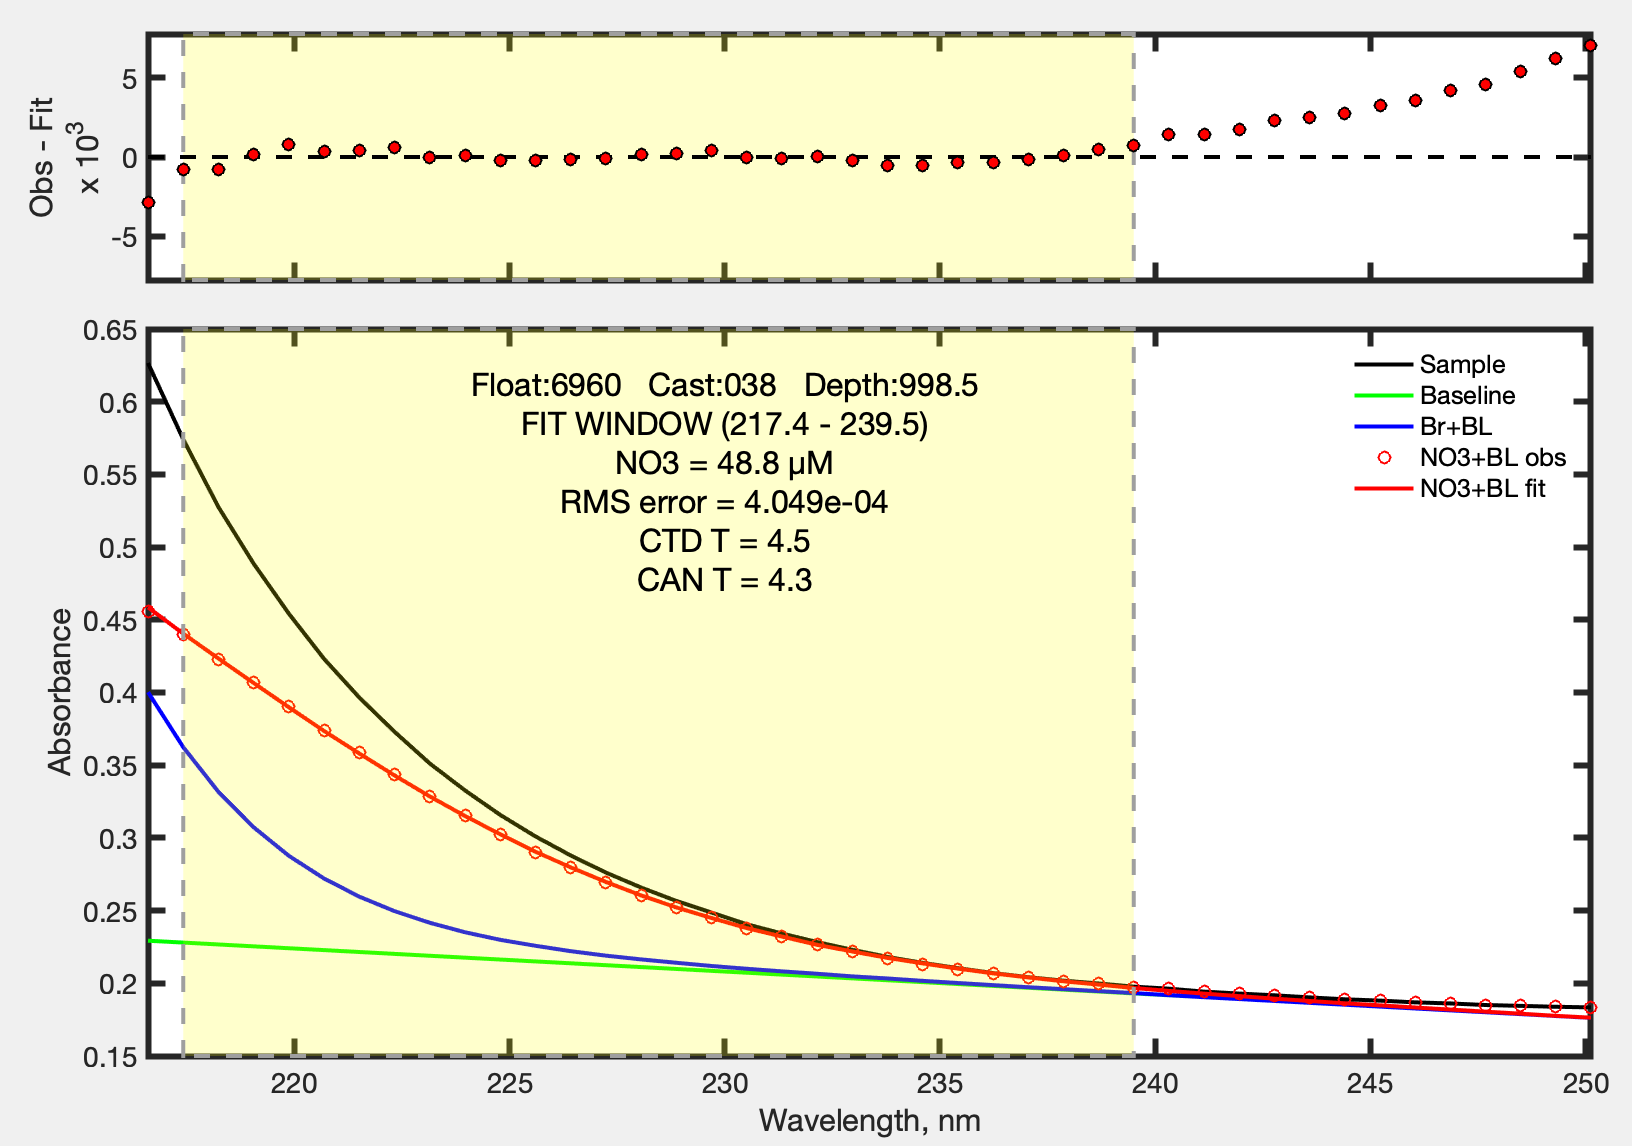

When I additionally modify the figure plotting code to read `if fig_flag == 1 && d.P(i) > 320 && d.P(i) < 325`, and rerun:

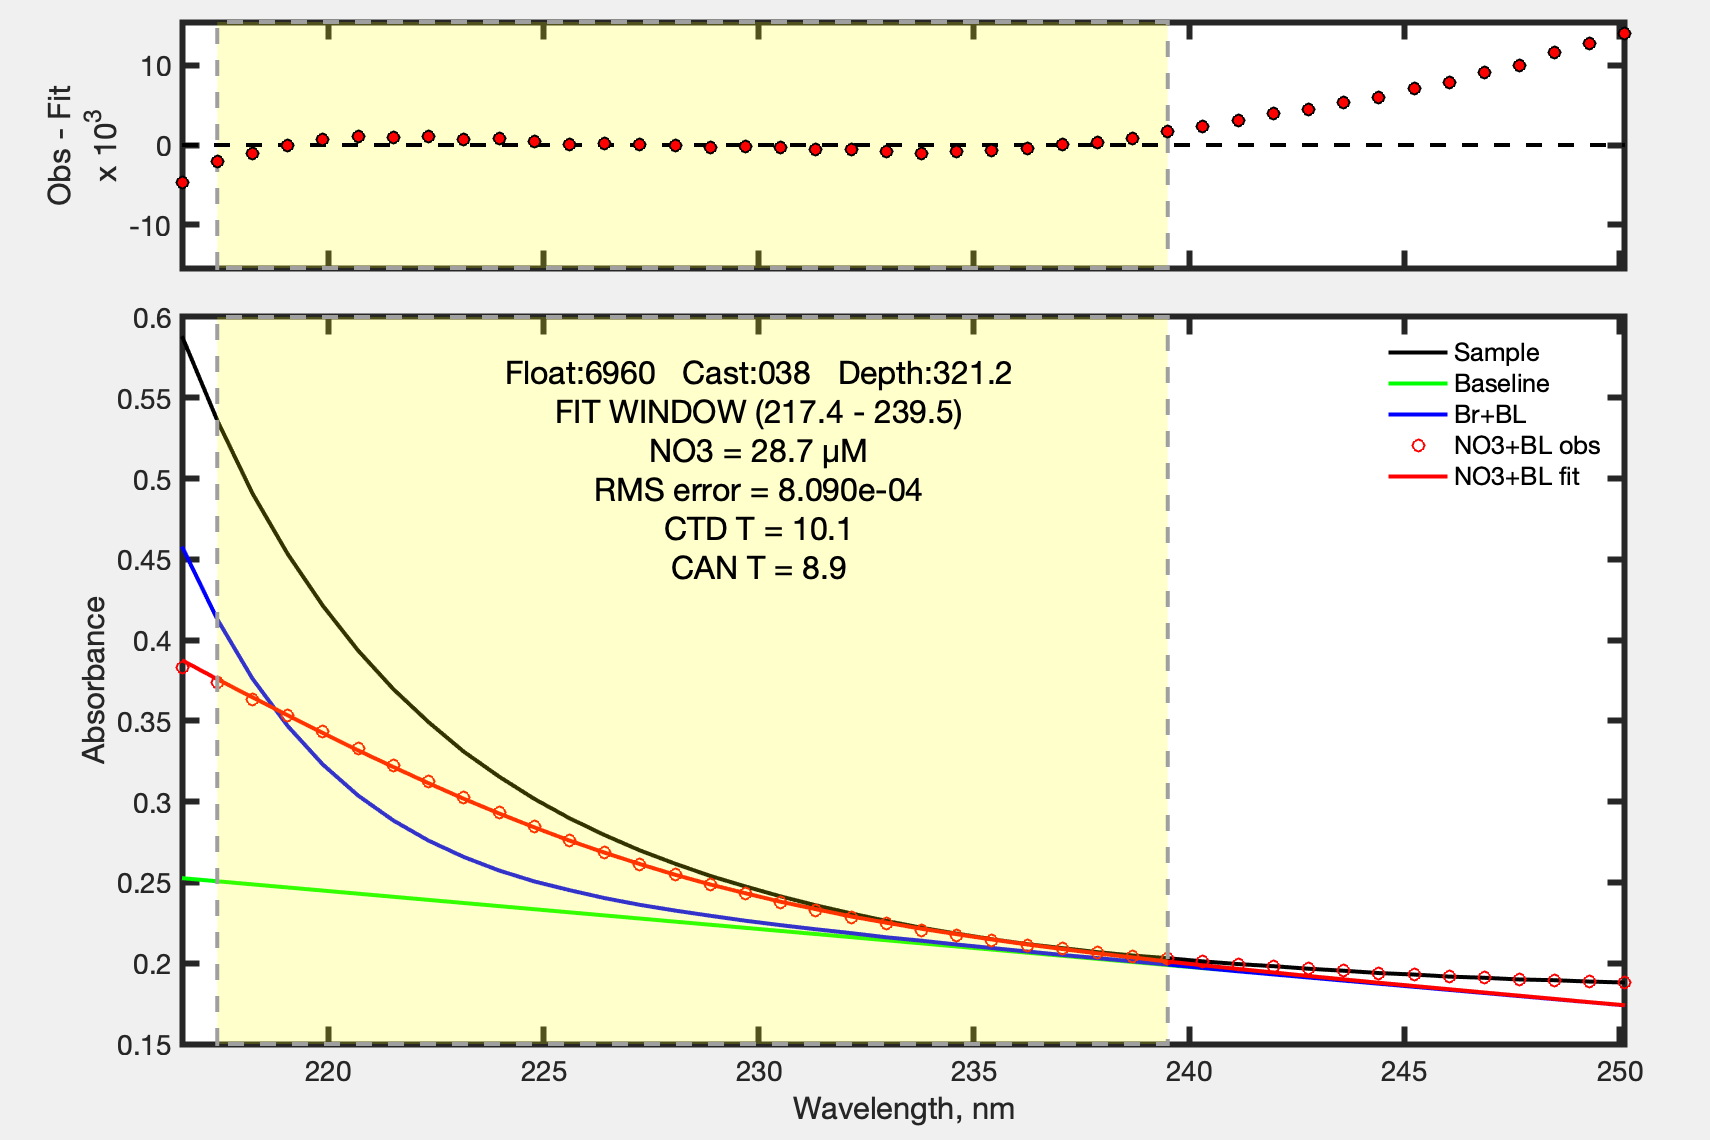

## Loading data

### Loading the NO2 calibration file

From Carol's file, this is what we have:

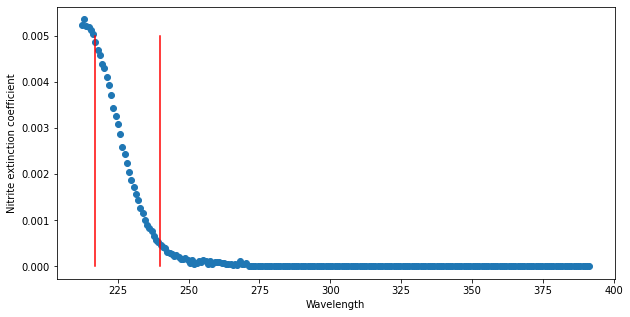

In [1]:
import numpy as np
from matplotlib import pyplot as plt

NO2_CALIBRATION = np.array([[float(y) for y in line.split("\t")]
for line in """188.72165	0
189.50553	0
190.28965	0
191.07401	0
191.8586	0
192.64342	0
193.42847	0
194.21374	0
194.99924	0
195.78497	0
196.57091	0
197.35708	0
198.14346	0
198.93007	0
199.71688	0
200.50391	0
201.29115	0
202.0786	0
202.86626	0
203.65412	0
204.44219	0
205.23046	0
206.01892	0
206.80759	0
207.59646	0
208.38552	0
209.17477	0
209.96422	0
210.75385	0.004721222
211.54367	0.005339739
212.33368	0.005245286
213.12387	0.005359278
213.91425	0.005218105
214.70481	0.005202853
215.49554	0.005122763
216.28645	0.005035626
217.07754	0.004873293
217.8688	0.004703011
218.66024	0.004589661
219.45184	0.004389361
220.24361	0.004306917
221.03555	0.004099126
221.82766	0.003944285
222.61992	0.003718527
223.41235	0.003430067
224.20494	0.003264324
224.99768	0.003078751
225.79058	0.002862496
226.58363	0.00259466
227.37684	0.002443669
228.1702	0.002239673
228.9637	0.002045755
229.75736	0.001864425
230.55115	0.001732923
231.3451	0.001571675
232.13918	0.00143475
232.9334	0.00126724
233.72776	0.00115626
234.52226	0.001016981
235.31689	0.000894032
236.11165	0.000823814
236.90655	0.000760029
237.70157	0.000657388
238.49672	0.000572856
239.292	0.000527434
240.0874	0.000474111
240.88292	0.000413422
241.67856	0.000398873
242.47432	0.000303263
243.2702	0.000289365
244.06619	0.000268764
244.8623	0.000218339
245.65851	0.000238042
246.45484	0.000196357
247.25127	0.000160503
248.04781	0.000170317
248.84445	0.00018283
249.6412	0.000133921
250.43804	8.27679E-05
251.23499	0.000130841
252.03203	6.2795E-05
252.82917	6.43983E-05
253.6264	0.000113104
254.42372	9.60558E-05
255.22113	0.000147087
256.01863	0.000107363
256.81621	4.43323E-05
257.61388	0.000117806
258.41164	5.63874E-05
259.20947	8.93904E-05
260.00738	9.65758E-05
260.80537	9.81288E-05
261.60344	8.37169E-05
262.40158	6.40219E-05
263.19979	5.80813E-05
263.99807	6.01503E-05
264.79642	5.32815E-05
265.59484	4.10022E-05
266.39332	5.89877E-05
267.19186	2.8733E-05
267.99047	0.000121125
268.78913	5.92101E-05
269.58786	4.29434E-05
270.38663	6.68397E-05
271.18547	0
271.98435	0
272.78329	0
273.58227	0
274.3813	0
275.18038	0
275.9795	0
276.77866	0
277.57786	0
278.3771	0
279.17638	0
279.97569	0
280.77503	0
281.5744	0
282.37381	0
283.17324	0
283.97269	0
284.77217	0
285.57167	0
286.37119	0
287.17073	0
287.97029	0
288.76986	0
289.56945	0
290.36904	0
291.16865	0
291.96826	0
292.76788	0
293.5675	0
294.36713	0
295.16676	0
295.96638	0
296.766	0
297.56562	0
298.36523	0
299.16483	0
299.96443	0
300.76401	0
301.56357	0
302.36312	0
303.16266	0
303.96217	0
304.76167	0
305.56114	0
306.36058	0
307.16001	0
307.9594	0
308.75876	0
309.55809	0
310.35739	0
311.15665	0
311.95588	0
312.75507	0
313.55421	0
314.35332	0
315.15238	0
315.95139	0
316.75036	0
317.54928	0
318.34815	0
319.14696	0
319.94572	0
320.74442	0
321.54307	0
322.34165	0
323.14017	0
323.93863	0
324.73702	0
325.53535	0
326.33361	0
327.13179	0
327.92991	0
328.72795	0
329.52591	0
330.32379	0
331.1216	0
331.91932	0
332.71696	0
333.51452	0
334.31199	0
335.10937	0
335.90666	0
336.70385	0
337.50096	0
338.29797	0
339.09488	0
339.89169	0
340.6884	0
341.485	0
342.2815	0
343.0779	0
343.87419	0
344.67036	0
345.46643	0
346.26238	0
347.05822	0
347.85393	0
348.64953	0
349.44501	0
350.24037	0
351.0356	0
351.83071	0
352.62569	0
353.42054	0
354.21525	0
355.00984	0
355.80429	0
356.5986	0
357.39277	0
358.1868	0
358.9807	0
359.77444	0
360.56804	0
361.3615	0
362.1548	0
362.94795	0
363.74095	0
364.5338	0
365.32649	0
366.11902	0
366.91139	0
367.7036	0
368.49565	0
369.28753	0
370.07924	0
370.87078	0
371.66216	0
372.45336	0
373.24438	0
374.03523	0
374.82591	0
375.6164	0
376.40671	0
377.19684	0
377.98678	0
378.77654	0
379.56611	0
380.35548	0
381.14467	0
381.93366	0
382.72246	0
383.51106	0
384.29945	0
385.08765	0
385.87565	0
386.66344	0
387.45102	0
388.2384	0
389.02556	0
389.81252	0
390.59926	0
391.38578	0""".split("\n")])[30:] #going to assume the dropoff at the beginning
#                                  isn't real, hence dropping the first 30 vals



fig = plt.figure(figsize=(10,5))
plt.scatter(NO2_CALIBRATION[:,0], NO2_CALIBRATION[:,1])
plt.plot([217,217],[0,0.005], color="red")
plt.plot([240,240],[0,0.005], color="red")
plt.ylabel("Nitrite extinction coefficient")
plt.xlabel("Wavelength")
plt.show()

### Loading the result of Josh's fit

Let's try replicating Josh's results with our own fit. I modified `calc_FLOAT_NO3` to be:
`function [NO3, t_fit, ABS_cor, WL_row, ENO3] = calc_FLOAT_NO3(spec, ncal, Pcor_flag)`
where `WL_row` was defined as `WL_row = WL(1,:);` (all the rows of `WL` seem to be identical). Note that `NO3` returns a bunch of things - from the original documentation: `[SDN, DarkCur,Pres,Temp,Sal,NO3,BL_B,BL_M,RMS ERROR,WL~240,ABS~240]`.

In [2]:
import numpy as np

def parse_csv_mat(strinp):
    return np.array([[float(x) for x in line.split(",")]
                     for line in strinp.split("\n")])

def parse_csv_vec(line):
    return np.array([float(x) for x in line.split(",")])

ORIG_OUT = parse_csv_mat("""735146.699571759,1870.88,998.46,4.5377,34.5255,48.7551324229253,0.572325057718004,-0.00158366491993903,0.000404887556939172,239.50323,0.19745040260822
735146.705069444,1873.78,950.89,4.7239,34.519,48.7106482916099,0.571270199888287,-0.00158197372114137,0.000435838818406126,239.50323,0.196765825691228
735146.711226852,1873.58,900.87,4.9739,34.5118,48.3348831431423,0.573438893589846,-0.00159020595991259,0.000404041455032615,239.50323,0.197089488806869
735146.718275463,1872.83,851.3,5.2606,34.5061,47.825038987374,0.574073275504729,-0.00159087276555191,0.000551218375271941,239.50323,0.197472980561015
735146.724456019,1868.16,801.31,5.573,34.5052,47.2028233452575,0.573796640662101,-0.00158839331699465,0.0003936621032347,239.50323,0.19757839171422
735146.730474537,1863.02,751.3,5.8062,34.4963,46.2169002298092,0.569797320948236,-0.00156689367383593,0.000485521659887002,239.50323,0.198760462303612
735146.737789352,1860.11,701.61,6.0893,34.4935,45.2306027639393,0.574549099395805,-0.00158913840411749,0.000366976203955321,239.50323,0.198145246513461
735146.743969907,1857.95,651.48,6.4785,34.4976,44.370363514287,0.568373531342984,-0.00155763625974101,0.000361783008399792,239.50323,0.199413475729386
735146.750636574,1855.47,601.53,6.9443,34.5046,42.8864298813554,0.56403494242006,-0.00153754201336144,0.000464997034109342,239.50323,0.199765322119898
735146.757824074,1848.66,550.71,7.2321,34.4957,41.5870641092128,0.575036224138779,-0.00158208239503397,0.000481062417056542,239.50323,0.200167237647372
735146.764108796,1841.54,501.18,7.8149,34.5173,40.3930892605715,0.574500548005863,-0.0015783344508187,0.000423336512399277,239.50323,0.200365480070391
735146.771030093,1836.9,451.07,8.338,34.526,38.7661069163169,0.571771680313445,-0.00156595709236486,0.000549699498248879,239.50323,0.20036224827498
735146.776921296,1830.72,401.02,9.0089,34.5787,38.2025325813428,0.577192766875571,-0.00159123120656692,0.000469245845781958,239.50323,0.199731792383525
735146.779386574,1827.18,381.32,9.2761,34.5949,37.4544944697392,0.593293099128458,-0.00165351717425487,0.000559454722672632,239.50323,0.20098188676404
735146.781840278,1818.59,361.55,9.5574,34.5984,36.733508425079,0.580724167169646,-0.00159953950273061,0.00059274318213354,239.50323,0.201318042903893
735146.783136574,1817.66,351.26,9.7035,34.6082,33.5289623490382,0.661771168350545,-0.00193815842688182,0.000643826313587433,239.50323,0.201263524769741
735146.784456018,1816.59,341.04,9.8094,34.6148,32.4052718248816,0.684592254914212,-0.00203243100126112,0.000658505004616366,239.50323,0.201647587974049
735146.785752315,1815.28,331.31,9.9577,34.623,30.6844183133324,0.719345718386196,-0.002170068207788,0.000687270258300545,239.50323,0.203227773311228
735146.787175926,1810.87,321.22,10.1041,34.6311,28.6975336819343,0.761554299453871,-0.00234948158912651,0.000808953892534397,239.50323,0.202775671638551
735146.788599537,1809.06,311.63,10.2126,34.6401,28.0613551783131,0.767310736421856,-0.00237267374846533,0.000817351552295499,239.50323,0.202794417050023
735146.790289352,1804.28,301.29,10.3482,34.6367,28.3067343202793,0.732818213916932,-0.00222819569141125,0.000811864075232172,239.50323,0.202813269545538
735146.792083333,1804.95,289.81,10.4811,34.6459,27.5291767189166,0.740847020972209,-0.00225927107249875,0.000799294831096757,239.50323,0.20338804085502
735146.793113426,1803,280.93,10.5073,34.6199,29.5351590927895,0.602817121780088,-0.00168651794756782,0.000531073908547552,239.50323,0.20211670923217
735146.794293982,1800.5,271.2,10.5378,34.6097,29.6034759862023,0.573757414007467,-0.0015661122887143,0.000508274465532831,239.50323,0.201807544721193
735146.795474537,1800.79,261.46,10.6321,34.6054,29.3802522191359,0.559686641458016,-0.00151041896126206,0.000584463393914958,239.50323,0.200877524631493
735146.796770833,1799.02,251.15,10.835,34.6248,28.9022446575221,0.582857051368403,-0.0016008469457551,0.000465139713328101,239.50323,0.20233959365601
735146.798078704,1796.49,240.95,11.0096,34.6419,28.3035216388666,0.605348879054121,-0.00169736762707778,0.000509511936131881,239.50323,0.201938365752993
735146.799386574,1794.58,230.84,11.2341,34.6609,27.881527442478,0.627910026311639,-0.00178628914654389,0.00062612692615552,239.50323,0.203241855311314
735146.80068287,1790.44,221.57,11.3902,34.6697,27.5630562307663,0.628578167266657,-0.00178786252731147,0.000627189964648731,239.50323,0.203536746946247
735146.80212963,1787.14,211.77,11.4895,34.6667,27.7758647927914,0.600756320620669,-0.00167545786793705,0.000536751967309668,239.50323,0.202433458943836
735146.803668982,1786.06,201.46,11.6989,34.6642,27.2580406232389,0.610863335369323,-0.00171183477135763,0.000695972534017211,239.50323,0.203842140455145
735146.805358796,1785.83,191.33,11.9275,34.6504,27.6920581359199,0.576929443841025,-0.00156853513001723,0.000503205248397889,239.50323,0.204116762746714
735146.806990741,1780.43,180.76,12.1635,34.6198,27.6740708976236,0.571563310791948,-0.001550194485155,0.000539721016205648,239.50323,0.203078250461254
735146.808148148,1777.62,171.09,12.2851,34.5959,27.5185728333778,0.577563864312799,-0.00157356793935603,0.000541130412813166,239.50323,0.203397524402796
735146.809340278,1780.13,161.49,12.5408,34.5183,27.2537665588577,0.579425672133191,-0.00157980365411269,0.000533946398454118,239.50323,0.203773518791884
735146.810636574,1772.79,151.51,12.6306,34.4823,26.8755698846853,0.580982573068942,-0.001579861087235,0.000550059785812547,239.50323,0.205362510611591
735146.812048611,1771.07,141.68,12.6799,34.4506,26.6335108092016,0.583710814501222,-0.00159435604910756,0.000475874840722363,239.50323,0.204407962344498
735146.814641204,1771.9,131.67,13.8341,34.2428,23.3265748399963,0.59042610604435,-0.00161817016283929,0.000508683452794121,239.50323,0.205286849314305
735146.817835648,1767.32,121.54,14.9156,34.1859,18.5639965549475,0.586563710034145,-0.00159937599553915,0.00048622239090924,239.50323,0.20562501580135
735146.824155093,1757.17,111.86,16.5831,34.1816,13.4205294629326,0.591445102294777,-0.00161526229859897,0.000499340782784584,239.50323,0.206078633382869
735146.831828704,1735.05,101.8,19.4386,34.2754,5.64661768881499,0.595847680303381,-0.00163747899455848,0.000445929915082389,239.50323,0.204572538449152
735146.833877315,1728.18,96.73,19.9079,34.2924,4.29093038243625,0.586740630336007,-0.00160244188068189,0.000517202978738376,239.50323,0.203461207177581
735146.835625,1718.69,91.76,20.9556,34.3464,2.28478504874237,0.58080269174466,-0.00157836526333594,0.000480703903988855,239.50323,0.20322373061745
735146.838657407,1712.29,86.86,21.7198,34.3976,1.6540181072088,0.569482434130629,-0.00153184445276658,0.000399478525443626,239.50323,0.202836647760733
735146.840196759,1703.86,81.87,23.1305,34.5016,1.08777972273308,0.567273184537841,-0.00152624554332569,0.000513516253757333,239.50323,0.201788828477638
735146.845439815,1693.79,76.54,24.1055,34.5339,1.30668168027917,0.556582557282309,-0.00148179463617828,0.000432591119933206,239.50323,0.201574461166949
735146.846875,1683.37,71.9,24.6818,34.5349,1.42566088137126,0.551542565222084,-0.00146649386638914,0.000385419494000268,239.50323,0.200277189398209
735146.84974537,1677.59,66.51,25.453,34.5362,1.54095706684995,0.545780192407887,-0.00144204106244695,0.000455562959859198,239.50323,0.20021525784201
735146.852627315,1672.3,61.81,26.2555,34.5327,1.54578888603721,0.541685889228196,-0.00142941316274034,0.000400053558155726,239.50323,0.199123724839441
735146.856157407,1666.5,56.81,26.704,34.5093,1.67943769392501,0.533449721745226,-0.00139954266060771,0.000455740240609396,239.50323,0.197935350245808
735146.859918981,1661.15,51.6,27.3167,34.3697,1.39490244230392,0.533526277419458,-0.00140466632121457,0.000456337759684669,239.50323,0.196770760764585
735146.861354167,1659.05,46.69,27.355,34.3706,1.33593996485284,0.537597503645944,-0.00142114692031001,0.000424325145942015,239.50323,0.197063848963858
735146.862847222,1657.12,40.39,27.3852,34.3681,1.44244258382072,0.528867157920641,-0.0013833030479813,0.000529695808712885,239.50323,0.197063665158987
735146.86349537,1654.03,36.25,27.3863,34.3679,1.52397449544865,0.524708132529407,-0.00136395185010086,0.0005624238449763,239.50323,0.197516038578065
735146.864293981,1648.99,31.4,27.3872,34.3678,1.129427777861,0.540499802399212,-0.00142916415053799,0.000643783404948414,239.50323,0.197742410540824
735146.865081019,1654.9,26.54,27.3922,34.3664,1.42521032531994,0.529683093351088,-0.00138088261545592,0.000530553294630813,239.50323,0.198405400240275
735146.86599537,1656.2,21.13,27.3998,34.3659,1.27391135554232,0.5425353581361,-0.00143289349773819,0.00062885072823905,239.50323,0.198935822767716
735146.866793982,1652.69,16.69,27.4077,34.3659,1.26005889446062,0.543468919543041,-0.00143361023824414,0.000499984529176418,239.50323,0.199557998682407
735146.867696759,1656.14,11.68,27.4175,34.3664,1.40157454473844,0.539221818832924,-0.00141192098363929,0.000541562568159089,239.50323,0.200725622984036
735146.868483796,1657.47,7.53,27.4369,34.366,1.31914864955986,0.542887603358972,-0.00142219403915646,0.000535474457694928,239.50323,0.201999818366872""")

ABS_COR = parse_csv_mat("""0.455657991208099,0.439719876112404,0.422616213084751,0.406701185029024,0.390640898794826,0.373858508781492,0.358435112495904,0.343564740446738,0.328477882112885,0.315188864183315,0.302254825806459,0.290262861028778,0.279597884939839,0.26959013699203,0.260600343004305,0.252379983488038,0.245333031190201,0.237930488326646,0.232033160147906,0.226479875534142,0.221664121335231,0.216912282175315,0.213166624718995,0.209744266375739,0.206506606620372,0.203857958323856,0.201470505743801,0.199589830757377,0.19745040260822,0.196207797426118,0.194275985401111,0.192937142524251,0.191737617021857,0.19030214787292,0.188989386572699,0.188087911642083,0.186886551305849,0.186143615565314,0.185067314037401,0.184470420902983,0.183853030784132,0.183424661934262
0.455626168415998,0.438578705424977,0.421860045911277,0.406230253821452,0.38910680536627,0.373162489667576,0.357892272140263,0.342611565520742,0.328117381950317,0.314427547127641,0.301345562114516,0.29001055243799,0.278697166343462,0.268908478445364,0.260019647247741,0.251555884819096,0.244417896415791,0.237434526072205,0.231033333014318,0.225702504303576,0.220563941312449,0.21629818657776,0.21261361774276,0.20902358426967,0.205931762925884,0.203334161100159,0.200990791861592,0.198895889906467,0.196765825691228,0.195190464488398,0.193794936015384,0.192413191477972,0.190987125849143,0.189644353718863,0.188285735015313,0.187535758565367,0.186349265065244,0.185563303990678,0.184751629907183,0.184075864425694,0.183327186285589,0.182961301822626
0.45283829239731,0.437839872016965,0.420629273142021,0.404828049474178,0.388122698479862,0.372709324322696,0.356919325796492,0.34175920360141,0.327441257863549,0.314144620815613,0.301105248936077,0.289494397224136,0.278478837180561,0.268422546189846,0.260088070571719,0.251800396757427,0.244465886302375,0.237703227190179,0.231351630522,0.225503601705564,0.220829997967847,0.216400522039016,0.212784253616609,0.209297515169332,0.206192302020189,0.203304554083845,0.200830132629723,0.199014649571558,0.197089488806869,0.195270132376131,0.194122190027687,0.192736301527313,0.191211648837806,0.189985429311897,0.188750251159469,0.187876256000348,0.186791897858465,0.185820709894377,0.184884934344076,0.184092383160964,0.183497306944666,0.183164105113408
0.452425792110288,0.434901273299972,0.419459732757283,0.40355014588832,0.387952371918755,0.371689768838371,0.356007880027942,0.341282404814578,0.326454426387673,0.313121830348792,0.300781726487398,0.289131050015812,0.278113721608425,0.268848659577477,0.25995173404228,0.251882832552497,0.244391985278597,0.237670065779612,0.231501839961859,0.225788435532102,0.221105269771872,0.216711032743242,0.213057743373329,0.209402333403946,0.20667129874443,0.203760634380585,0.201472903274198,0.199503522271546,0.197472980561015,0.196152063792841,0.194473684173807,0.193083341326309,0.191541322193152,0.190399835685316,0.188988550205452,0.188345306848022,0.186974972688748,0.186404168224188,0.185439174372902,0.184738138380061,0.184070318393041,0.1835157784158
0.448823711309952,0.433709288722647,0.416825113182432,0.401044648173085,0.385500047835806,0.369321037499042,0.355007280054598,0.340107736603159,0.325274924513928,0.312607153304423,0.299931913227482,0.288372962439386,0.277553578890947,0.268433225546864,0.259142808830538,0.251588476036267,0.244445598355101,0.237603973397641,0.231385052841848,0.225960692965777,0.221248334668119,0.217221428452934,0.213355270733854,0.209552124611647,0.206710002714551,0.204078573785559,0.201567106190143,0.199721558263439,0.19757839171422,0.196054285292791,0.194843349284659,0.193301178976624,0.191823656328941,0.190799517324385,0.189445948883676,0.188592170745639,0.187391956821771,0.186653286900389,0.185524187695125,0.185138057915531,0.184405307100315,0.183777238886125
0.444742599504858,0.429193668338167,0.413655513960875,0.398480437169458,0.382751147909891,0.367703150189906,0.352920209474367,0.33816810972528,0.324235453286921,0.311565616779772,0.299268052303414,0.287750138845243,0.277304086315254,0.267952492108308,0.259355892701393,0.251294583933181,0.244334269286602,0.237782634417884,0.231854166553082,0.226575580893737,0.221834530749036,0.217425975603321,0.213810822035241,0.210451088973196,0.207688019531321,0.205127570287156,0.202831822755447,0.200859469454421,0.198760462303612,0.197457474106144,0.195736279098338,0.194428226263806,0.193029019304558,0.192081041929635,0.190684495686372,0.189884075343638,0.188445762060957,0.187904965319712,0.187154239094612,0.18635808892943,0.185693912415165,0.185138079823923
0.43891368201072,0.425356639786521,0.40976472805527,0.394516389185555,0.379208218676331,0.364097183361365,0.34978219555977,0.335433689544555,0.321901396985264,0.309084493341842,0.297016149633784,0.285889867977751,0.275778544257501,0.266197623853912,0.25829976974075,0.250286667915334,0.243343685246436,0.236967024263283,0.230847235487377,0.225680260381822,0.22141749851796,0.216883151929413,0.213350029951374,0.209884551726893,0.206733582934411,0.20440400524267,0.201933978873986,0.200001487526111,0.198145246513461,0.196846506017449,0.195240182947542,0.19403655429546,0.192671108528163,0.19148951696452,0.190165740870382,0.189315654003497,0.188303995859357,0.187344577650116,0.186584816101664,0.186069457528251,0.185191895698327,0.184700416267955
0.435185099640373,0.422268760781836,0.407116390057344,0.392411580144915,0.376723139242683,0.361769634523925,0.348213028400523,0.333967889611875,0.32108540449088,0.308527191729221,0.296216972677865,0.28530266125748,0.275761832535453,0.266533433125191,0.258048571109788,0.250769253441358,0.243528332228424,0.237369706335633,0.231915932859903,0.226389212488672,0.222070258839426,0.217675272358456,0.214244778868182,0.211044454810237,0.208211684172096,0.205389573689391,0.203195775887734,0.201209622025188,0.199413475729386,0.197893907639699,0.196499192708056,0.195115939588164,0.193714790228839,0.19273973346708,0.191338731056955,0.190522817195394,0.189467451803814,0.188635434620843,0.187488046142191,0.187083730454266,0.186416510992806,0.185970880860608
0.430237092292774,0.415217245679313,0.401334157715216,0.387018122937704,0.37204022137235,0.358260933355185,0.343897564843336,0.330387448143929,0.31702265748739,0.305451440922137,0.294344668507786,0.283258740210368,0.27388499039342,0.264917936299325,0.256889935804266,0.249836469068693,0.243006227367176,0.236788262659715,0.231134028102601,0.226073162286801,0.221622836100067,0.217603927075316,0.214113663569368,0.210968756294397,0.208248785950368,0.205728400407597,0.203499614240535,0.201720384502922,0.199765322119898,0.198307988351226,0.19689038773921,0.195436468010666,0.194198244268662,0.193227343121947,0.191700807331161,0.191086062531889,0.189728418981023,0.189114950791155,0.188169469336129,0.187656290568794,0.186493823194283,0.18640076994336
0.42543064055346,0.41102152960123,0.396774881164122,0.383155689616507,0.369266538319859,0.355246471090287,0.341579016927021,0.328284866915343,0.315699957480887,0.304146508040663,0.293000048373306,0.282469643408018,0.272736346287493,0.264394800608636,0.256396867855264,0.248932551929989,0.24269932417377,0.2366257444304,0.231309050218026,0.225794540141077,0.221948131568482,0.217686921467136,0.21436165943384,0.211160761802799,0.208495768659274,0.20614518232064,0.203953878925744,0.201681726849058,0.200167237647372,0.19875194761825,0.197343063406463,0.195965561604862,0.194627613337442,0.193395788141454,0.192209266600785,0.191505506829405,0.190037576781024,0.189306567049623,0.188430121897018,0.188326970400164,0.187069484887448,0.186846660522928
0.418821399454364,0.406215258430547,0.392583131816671,0.379059739034433,0.365276772584268,0.351674447076398,0.338494690305316,0.325705471959668,0.313115564054912,0.301756075529333,0.291028502658625,0.280719687109362,0.271490203494328,0.263292500191366,0.255496143467414,0.248691828923323,0.242262090394958,0.23609758366409,0.231081799528259,0.225977255388452,0.221816706699376,0.217864488718312,0.21423138269833,0.211176158494289,0.208556760287923,0.206207888202134,0.203975649702704,0.202105665131939,0.200365480070391,0.198848355929369,0.197590994611503,0.196440799306162,0.194773291938406,0.193906646980149,0.192392653326392,0.191746363153407,0.190557472247335,0.18983126464666,0.189001377297424,0.188282768248282,0.18752897896282,0.186936870197535
0.41205138893629,0.398358293478889,0.385991594734207,0.373452198985381,0.360191200221831,0.346809475510777,0.33375088532011,0.321683111154248,0.309432266315985,0.29876671447252,0.288309101669414,0.27811982250302,0.269442620663734,0.261403512334885,0.253793629429469,0.247133306055693,0.241041377460935,0.235376082661135,0.230079323399305,0.225591622072602,0.221305279330597,0.21753249698057,0.213950074706652,0.211182182066792,0.208334172921807,0.206241399284958,0.204007732847561,0.202320597563649,0.20036224827498,0.19908958751839,0.197797045135585,0.19638087227568,0.194992558155624,0.193846397912121,0.192415582112877,0.191874133690217,0.190708084531981,0.189856875874222,0.189127281102291,0.188352826574423,0.18788934400793,0.187340718373426
0.408933005547426,0.396160011500886,0.383917506341796,0.370650049464743,0.357689306298191,0.345094849918466,0.332216205852621,0.320067450700402,0.308201440431917,0.297035655184643,0.286878758177084,0.277134770116295,0.268401894553056,0.260259936348238,0.253135340753943,0.246323121718513,0.240158739445678,0.234671966755413,0.22959768164664,0.224416520659035,0.2206853058236,0.216748358429226,0.21369279655959,0.210543371431176,0.207861701637395,0.205498779994209,0.20320541197338,0.201536714929661,0.199731792383525,0.198468757027553,0.196961113221386,0.195834995238459,0.194185954726368,0.193446383996527,0.191940731319503,0.191229068502619,0.190128621541557,0.189477005429587,0.188569701520488,0.187765603850355,0.187268803358935,0.186638877572
0.406565804762375,0.395101761177018,0.383063362837689,0.370548230554649,0.357826851221919,0.344986964502475,0.332596959570396,0.32031809974999,0.309070040221374,0.298161476718777,0.287785851818385,0.278276476422599,0.269360735572571,0.261251626546995,0.254008886813671,0.247346925815046,0.241412699036714,0.235631244867229,0.230663975059271,0.225681812411138,0.221837096378073,0.218288398989059,0.214962410755368,0.21156651868337,0.20910624646592,0.206742017843508,0.204580327115741,0.202780428042191,0.20098188676404,0.199633558152338,0.198285555279889,0.196995022130567,0.195654310059759,0.194430702803148,0.193044572469515,0.192400194157549,0.191163842590073,0.190408637148646,0.189628090122772,0.18894293244297,0.188137985136483,0.187882874500619
0.403458302328863,0.391014586116403,0.379447060752288,0.367220843660529,0.354611797105158,0.342479875661723,0.329729726048927,0.318038789851603,0.306871780905966,0.296128734564391,0.286000732432748,0.276486559088113,0.267933182158636,0.259986300106439,0.25310654993612,0.246787839076409,0.240594377607227,0.235226445468323,0.230165381600982,0.225603698638377,0.22174345358118,0.217950108868526,0.214860486930742,0.211539614045288,0.20908294083166,0.206822670039663,0.204580818478695,0.20311099327157,0.201318042903893,0.199945871919286,0.198576285997706,0.197348122983609,0.195940647796447,0.194818851921652,0.193524520044838,0.192650765911551,0.191441895114843,0.190850287188081,0.190032843860098,0.189223033298713,0.188544096389392,0.188055584332191
0.395621684458996,0.384666745870852,0.373094716042166,0.362142164225915,0.35056944451289,0.338556461230644,0.32666784727451,0.316136398885892,0.30504735650227,0.295217140548369,0.285517589625944,0.276592190456131,0.268271084428479,0.260398903326769,0.253515635930725,0.247358189974336,0.241569491943433,0.236132819202488,0.230972515899705,0.226343401184303,0.222420854645593,0.218465578128182,0.215420790036662,0.212092445887734,0.209734289438616,0.207241281918455,0.204845718594233,0.203090704736342,0.201263524769741,0.199758201416222,0.198226798217217,0.197002935305288,0.195432080294414,0.194521532758995,0.193120220644324,0.192252110066824,0.190956096055984,0.190097243041143,0.189439426523801,0.188744193401907,0.187795919956327,0.187265317278302
0.392562355505324,0.382431262250004,0.370685882721628,0.359935840430874,0.348348640577639,0.337185994635143,0.325843662233341,0.315346471675308,0.304195716409838,0.29449198332884,0.285132934888822,0.276377695838454,0.267999365748837,0.260928627964892,0.253966897139677,0.247631334708785,0.242128477442459,0.236391400365194,0.231161730064396,0.226944954977676,0.222674344930369,0.218906151172121,0.215625488315907,0.212488114377234,0.209770836258392,0.207357256755682,0.205262190161311,0.203434696583493,0.201647587974049,0.200029428480619,0.198576285997706,0.197051241769171,0.195661051052864,0.194536949217458,0.193271049743068,0.192442090956543,0.19120731602584,0.190491801312313,0.18957675440985,0.188805350247137,0.188213178614002,0.187706040465734
0.389471747229175,0.379700401869751,0.36832515878696,0.358090311659338,0.346942649721792,0.33679767907403,0.324895001901743,0.31499985332663,0.304747553322269,0.295133517059242,0.286050142886439,0.27733033741504,0.269239249370763,0.262511925282781,0.25575823197919,0.249033271465118,0.243679957031197,0.238190727898407,0.233263641508787,0.228661046762764,0.22494080884715,0.22092313521813,0.217603057267536,0.214650124514725,0.211880477977744,0.209379807772324,0.206958402108593,0.205131513789004,0.203227773311228,0.201683004774457,0.200144171949972,0.198847004447709,0.197451772514118,0.196192675615484,0.194687138627301,0.193847189632622,0.192737789488554,0.191883815287183,0.191039719623977,0.1903462941663,0.189487270699462,0.189355790941803
0.382911750464262,0.373789157911256,0.363457160966098,0.353373366371323,0.343253396762899,0.332792428022156,0.322419242400484,0.312537861500968,0.302465659468567,0.293499117969837,0.284553504510447,0.276031025976898,0.268569697681271,0.261366062190107,0.254756517830055,0.248475519269377,0.24311585867245,0.237779062578422,0.232874100160752,0.228349449927252,0.22432960508594,0.220320760867869,0.217108325897259,0.213936627650698,0.211100659605932,0.208843000876765,0.206389828262348,0.204386146992528,0.202775671638551,0.201023862638964,0.199467223277332,0.198178488006379,0.196587370032692,0.195354639538364,0.19391819914994,0.192986247108239,0.191717777852004,0.190987722331081,0.189939207303413,0.18947968987967,0.188638564517238,0.188038799797169
0.380250044565323,0.371765814437869,0.361742434109655,0.351755625824967,0.341384383081983,0.331533403542228,0.321513685429546,0.311419776653472,0.30182381102144,0.29305507406598,0.283374841271471,0.275225272324963,0.267938703183362,0.260722119160891,0.254798212321457,0.248993360205235,0.243163865231793,0.23817054105666,0.232774496411151,0.22850968998432,0.224430775926326,0.220391484936682,0.217105717403744,0.214204733233621,0.211333819589627,0.208883875526086,0.206678250021571,0.204515541091197,0.202794417050023,0.20119752632233,0.199604336998367,0.19841312081186,0.196837722952009,0.19552391183419,0.194006013907717,0.193442381113771,0.19195606633637,0.191331311623541,0.190339883239619,0.189567297159969,0.188907734767538,0.188276407988563
0.377627562323371,0.369766497128189,0.359606163320079,0.349597449715551,0.339695989750775,0.33009859498317,0.319289898090256,0.310030535874544,0.30016069403748,0.290766210809839,0.282111911301407,0.273964471597642,0.266753408156776,0.259644734170454,0.253303769093195,0.24741611746296,0.242007422639289,0.236817151981826,0.231843527700655,0.227514670902397,0.223545747177588,0.220108816121069,0.216532453627081,0.213798592392816,0.211184435679478,0.208823998100705,0.206582867208007,0.204479864173924,0.202813269545538,0.20126883153429,0.199741996508383,0.198482923317345,0.196907300209732,0.195743615671284,0.19419591692407,0.193376517750019,0.192195028058598,0.191411061689957,0.190522979620828,0.189655549566327,0.189221940883899,0.188538183955491
0.376250799840705,0.367847990378164,0.357466704070118,0.348057364667402,0.338386445544624,0.32842757319182,0.31894480878886,0.308818997917497,0.299112122204454,0.290320787931511,0.282116098439052,0.273425829543754,0.266933498154515,0.259617301588235,0.253493171913667,0.247639176294557,0.242455007106404,0.236938585442077,0.232287617523172,0.228219399033717,0.2244026723024,0.220441187758936,0.217204822501733,0.214323282501218,0.211448058232712,0.209156037986457,0.207129674977564,0.205150195350011,0.20338804085502,0.201810647373644,0.200323092113036,0.19890776951592,0.197512366633624,0.196303681611757,0.194884969902606,0.193858875756713,0.192677509491086,0.191820814791776,0.191053043745834,0.190465087325109,0.189833991443592,0.18902085316924
0.372911668189686,0.363966528566137,0.35265104307975,0.343552185299596,0.332440020853783,0.322753061461522,0.312393185369472,0.303111873262216,0.293728182751154,0.28429361305181,0.275846115190464,0.267616483492981,0.260727617081774,0.254150543375949,0.248101003435898,0.242514446158266,0.237546841177707,0.232824697032184,0.228276145255693,0.224212118103662,0.220634670304708,0.217329191075055,0.214550252579642,0.211701504478956,0.20939177503076,0.207064274842528,0.205346722200608,0.203664534428464,0.20211670923217,0.200834881875024,0.199419185120284,0.198164106608929,0.196820247951529,0.195788833276303,0.194631551883706,0.193545900870605,0.192696515794343,0.19184067882634,0.190855212622642,0.190403277305641,0.18959167819591,0.189068752372518
0.369298782176124,0.360678121631394,0.351278758683624,0.340753172687523,0.330541466163498,0.320485116220826,0.310137698487421,0.300911233485608,0.291074892932468,0.282224159408224,0.273901625250032,0.26582304710939,0.259115266056923,0.252503793893172,0.246601296039699,0.241493213413864,0.235795047697645,0.231544393936036,0.227377612660055,0.22330304317795,0.219721475858917,0.216414959503495,0.213757513117949,0.210974474365826,0.208703682303621,0.206792577970968,0.204724398196586,0.203361755118536,0.201807544721193,0.2005011064923,0.1992936749471,0.197891446092905,0.196762552471655,0.195697405483444,0.19460613348745,0.193589477170964,0.192560774730164,0.191755553645857,0.191103758694819,0.190476612200056,0.189956859394958,0.189244038393236
0.367412511777709,0.357152653641774,0.34855439323712,0.338345649221407,0.328098130118898,0.317937846698638,0.308293858120939,0.298337712350955,0.289140644369119,0.28051769895562,0.271838450116084,0.264028706018677,0.25736452958557,0.250622032309495,0.244636663068696,0.239292907788858,0.234795214024471,0.23015856111507,0.225997940791259,0.222021008155965,0.218746015630283,0.215367385966037,0.212815909293339,0.209884503181422,0.207946371328498,0.205753918503397,0.204249865530302,0.202377618409214,0.200877524631493,0.199651245094424,0.198512812945493,0.197318425727917,0.196075576487856,0.194988081418531,0.193967603341451,0.193071898975117,0.191770518849852,0.191307313877666,0.190413946556493,0.18956165128936,0.189034317905296,0.188643452104115
0.36845480252053,0.359424674609425,0.34961748984019,0.339880557990621,0.329269826316799,0.319470115451132,0.310155497767259,0.300223361006169,0.291034405547521,0.282358353501186,0.27393101468527,0.266252721362118,0.258886469111554,0.253287897491708,0.247176183539662,0.241432756890991,0.236580969388788,0.232153027939531,0.22787638357,0.223724836634702,0.220604025830431,0.217276092437158,0.21481314671894,0.211774188689372,0.209590231165539,0.207577053327284,0.205663367801967,0.203950448797421,0.20233959365601,0.201295035881826,0.200156578280053,0.1988923704791,0.197397954854308,0.196487977597128,0.195242379526237,0.194348754802379,0.193222143264245,0.192446874015105,0.191571808955821,0.190948766268744,0.190212004425971,0.189934652235457
0.366659714495222,0.357979403462098,0.349236639469765,0.338434521191652,0.32884467361492,0.319042285880476,0.309068728419667,0.299780607642468,0.290808872432426,0.282022902632799,0.273743870167885,0.266017099936749,0.259284947178688,0.252708013588572,0.246792849007631,0.241567258604028,0.236814256470672,0.231828474343456,0.227599473005562,0.22377045254869,0.220150218883618,0.216872066882351,0.214268928614675,0.211507080227489,0.20908502845688,0.207159307939919,0.204901841335078,0.203460220666582,0.201938365752993,0.200582817211328,0.199193125633959,0.198122618119516,0.196745904629559,0.195580904497913,0.19435186196238,0.193746213688467,0.192397760544494,0.191566257227918,0.191004124348006,0.190287852315843,0.18958039566783,0.189033470007843
0.368811181523272,0.3590848743652,0.35013886284227,0.340200081881385,0.330805372629114,0.320719491637178,0.310980913060732,0.301845873476966,0.292484914912441,0.284000318599221,0.275713939634779,0.267609388176361,0.261051447318528,0.254384944426336,0.248851980427774,0.243207840413222,0.238374204526491,0.23388438781409,0.229448176217479,0.225530473819719,0.221637531600055,0.21838068044395,0.215912373744213,0.212928723438438,0.210411128689362,0.208360366470255,0.206601949548849,0.204886897004415,0.203241855311314,0.201764289365685,0.200618882821984,0.19939867217898,0.19803494950333,0.197080518581051,0.19565936148048,0.194690443880309,0.193576784837733,0.192950344565162,0.19190165742035,0.191191332622711,0.190689918594606,0.189783896180027
0.366531438454,0.358152715921692,0.348733688444649,0.339767920096698,0.329722910726554,0.319932776921793,0.310692899301449,0.301367447527249,0.292023166830074,0.283737060531075,0.275481794652809,0.267473802730384,0.261115751640148,0.254707746729755,0.248796928854763,0.243294857717545,0.238207260547535,0.233635944103141,0.229655902323044,0.225338086796862,0.221883380647918,0.218664014609844,0.21596969139144,0.213074002576348,0.21091065871218,0.208775674933943,0.206709886047446,0.205211320831869,0.203536746946247,0.202172438923643,0.200935533282341,0.199628491928053,0.198446121936048,0.197378427390992,0.195911850475306,0.195317572923679,0.194173220867436,0.193327191871345,0.192197858045155,0.191566359997499,0.190908657688391,0.190647472190888
0.364410769178207,0.356113048664438,0.346359684951082,0.336986018738007,0.327588564753049,0.317853408046262,0.308059975620162,0.298667071677673,0.289616184433792,0.281534165894067,0.272746784571719,0.26560774643005,0.259222629402625,0.252474757323076,0.246729880077315,0.241294985733438,0.236731765531526,0.232038883859059,0.227780431617738,0.223892741536829,0.220622113768889,0.217195044042026,0.214914000200028,0.211652053138497,0.209628256485403,0.207619575350667,0.205684936011876,0.204083535114324,0.202433458943836,0.201291980086961,0.199940691658296,0.198811575879426,0.197532016133378,0.196323489262712,0.194956021289922,0.194315927677398,0.19311558980974,0.192449147419385,0.19145474909179,0.190741559095711,0.190148204114096,0.189750193909283
0.363922899962918,0.355153927834184,0.346441925540313,0.337751110616102,0.328086767779031,0.318494021172985,0.309008266885756,0.299691989907489,0.29040703487368,0.282074404794051,0.274314759695258,0.266657773833951,0.259806774122018,0.253485033304967,0.248172281607033,0.242735712355876,0.238130563745062,0.233262074255352,0.22915759487911,0.225287963299048,0.222135419734866,0.218677558683691,0.215703462349158,0.213452862653448,0.211017077639487,0.20912156491624,0.20715481471388,0.205472873648595,0.203842140455145,0.202850697168592,0.201382863738066,0.200269512210149,0.198837146336126,0.197689230907684,0.196687906626911,0.195591022955683,0.19440250212449,0.19373780760809,0.192768903120115,0.192168003816124,0.19127761349703,0.190967003899687
0.36371404621405,0.354939709557171,0.345977109391741,0.336838852540696,0.326387152838422,0.317258676114561,0.307706842168196,0.298355304096238,0.289488572529246,0.280995676368359,0.272994033946365,0.265752670967073,0.259013821383549,0.253042147330346,0.247409006347544,0.242437754455618,0.23724148215568,0.232600284009424,0.228618140264808,0.224945527109656,0.221630986666166,0.218526793818375,0.216015338022218,0.21309948511413,0.211172761587582,0.209251372629683,0.20714401788057,0.205647331453438,0.204116762746714,0.202827828687076,0.201597618286476,0.200348751039162,0.199131557393477,0.197935928832873,0.196701017246949,0.195779667262614,0.194780117035577,0.193999535508732,0.193163806108762,0.192310443359503,0.191805841100518,0.191196357660355
0.362183198757111,0.353511757903049,0.344021920193761,0.335212032347136,0.325647309756974,0.315793608237328,0.306583894555579,0.29714413787907,0.288020487781166,0.279954164459315,0.271858941826412,0.264442709235879,0.257930504589355,0.251751116379604,0.245820271246814,0.240838433601853,0.235996696235557,0.231780774069943,0.227487685846094,0.223705860988782,0.220725946621165,0.217445043298989,0.214878080937906,0.212071027345171,0.210072887523752,0.208208938668016,0.206189237147192,0.204788990044821,0.203078250461254,0.202011981635542,0.200717076851432,0.199495659188757,0.198049001668534,0.197111367510618,0.195826708239851,0.195002496145409,0.193864373115716,0.19319413843428,0.192277424122517,0.191272148213432,0.191041596611961,0.190365906771654
0.36294307092418,0.353546273059683,0.34498075654709,0.335000595781896,0.326063910861605,0.316285950095527,0.306976203177805,0.297619908117632,0.288616419507215,0.280095505720718,0.272236840494464,0.264789115148661,0.258245512020243,0.251892342983348,0.246442876358913,0.241247926590359,0.236812725146308,0.232166831882146,0.228416043132136,0.224589657353419,0.221037567838503,0.217940627986497,0.215419594635124,0.212673626548199,0.210602228723271,0.208491171671978,0.206707718223256,0.204936726240796,0.203397524402796,0.20240920449191,0.201156956362228,0.199930128307395,0.198614606642352,0.197464869197599,0.19628898821303,0.195478260852823,0.194430852748246,0.193520486163512,0.192580467028662,0.191864344897436,0.191179016997951,0.190862813548012
0.361699050094195,0.353139601677847,0.343917693483489,0.334543525699946,0.325804102292965,0.315951868038766,0.306756409750997,0.297374473370672,0.288421233480015,0.280208473713442,0.272264688403061,0.265021038875858,0.258205965717182,0.252149885432032,0.246738991278091,0.241576864170589,0.236657056196611,0.232422667384015,0.228546717743255,0.224688324503156,0.221348123557921,0.218185032939227,0.215962593347905,0.213189006138772,0.210985937666195,0.208736530089102,0.20688404080159,0.205418795355548,0.203773518791884,0.202536485796459,0.201518565499368,0.200337121794292,0.199003960286381,0.197840707205288,0.19677423967528,0.195855007754406,0.194840143866095,0.194043267238279,0.193069891724046,0.192316756384908,0.191567981385864,0.191132962216065
0.360732882571137,0.352719540681939,0.344508590689926,0.33474215908248,0.325670506612682,0.316603739526025,0.306804250778768,0.298008671321874,0.289120756209547,0.281052029617866,0.273361075787289,0.26599491080829,0.259095473253231,0.253343778349888,0.247769258942438,0.242812593618855,0.238108610002367,0.233910128080152,0.229732763015309,0.225900401148303,0.223082887149084,0.219626214828452,0.217089432156206,0.214300112264698,0.212443207887617,0.210322141505295,0.208626768866197,0.206847731305156,0.205362510611591,0.204165212210372,0.202944734380199,0.201545901900991,0.200492049170124,0.199441531540377,0.198150048923517,0.197253103223486,0.196145686016779,0.195408006476731,0.194463907198362,0.193806246426993,0.193096553922967,0.192630154581044
0.359032808232687,0.351909404987628,0.342409064338098,0.333397481929743,0.324609491765877,0.31499463093099,0.305938928629397,0.296585316741997,0.287998417091878,0.280234609834094,0.272267162982118,0.265290389206551,0.258192700124781,0.252425731091852,0.247047568190767,0.242013541989217,0.237531719038585,0.23292563934657,0.228823071103502,0.225147909227781,0.222290184859162,0.2192027399402,0.216238558853812,0.213765188322708,0.211617450881218,0.209740566868304,0.207725607577259,0.206206589893377,0.204407962344498,0.203446061561888,0.202173960925351,0.200901332826255,0.199699404675965,0.198709166039229,0.197437891074528,0.196625632541562,0.195184822044428,0.194708151394262,0.193688501645229,0.193263485613817,0.192278390065875,0.191765922734853
0.345046943454639,0.338665769939138,0.330982339461306,0.322644471874347,0.314845715158702,0.306359369942781,0.297951999862263,0.289739009897852,0.2820666420571,0.274881586156035,0.267807430321383,0.261272911978175,0.255248594018133,0.249755795261401,0.244702897976825,0.240676324872021,0.236313344184616,0.232337156668518,0.22822163179064,0.224951472072619,0.221998067923451,0.219255140710297,0.21659150056402,0.214018698272133,0.212228125219989,0.210189198587516,0.208384482634496,0.206878199143342,0.205286849314305,0.204192780069595,0.203233536498191,0.201814365993479,0.200394136085618,0.199208722524411,0.198066516480088,0.197325359189363,0.196056472372474,0.195276602369163,0.194486156450728,0.193639674180358,0.193076705461599,0.192585630053232
0.324300566591849,0.318134450260594,0.311855209440391,0.305775766748814,0.298616480508395,0.291655636207579,0.284933477812936,0.277832530380157,0.271808246332678,0.265995390936537,0.259554142878707,0.254457657852253,0.249336009680374,0.244799903305801,0.240601978016503,0.236734064937803,0.232932141250715,0.22948532767625,0.226367597079192,0.223339251193835,0.220761968788256,0.217986054991444,0.215933335517152,0.213720378638865,0.211933370722573,0.209960640094524,0.208533000169552,0.20702452030134,0.20562501580135,0.20441525909397,0.203341950158421,0.201938071964234,0.200766955471166,0.19961810710967,0.198415443619665,0.197631745496583,0.196538699590922,0.195780693264079,0.194875602679011,0.193944154935825,0.193465365045592,0.192736890685829
0.300739673024361,0.296929443489453,0.293221339246528,0.287595896061631,0.282750232963757,0.276987781201793,0.27216547685672,0.266578888075309,0.261201929901979,0.256756217579173,0.251764209974061,0.247436541208524,0.243553961685916,0.239667233399326,0.236555089768007,0.233462779659566,0.230539029290793,0.22775022902153,0.225180187270162,0.222174761204478,0.220312155548322,0.217814741148643,0.215733249822089,0.213884731749694,0.211976860458925,0.21038416822461,0.208802273668561,0.207603448465331,0.206078633382869,0.204932653325615,0.203744939026214,0.202770084200021,0.201597053622619,0.200404597310013,0.199131433519284,0.198368695947936,0.19737684310135,0.196312702640627,0.195494983618196,0.194680901197508,0.194042749095678,0.193582516868411
0.263685745378503,0.262846128980222,0.261302480550917,0.258531997491191,0.255355801448922,0.252622224133555,0.249579459446235,0.246422613765576,0.243346247113988,0.240538783213066,0.237680750822073,0.234457819610906,0.23266999068933,0.23002403062754,0.228018149690031,0.226158914274316,0.224196585537367,0.222034505326355,0.220030192764263,0.218192457224638,0.216459997298409,0.214318638329751,0.212817606099445,0.211265477467781,0.210033001261722,0.208511397484123,0.206977626666147,0.205868356768257,0.204572538449152,0.203779284805694,0.202460059652256,0.201416978148423,0.20003110284386,0.19909395623584,0.197795872421158,0.196818414779905,0.195712742486976,0.195012579361567,0.194228656032297,0.193495110018033,0.192589698879674,0.19216534560759
0.25671973484211,0.25515189455502,0.2541403982751,0.252258622177792,0.24984032694432,0.24747696021175,0.244280123228165,0.241602643527659,0.238917646436201,0.236522593860595,0.233806697526327,0.231341790572109,0.229477617782459,0.227289134096161,0.225497135934587,0.223882556451933,0.221887882950374,0.22024509142183,0.217951685436604,0.216572590529433,0.215145154932651,0.213419793724437,0.212024305774737,0.21025132665424,0.208674076389473,0.207346669962934,0.206154224876534,0.205081630498837,0.203461207177581,0.202623173938509,0.20177175336642,0.200587219209523,0.19933628821165,0.198309499403511,0.197030615437923,0.196101269591714,0.195077604007976,0.194310506719967,0.193330704111478,0.192717821543952,0.191902578336822,0.191415965274554
0.24619520930291,0.245962648563629,0.245116664736206,0.244057280359831,0.242357534298702,0.240309947298482,0.238218582914456,0.236376880869831,0.233721408475436,0.231961433295219,0.229852627759572,0.227713167038916,0.226229449566697,0.224554229033497,0.223082224722538,0.221549833330201,0.220052504234964,0.218510496927435,0.216889620645876,0.214971256485916,0.21412833464855,0.21228360894383,0.210950039513459,0.209602472857849,0.208134279826908,0.20712901020436,0.20562053438646,0.20459395064359,0.20322373061745,0.202327414887349,0.201326207768876,0.200196930834225,0.199195535767203,0.19793358980594,0.196817838426313,0.196075146947536,0.194686637221911,0.193958849940837,0.192901296429454,0.192328540944534,0.191224981499466,0.19109915509594
0.242302287277498,0.24249894973836,0.241506857275102,0.240463909182458,0.238891396808394,0.237074472022368,0.235647114032002,0.233400635240549,0.231446568832094,0.229852787850365,0.227583005083841,0.225986317120241,0.224257247284109,0.223150470260146,0.221531695616037,0.220366145019377,0.21913123364406,0.217380297116818,0.216283887088285,0.214597337538583,0.213565924579935,0.211677595186056,0.210583146847406,0.209064208064703,0.207759630764298,0.206683233703123,0.20513780350054,0.204172126344415,0.202836647760733,0.202019081894563,0.200815460997602,0.19974212020345,0.198526384002422,0.197559507659652,0.19630038565878,0.195297447362052,0.194261321768843,0.19341927125121,0.192533969427218,0.191689269755041,0.191127284996412,0.190550157919135
0.238979080312903,0.238435605982826,0.238027057415346,0.237788936758549,0.23632994333839,0.234559610021373,0.233225277059415,0.231030467638553,0.229311812464557,0.22739512916647,0.225792263340877,0.224092100853461,0.222786505582401,0.221651241122161,0.220200092541206,0.218831700202062,0.217505567271943,0.216013826514124,0.214838278693674,0.21329561200241,0.21227719241798,0.210581617113565,0.209535312573743,0.20813429023446,0.206979517750629,0.205682022665324,0.204431044484292,0.203301120937737,0.201788828477638,0.201238441353335,0.200254500132868,0.198873163843568,0.197692547864903,0.196835139203354,0.195392419751183,0.194660386818777,0.19327361722212,0.192557526829069,0.191429270853735,0.191008346142461,0.189942689065154,0.189673437387778
0.238602130630941,0.238987001175561,0.238038570401885,0.237248368426799,0.23625049500981,0.234551936051668,0.232473562311914,0.230612385946065,0.22861511755722,0.227269415778189,0.225082852347179,0.223742684181851,0.222479281488929,0.221320828604299,0.21982000827793,0.218455586630895,0.217443387819256,0.216049931500585,0.214670766581329,0.213288823446902,0.212100819445788,0.210490917627889,0.209148389348596,0.20822484532548,0.206761959646344,0.205570369613798,0.204286097386226,0.203039702801391,0.201574461166949,0.200710083284497,0.199767289070598,0.19855753508161,0.197625322109745,0.196217803424026,0.194933127568864,0.194292356538405,0.193000548680515,0.192177370501391,0.191348267949608,0.19044078131882,0.18960915563182,0.188876953684217
0.237664422330338,0.237854894539799,0.237492941917077,0.235651838574999,0.234696252071944,0.232973557739017,0.231260442230601,0.229010227588673,0.227473629655209,0.225602082061148,0.224203626321153,0.222248306334515,0.220848003916984,0.219737524913078,0.218471243853178,0.217203983870722,0.2160448428656,0.214484019606181,0.213468681271957,0.211577883479006,0.21093635208047,0.209090591539172,0.207977652065243,0.206744969520745,0.205366123131236,0.204212142584192,0.202665670172182,0.201545497565065,0.200277189398209,0.199566791912182,0.198539203245778,0.197278502617595,0.196052207786305,0.194981111843231,0.193672953328328,0.192525201132203,0.191492075399857,0.190751768425972,0.189750805081803,0.189030431502814,0.188076031965767,0.187398208867723
0.237674461562039,0.237833716595014,0.237361051005182,0.236282669082681,0.234644667443383,0.233173847659005,0.230897033374317,0.22911377413671,0.226901348020316,0.225892433702141,0.223896586787215,0.221690384912057,0.220874894968342,0.219848257850743,0.218509555684534,0.217161440499927,0.215894328375732,0.214576052835683,0.213350134763895,0.211804749273238,0.210898042613572,0.209203980949784,0.208106916823716,0.206568561921603,0.205587016833526,0.204174970792466,0.202744266139964,0.201607171393248,0.20021525784201,0.199627582262126,0.198592990974451,0.197199657008104,0.195891294113014,0.194934982712515,0.193558327265113,0.192650765911551,0.191423846070442,0.190586111015068,0.1894776678784,0.188993257910701,0.187794377746739,0.187543016222855
0.237048655329672,0.236648336049458,0.236277077133173,0.234599469296317,0.233095940033854,0.231740748970857,0.229768371312912,0.228099098433432,0.225895896421257,0.224382170078019,0.222368122232342,0.220876164439159,0.219717136285517,0.218396355702983,0.2170165644454,0.216100714577795,0.214788901071798,0.213451098434312,0.212349609224945,0.210563981519321,0.209646405700921,0.208115519974903,0.206912108131917,0.205535891638827,0.204219574562225,0.203127547493262,0.201839621163747,0.200490369291389,0.199123724839441,0.198468285660248,0.197470343737893,0.196239319273739,0.19491704980553,0.193720630092341,0.192422326103993,0.191395187879295,0.19022904481504,0.189318604651515,0.188363708819748,0.187590299488298,0.186534022191757,0.18588620667396
0.234869114611307,0.235240609788199,0.235004044425081,0.234034338476781,0.23178635738446,0.230380152639085,0.228247483572832,0.226933842152434,0.224785139007702,0.223300462890315,0.22115272133204,0.219469741001367,0.218255812853856,0.217067192153505,0.21587485400805,0.214474249597823,0.213573483377052,0.21247279018819,0.210712116064071,0.209388217230003,0.208468091972316,0.206874409606107,0.20574896569088,0.204329222324803,0.203331891445656,0.202171442123501,0.200623425234688,0.1993283684514,0.197935350245808,0.197172827657225,0.196109512434019,0.194895221259468,0.193461977342445,0.192220845808744,0.191095777568184,0.190082532994667,0.188866852834503,0.18793271308236,0.187025753333377,0.186222775559951,0.185375674727436,0.184663173899102
0.232182222907764,0.233151923867284,0.232760722986074,0.231658273316364,0.230212737407305,0.228317476141963,0.226587277188752,0.224910095891232,0.222821869618785,0.221534324315409,0.219545678049255,0.217785464364001,0.216794585739355,0.215809957194421,0.214646509998897,0.213179294671678,0.212437456894637,0.21101161176152,0.209636668713424,0.208044794310429,0.207442938354809,0.205583519403131,0.204541110567308,0.203323543577109,0.201967663818418,0.20088323146869,0.199356438594858,0.198226832946418,0.196770760764585,0.196022490870164,0.194876308293432,0.193595343269682,0.192198484629537,0.191161075295541,0.189814326639826,0.18879883118016,0.187767459878061,0.186840079464816,0.185641820170619,0.185075759631212,0.183989942065632,0.183707762275767
0.233638347001743,0.233683393904256,0.232918920423244,0.231684348370894,0.230102763753622,0.228777675550509,0.226986291752709,0.225117066891332,0.223174845336722,0.221821546761574,0.219837767446042,0.218047766856423,0.216960632152644,0.216077531251665,0.214493238536306,0.21366270801528,0.212542212930054,0.211528003344326,0.209934907941374,0.208438541213412,0.207381704646634,0.205965761475351,0.204742328715603,0.203493047209796,0.202128994235039,0.200898618532344,0.199408913499917,0.198277378583021,0.197063848963858,0.196070928105042,0.19500717526981,0.193659140582658,0.192262102224346,0.191340403938514,0.190147962139304,0.188952295785231,0.187729877063093,0.186782107208562,0.185777362857989,0.184970224792756,0.184075123970834,0.183428583009448
0.233715068167338,0.233563353117596,0.233141772020515,0.231817904930201,0.230271479223442,0.228390733647142,0.226949977297269,0.224909508331647,0.223196355773318,0.221574959253261,0.21970394318877,0.217920648489737,0.216740114126201,0.2156991371911,0.214608350027076,0.213588131906178,0.213023206113341,0.211313615826524,0.210439254664071,0.208703946602241,0.207790193004511,0.206109159134492,0.20504151276287,0.203733286840616,0.202378119455872,0.20125499803209,0.19948404804317,0.198639550482293,0.197063665158987,0.196207081603745,0.195074612005418,0.19387301172948,0.192540661254078,0.191390925465399,0.190233004730846,0.189177762932683,0.187838518182128,0.187045288615996,0.186073543116899,0.185116531916488,0.184317000588873,0.183660912231986
0.233981972231548,0.23344170393441,0.233564302928262,0.232552593853314,0.230720169799472,0.228962538259335,0.227479554507177,0.225007496715339,0.223398298984852,0.222049804853532,0.220104670865823,0.218351583555983,0.217299956977832,0.215923840242538,0.215120062026641,0.213836028500028,0.212773998631173,0.212019544684766,0.210520933082303,0.208998768777402,0.208122483866288,0.206400256714453,0.205503223926901,0.204149144029906,0.203002241595816,0.201630054670044,0.200201350896638,0.199000509650821,0.197516038578065,0.196798748347629,0.195620290127232,0.194166253443317,0.193012840796474,0.191850496824219,0.19043284487143,0.189400584933518,0.18824880737584,0.18732435650998,0.186406126727236,0.185300986368713,0.18462112157655,0.183982040267448
0.234672648444902,0.232833021171137,0.233661705769902,0.232743928285557,0.231075437102537,0.22957777222682,0.22758241143098,0.22536321894511,0.223424502538357,0.221938645835227,0.221052382721136,0.218952841479121,0.217661883822345,0.216413216466696,0.21573084411375,0.214338133041575,0.213445804257628,0.212342823161528,0.210944830385809,0.209620695519986,0.208456268185864,0.207085111348586,0.205617976363459,0.20439018347673,0.20310558286723,0.201946808915498,0.200560436338051,0.199253720148371,0.197742410540824,0.197103427073511,0.195918372910204,0.194804832970773,0.193486352238861,0.192294887551902,0.190902352646698,0.189935409786136,0.188409375170012,0.187642012053614,0.186365990768866,0.185818124775818,0.184882779164443,0.184304561518178
0.234281302015283,0.234316311129958,0.234589736242975,0.233302979312903,0.231419350059499,0.230099521213358,0.228027126801769,0.226447410371498,0.224187660346898,0.222894037562036,0.221246053750795,0.219922304927448,0.218253865756616,0.217328158853629,0.21543322731829,0.214806312678551,0.213839561620526,0.212456513245697,0.211651453515845,0.210078364937231,0.208995199542715,0.207720157456748,0.206708185363356,0.205181381829411,0.203604930490089,0.202720121196733,0.20122235589765,0.199833119395439,0.198405400240275,0.197373447066019,0.196465112891322,0.1952300350392,0.193844935782612,0.192755416989464,0.191304255332719,0.19036620133368,0.189089399529661,0.188352895835412,0.187171583642949,0.186397113500004,0.185318714626216,0.184603037685543
0.236127862529163,0.234994836380019,0.235850934408852,0.234085021650767,0.232759238786457,0.230923044332418,0.228868149045812,0.227172424255288,0.22510190796176,0.223721427516269,0.222098309031464,0.219888763280285,0.21902416943181,0.217925430757173,0.216959535628344,0.216014578514318,0.215013539514136,0.2134706217262,0.212198409629098,0.210791224185942,0.209880865114054,0.208069977550912,0.207156599510265,0.205650733841789,0.204489901840395,0.203103800742869,0.201379388471003,0.20025642174577,0.198935822767716,0.198211393614073,0.197285433013142,0.195629194485894,0.194439681392985,0.193189827956145,0.191999343425331,0.190838816650954,0.189633683425026,0.188734037922031,0.187631072136386,0.186673291778848,0.186048807574089,0.185304373331666
0.236298469587784,0.236835961573697,0.235296190876756,0.234332734098537,0.233354876718158,0.231883841867336,0.230031394565608,0.227758190327524,0.226167331731344,0.224661400188652,0.222787567405577,0.220910622399615,0.219902740434323,0.218860613169784,0.217359431812059,0.216215814625634,0.215671989220428,0.214135746855888,0.21297982251784,0.21181044127158,0.210487872816864,0.208917251042349,0.208006804187168,0.206501000503605,0.205044711893547,0.203870590895359,0.202357863981402,0.201084516359316,0.199557998682407,0.199088299354951,0.197743522615609,0.196607947216589,0.195235422916659,0.193892577081621,0.192580671387775,0.19124588563216,0.190236064514269,0.189269515900334,0.188312127097737,0.187515160972188,0.186586528125464,0.185941649001548
0.237721724683521,0.237021532876896,0.237079477917966,0.235880241337056,0.234176253354585,0.232751759655493,0.230758212025055,0.228929701378133,0.227122571771432,0.225459151588819,0.223885500297282,0.221897212323231,0.220477802356666,0.219463413408909,0.218505267344268,0.217081850400307,0.216545550345219,0.214919086497244,0.213903876496882,0.212338417565833,0.211380051128989,0.20981416361713,0.209021288771841,0.207196543885201,0.205956609060098,0.204797745180647,0.203146896536012,0.202041231531761,0.200725622984036,0.199880837232275,0.198719134292283,0.197274708463367,0.196031966899115,0.194628962042632,0.193297234821826,0.192277829970844,0.191036874566599,0.190238209807897,0.189191434812688,0.188274428724101,0.187454123986376,0.186625400679668
0.238441051946691,0.238218727832493,0.238363332250866,0.236734604766477,0.235299621137457,0.233892460543638,0.231777411449649,0.230084913366693,0.228420865498852,0.226628068936692,0.224904915849933,0.22304515350487,0.222086413912236,0.220689212711191,0.219221974231897,0.218675603921245,0.217662066661677,0.216235386962176,0.215398173469412,0.213546135595035,0.212764615531733,0.211104650368465,0.210057773194243,0.208467546038113,0.207246772685505,0.205703932764105,0.204565520700973,0.203107339079942,0.201999818366872,0.200946530830306,0.20001325647571,0.198337210917032,0.197141339652696,0.195879781466327,0.194571736293374,0.193606385952929,0.192126145875169,0.191187911738886,0.190288463325298,0.189387710800275,0.188342868335607,0.18800616505814""")

WL_ROW = parse_csv_vec("216.60052,217.41907,218.23758,219.05604,219.87446,220.69284,221.51117,222.32946,223.1477,223.9659,224.78405,225.60216,226.42023,227.23825,228.05622,228.87416,229.69204,230.50989,231.32768,232.14544,232.96315,233.78081,234.59843,235.41601,236.23354,237.05103,237.86847,238.68587,239.50323,240.32054,241.1378,241.95502,242.7722,243.58933,244.40642,245.22346,246.04046,246.85742,247.67433,248.49119,249.30801,250.12479")
ENO3 = parse_csv_vec("0.004701118,0.004358674,0.004033688,0.003714565,0.003398776,0.003090426,0.002799353,0.002516977,0.002247554,0.001998718,0.001766377,0.001547517,0.001353352,0.001174321,0.001011262,0.00086796,0.000745443,0.000629296,0.000536772,0.000446486,0.000379409,0.000315284,0.00026432,0.000217144,0.000176772,0.000145621,0.000118297,9.80332e-05,7.63609e-05,6.21603e-05,5.01277e-05,4.17144e-05,3.22369e-05,2.61922e-05,1.98887e-05,1.73319e-05,1.37372e-05,1.13002e-05,8.57379e-06,6.11199e-06,2.35155e-06,3.36921e-06")
T_FIT = parse_csv_vec("0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0") > 0 #boolean mask

### Sanity check loaded data

As a sanity check, let's see if we can reproduce Josh's values for RMS_ERROR given the fit information

In [3]:
#Reminder on the columns of ORIG_OUT: [SDN, DarkCur,Pres,Temp,Sal,NO3,BL_B,BL_M,RMS ERROR,WL~240,ABS~240]

JOSH_BL_B = ORIG_OUT[:,6] #baseline bias
JOSH_BL_M = ORIG_OUT[:,7] #baseline slope
JOSH_NO3 = ORIG_OUT[:,5] #no3 concentration
JOSH_RMS = ORIG_OUT[:,8]

#From the code:
# ABS_BL  = WL(1,:) .* NO3(i,3) + NO3(i,2);
# ABS_NO3_EXP = ENO3 .* NO3(i,1);
# FIT_DIF = ABS_cor(i,:) - ABS_BL -ABS_NO3_EXP;
# RMS_ERROR = sqrt((sum(FIT_DIF(t_fit).^2)./sum(t_fit)));

def reproduce_josh_rms_error(bl_b, bl_m, no3):
    abs_baseline = WL_ROW[None,:]*bl_m[:,None] + bl_b[:,None]
    abs_no3 = ENO3[None,:]*no3[:,None]
    fit_diff = ABS_COR - (abs_baseline + abs_no3)
    rms_error = np.sqrt(np.sum(np.square(fit_diff[:,T_FIT]),axis=-1)/
                        np.sum(T_FIT))
    return rms_error

reproduced_josh_rms_error = reproduce_josh_rms_error(
    bl_b=JOSH_BL_B, bl_m=JOSH_BL_M, no3=JOSH_NO3)
assert np.max(np.abs(reproduced_josh_rms_error - JOSH_RMS)) < 1e-7
del reproduced_josh_rms_error

# Getting ENO2/ENO3

Do a spline fit to infer what the ENO2/ENO3 values are at the values of WL_row

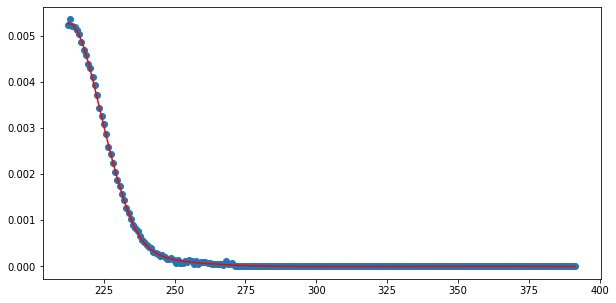

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


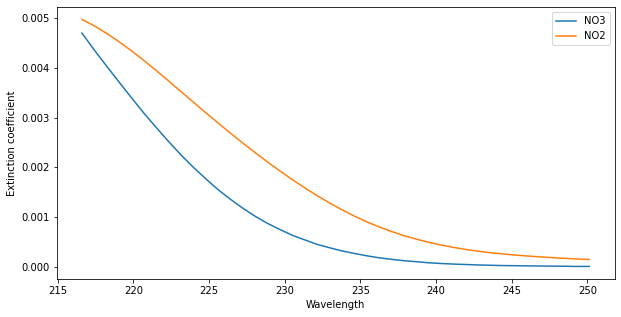

In [4]:
from scipy.interpolate import UnivariateSpline
no2_cal_smooth = UnivariateSpline(
    x=NO2_CALIBRATION[:,0], y=NO2_CALIBRATION[:,1], k=3, s=8e-8)
test_x = np.linspace(min(NO2_CALIBRATION[:,0]),
                     max(NO2_CALIBRATION[:,0]), num=100, endpoint=True)

from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(NO2_CALIBRATION[:,0], NO2_CALIBRATION[:,1])
plt.plot(test_x, no2_cal_smooth(test_x), color="red")
plt.show()

ENO2 = no2_cal_smooth(WL_ROW)
handles = []
plt.figure(figsize=(10,5))
handles.append(plt.plot(WL_ROW, ENO3))
handles.append(plt.plot(WL_ROW, ENO2))
plt.legend(handles, labels=["NO3", "NO2"])
plt.ylabel("Extinction coefficient")
plt.xlabel("Wavelength")
plt.show()

del test_x, no2_cal_smooth

# Running initial fit with linear baseline

From the script Ken Johnson sent, let's now pull up the pressure ranges at which it is assumed there is no nitrite. He had:

```
% top pressure limit to avoid NO2 peak
toplim =   90;    %  80 for 6960
% bottom pressure limit to avoid NO2 peak
botlim =450;    % 400
```
Since we are analyzing float 6960 here, let's go with toplim=80 as implied by the comment

In [5]:
TOPLIM = 80
BOTLIM = 450

#Reminder on the columns of ORIG_OUT: [SDN, DarkCur,Pres,Temp,Sal,NO3,BL_B,BL_M,RMS ERROR,WL~240,ABS~240]
PRESSURE = ORIG_OUT[:,2]

## Define cvxpy soln classes

Let's write code where we use cpxpy to solve for the baseline intercept, slope, and concentration of NO2/NO3.

In [6]:
import cvxpy as cp


class AbsorbanceSoln(object):

    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)


class SolveAbsorbance(object):

    def __init__(self, wl, eno3, eno2=None):
        #These should be already restricted to the appropriate fit ranges
        self.wl = wl #the wavelengths for eno3 and eno2
        self.eno3 = eno3
        self.eno2 = eno2
        assert len(eno3)==len(wl)
        if (eno2 is not None):
            assert len(eno2)==len(wl)

    def solve(self, absorbances, fit_no2=False,
                    baseline_slope_min=None,
                    baseline_slope_max=None,
                    baseline_bias_min=None,
                    baseline_bias_max=None):
        #absorbances has dimensions of num_obs X wavelengths
        assert absorbances.shape[1] == len(self.wl),\
                (absorbances.shape, self.wl)
        #fit_no2 is a boolean for whether to fit no2

        #Set up the convex optimization problem
        fit_matrix = np.concatenate([
            np.ones(len(self.wl))[None,:], #baseline intercept
            self.wl[None,:], # baseline slope
            self.eno3[None,:]], #eno3 conc
          axis=0
        )

        if (fit_no2):
            fit_matrix = np.concatenate([fit_matrix, self.eno2[None,:]], axis=0)
        #fit_matrix should have dims of [num_vars X wavelengths]

        #print(fit_matrix)

        vars = cp.Variable((absorbances.shape[0], 3 + (1 if fit_no2 else 0) ))
        #vars should have dims of [num_obs X num_vars]

        #define the objective
        obj = cp.Minimize(cp.sum_squares(absorbances - vars@fit_matrix))
        #add constraints
        constraints = []
        #constraints.append(vars[:,2] >= 0) #no3 concentration should be positive
        if (baseline_slope_min is not None):
            constraints.append(vars[:,1] >= baseline_slope_min)
        if (baseline_slope_max is not None):
            #multiplication by 100 seems to emphasize the constraint more
            constraints.append(vars[:,1]*100 <= baseline_slope_max*100)
        if (baseline_bias_min is not None):
            constraints.append(vars[:,0] >= baseline_bias_min)
        if (baseline_bias_max is not None):
            constraints.append(vars[:,0] <= baseline_bias_max)
        if (fit_no2):
            constraints.append(vars[:,3] >= 0) #no2 conc should be positive

        problem = cp.Problem(obj, constraints)
        optimal_value = problem.solve(verbose=True, max_iter=50000)
        print("Optimal value:", optimal_value)

        bl_b = vars.value[:,0]
        bl_m = vars.value[:,1]
        no3_concs = vars.value[:,2]
        if (fit_no2):
            no2_concs = vars.value[:,3]
        else:
            no2_concs = np.zeros_like(no3_concs)

        return AbsorbanceSoln(bl_b=bl_b,
                              bl_m=bl_m,
                              no3_concs=no3_concs,
                              no2_concs=no2_concs)


## Replicate Josh's NO3-only fit

In [7]:
#Let's try to approximately replicate Josh's no3/bl_b/bl_m values using
# cvxpy
repl_josh_soln = SolveAbsorbance(wl=WL_ROW[T_FIT], eno3=ENO3[T_FIT]).solve(
                                   absorbances = ABS_COR[:,T_FIT])

assert np.max(np.abs(repl_josh_soln.bl_b - JOSH_BL_B)) < 1e-5
assert np.max(np.abs(repl_josh_soln.bl_m - JOSH_BL_M)) < 1e-5
assert np.max(np.abs(repl_josh_soln.no3_concs - JOSH_NO3)) < 1e-5

-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 1860, constraints m = 1680
          nnz(P) + nnz(A) = 8400
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 50000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1   0.0000e+00   4.40e-01   8.29e+02   1.00e-01   2.26e-03s
  50   4.8942e-04   2.71e-07   1.12e-08   6.33e-03   5.73e-03s
plsh   4.8949e-04   3.16e-16   2.90e-15   

## Infer min/max constraints on linear baseline

In [8]:
#Get a mask to determine which observations are in the no2 region. Use this
# to place constraints on the bias intercept and slope
NO2_REGION_MASK = (PRESSURE >= TOPLIM)*(PRESSURE <= BOTLIM)

min_bl_m = np.min(repl_josh_soln.bl_m[NO2_REGION_MASK==False])
print("Min observed baseline slope in non-no2 region:", min_bl_m)
max_bl_m = np.max(repl_josh_soln.bl_m[NO2_REGION_MASK==False])
print("Max observed baseline slope in non-no2 region:", max_bl_m)

min_bl_b = np.min(repl_josh_soln.bl_b[NO2_REGION_MASK==False])
print("Min observed baseline bias in non-no2 region:", min_bl_b)
max_bl_b = np.max(repl_josh_soln.bl_b[NO2_REGION_MASK==False])
print("Max observed baseline bias in non-no2 region:", max_bl_b)

Min observed baseline slope in non-no2 region: -0.0015908727655518644
Max observed baseline slope in non-no2 region: -0.0013639518501008592
Min observed baseline bias in non-no2 region: 0.5247081325294097
Max observed baseline bias in non-no2 region: 0.5750362241387746


## Compute soln with NO2 added

In [9]:
soln_with_no2_tfitlim = SolveAbsorbance(wl=WL_ROW[T_FIT],
                                          eno3=ENO3[T_FIT],
                                          eno2=ENO2[T_FIT]).solve(
                                           absorbances = ABS_COR[:][:,T_FIT],#ABS_COR[NO2_REGION_MASK][:,T_FIT],
                                           fit_no2=True,
                                           baseline_slope_min=min_bl_m,
                                           baseline_slope_max=max_bl_m,
                                           baseline_bias_min=min_bl_b,
                                           baseline_bias_max=max_bl_b
                                           )

-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 1920, constraints m = 1980
          nnz(P) + nnz(A) = 10380
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 50000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1   0.0000e+00   5.25e-01   8.29e+02   1.00e-01   3.56e-03s
 200   7.5095e-04   1.03e-03   2.76e-05   1.87e-03   1.61e-02s
 400   4.9298e-04   6.26e-03   1.49e-05  

## Plot the results

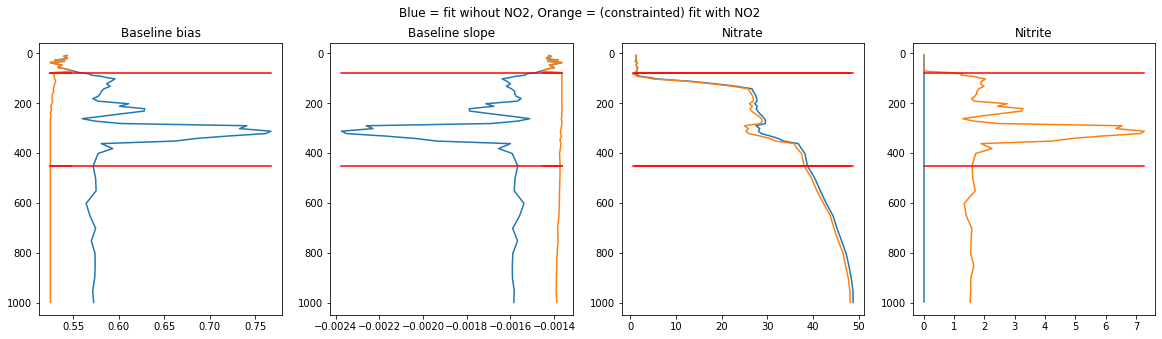

In [10]:
from matplotlib import pyplot as plot

def plot_depth_profile(vals, depth):
    plt.plot(vals, depth)
    plt.ylim(max(plt.ylim()[1], plt.ylim()[0]),
             min(plt.ylim()[1], plt.ylim()[0]))
    plt.plot([min(vals), max(vals)], [TOPLIM, TOPLIM], color="red")
    plt.plot([min(vals), max(vals)], [BOTLIM, BOTLIM], color="red")

#Plot the result
def plot_constrast_solns(soln1, soln1depths, soln2, soln2depths):
    fig,ax = plt.subplots(1, 4, figsize=(20,5))
    
    plt.sca(ax[0])
    plot_depth_profile(vals=soln1.bl_b, depth=soln1depths)
    plot_depth_profile(vals=soln2.bl_b, depth=soln2depths)
    plt.title("Baseline bias")

    plt.sca(ax[1])
    plot_depth_profile(vals=soln1.bl_m, depth=soln1depths)
    plot_depth_profile(vals=soln2.bl_m, depth=soln2depths)
    plt.title("Baseline slope")

    plt.sca(ax[2])
    plot_depth_profile(vals=soln1.no3_concs, depth=soln1depths)
    plot_depth_profile(vals=soln2.no3_concs, depth=soln2depths)
    plt.title("Nitrate")

    plt.sca(ax[3])
    plot_depth_profile(vals=soln1.no2_concs, depth=soln1depths)
    plot_depth_profile(vals=soln2.no2_concs, depth=soln2depths)
    plt.title("Nitrite")

    fig.suptitle("Blue = fit wihout NO2, Orange = (constrainted) fit with NO2")

    plt.show()

plot_constrast_solns(soln1=repl_josh_soln,
                     soln1depths=PRESSURE,
                     soln2=soln_with_no2_tfitlim,
                     soln2depths=PRESSURE,#[NO2_REGION_MASK]
                     )

Thought: the nitrite profile seems to be a 'better fit' than the baseline itself. This suggest there may be a problem with the baseline fit

# Exploring nonlinear baseline fit

The motivating thought is that it looks like the extinction coefficients for NO2 are considered a better fit to the baseline than the linear baseline itself (in the case of a constrained fit with NO2, the model prefers to use nitrite to fit what should just be fit using the baseline). This suggests the need for a better parametric form of the baseline. This might also allow absorbance at wavelength >240 to be included, because that is the region where the fit induced by the linear baseline breaks down.

## Ideal baseline for cycle 38

Let us begin by studying what the ideal baseline fit looks like if we allow a bit of iterative refinement. We will work off the case for cycle 38 where there was a fit without NO2, and we'll see what the ideal bias implied by the inferred NO3 concentrations is (in the regions where we don't expect NO2 absorbance)

In [35]:
!pip install py_pcha

For float 6960 cycle 38


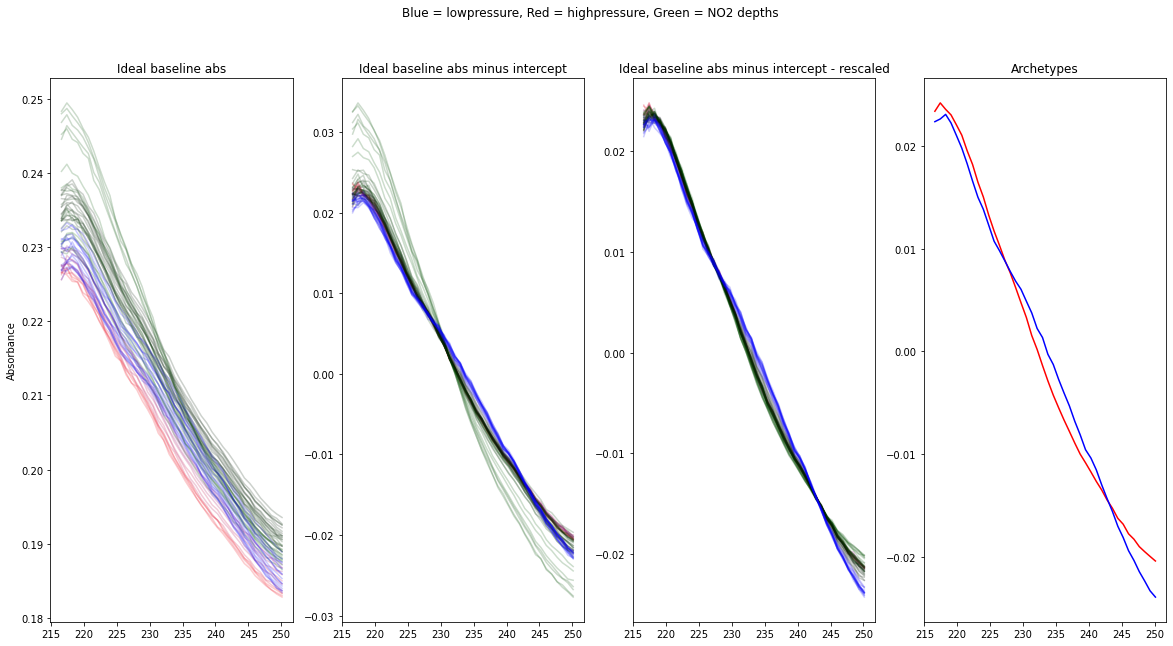

For float 6960 cycle 38 - only non-NO2 region


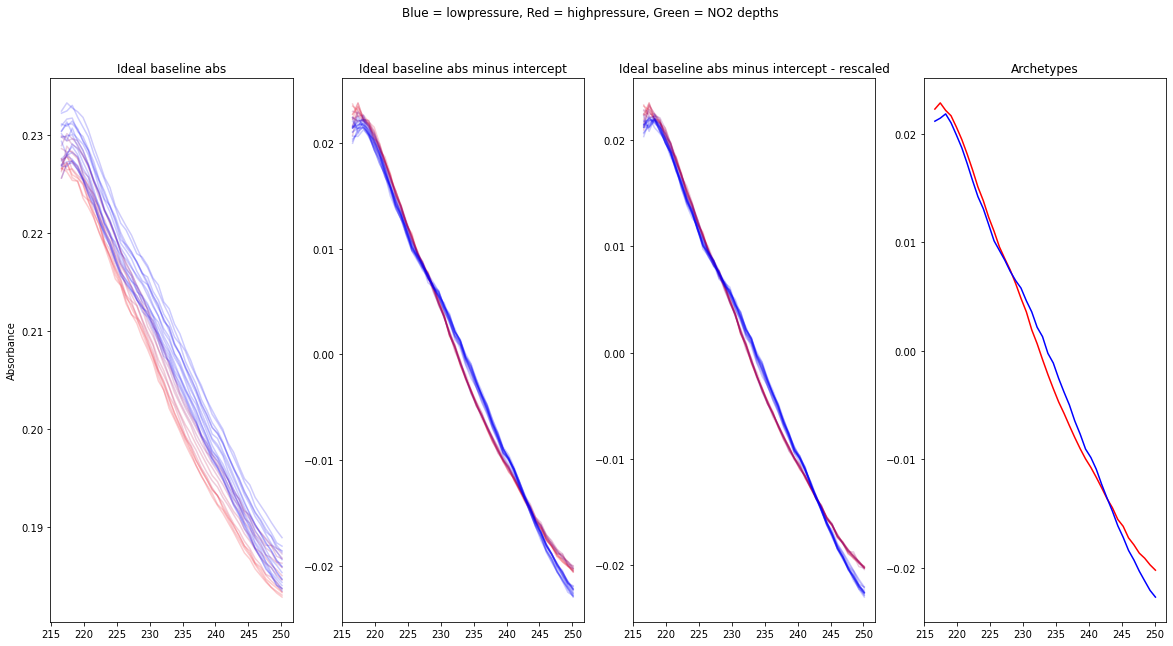

In [141]:
#Given the NO3 absorbance from the fit that doesn't include NO2, figure out
# the ideal baseline at all wavelengths
#mask = NO2_REGION_MASK==False
mask = slice(None,None,None)
idealbaselineabs_noNo2region_repljoshfit = (ABS_COR[mask] - 
 (repl_josh_soln.no3_concs[mask][:,None]
  *ENO3[None,:]))

from matplotlib import pyplot as plt
import py_pcha

def plot_ideal_baseline_absorbances(abs_cor, no3_concs, pressure,
                                    lowerpressurecutoff,
                                    higherpressurecutoff):
  fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(20,10))
  ideal_baseline_abs = abs_cor - no3_concs[:,None]*ENO3[None,:]
  min_p = min(pressure)
  max_p = max(pressure)
  mean_std = np.mean(np.std(ideal_baseline_abs, axis=1))
  norm_baseline = mean_std*(
      ideal_baseline_abs - np.mean(ideal_baseline_abs, axis=-1)[:,None])/np.std(
          ideal_baseline_abs,axis=-1)[:,None]
  #do archetype analysis to find 'archetypal' normalized baselines...
  archetypes, _, _, _, _ = py_pcha.PCHA(norm_baseline.T, noc=2)
  archetypes = np.array(archetypes.T)
  #mean_norm_baseline = np.mean(norm_baseline, axis=0)

  for ideal_baseline_abs_row, norm_baseline_row, pressure_row in zip(
      ideal_baseline_abs, norm_baseline, pressure):
    minmaxnorm_pressure = (pressure_row - min_p)/(max_p - min_p)
    color = (minmaxnorm_pressure, 0, 1-minmaxnorm_pressure)
    if (pressure_row > lowerpressurecutoff and
        pressure_row < higherpressurecutoff):
      color = (0,minmaxnorm_pressure,0)
    ax[0].plot(WL_ROW, ideal_baseline_abs_row, color=color, alpha=0.2)
    ax[1].plot(WL_ROW, ideal_baseline_abs_row-np.mean(ideal_baseline_abs_row),
               color=color, alpha=0.2)
    ax[2].plot(WL_ROW, norm_baseline_row, color=color, alpha=0.2)
    #ax[3].plot(WL_ROW, norm_baseline_row-mean_norm_baseline, color=color, alpha=0.2)
  #mean_abs_drift = np.mean(np.abs(norm_baseline-mean_norm_baseline[None,:]), axis=0)
  ax[3].plot(WL_ROW, archetypes[0], color="red")
  ax[3].plot(WL_ROW, archetypes[1], color="blue")

  ax[0].set_ylabel("Absorbance")
  ax[0].set_title("Ideal baseline abs")
  ax[1].set_title("Ideal baseline abs minus intercept")
  ax[2].set_title("Ideal baseline abs minus intercept - rescaled")
  ax[3].set_title("Archetypes")
  plt.suptitle("Blue = lowpressure, Red = highpressure, Green = NO2 depths")
  plt.show()

print("For float 6960 cycle 38")
plot_ideal_baseline_absorbances(abs_cor=ABS_COR,
                                no3_concs=JOSH_NO3,
                                pressure=PRESSURE,
                                lowerpressurecutoff=TOPLIM,
                                higherpressurecutoff=BOTLIM)
print("For float 6960 cycle 38 - only non-NO2 region")
plot_ideal_baseline_absorbances(abs_cor=ABS_COR[NO2_REGION_MASK==False],
                                no3_concs=JOSH_NO3[NO2_REGION_MASK==False],
                                pressure=PRESSURE[NO2_REGION_MASK==False],
                                lowerpressurecutoff=TOPLIM,
                                higherpressurecutoff=BOTLIM)

## Loading the results for cycle 44

This prompts the question of what the baseline looks like for pressure ranges in the zone where we expect to see nitrite, but for cases where there is no nitrite. To answer this, I will investigate what these plots look like for cycle 44, which wasn't a profile where we expect to see nitrite. My matlab commands involved using the modified `calc_FLOAT_NO3.m` and running:

```
[float_out, t_fit, ABS_cor, WL, ENO3] = calc_FLOAT_NO3(parse_NO3msg('../data/f6960/6960.044.isus'), parseNO3cal(['../data/6960ETNP.cal']), 1);
writematrix(ABS_cor)
writematrix(float_out)
```
Then we can parse the result as before

In [142]:
f6960_44_ORIG_OUT = parse_csv_mat("""735177.865104167,1879.57,999.14,4.4099,34.531,48.7105816071194,0.5148985067352,-0.00134160471920505,0.000374411263017932,239.50323,0.197918089189776
735177.870104167,1879.4,951.03,4.5791,34.5242,48.8477331775026,0.508199313355278,-0.00131837641100787,0.000337878861720547,239.50323,0.196813521112227
735177.875752315,1877.13,901.67,4.8067,34.5191,48.7234196308121,0.5020546519415,-0.001295082215514,0.000349817297087842,239.50323,0.19617853278384
735177.882696759,1876.53,851.35,5.0242,34.5079,48.1622207429281,0.501333278056127,-0.0012907926582237,0.000452637020101971,239.50323,0.196564915701086
735177.889513889,1869.91,800.72,5.2721,34.5019,47.4209674846676,0.513075209945834,-0.00134058991006682,0.000360605452104187,239.50323,0.196376060558044
735177.895810185,1870.83,751.55,5.5853,34.4959,46.6531039798075,0.511739336616387,-0.00132802598505654,0.000448182209650934,239.50323,0.197886411115238
735177.902488426,1865.43,701.09,5.9569,34.5018,46.1342833692229,0.503044127562804,-0.00129423901427838,0.000498506139071248,239.50323,0.197384585944221
735177.909189815,1863.98,651.09,6.2993,34.5041,45.1012220984252,0.503340777648505,-0.00129363413730168,0.000403999847986209,239.50323,0.197702560321928
735177.915381944,1857.8,601.52,6.7293,34.5052,43.8077496009402,0.501512119900904,-0.00128054288994577,0.000480520875395614,239.50323,0.198775885126822
735177.922222222,1850.56,551.54,7.2711,34.5115,42.0431092284609,0.505991657415484,-0.00130155518463433,0.000463486172084558,239.50323,0.198272616509383
735177.927638889,1847.13,501.47,7.5446,34.5002,41.2394290185955,0.508896204418976,-0.0013081548270281,0.000354932914854553,239.50323,0.199240259692546
735177.934189815,1842.15,451.08,8.0088,34.5145,40.1319583562967,0.49813405190059,-0.00126509854020575,0.00044829391951121,239.50323,0.198881885972582
735177.941284722,1832.54,401.22,8.5204,34.5164,38.5047418870639,0.507739903139897,-0.00130428708015905,0.0004849507070139,239.50323,0.198914336890655
735177.94375,1832.31,380.74,8.7945,34.5302,38.1052680455186,0.495863160690381,-0.00125290124022644,0.000440755549160639,239.50323,0.199307977242605
735177.946111111,1829.96,361.51,9.1633,34.554,36.714450588306,0.503359785956808,-0.00128347694162873,0.000496576628727938,239.50323,0.199557687729597
735177.947418981,1825.49,350.74,9.2906,34.5646,35.7966824716401,0.513297945252868,-0.00131986728922219,0.000401015475182558,239.50323,0.200740868022516
735177.948587963,1826.47,340.86,9.3997,34.5668,35.3337183386096,0.515289223188988,-0.00132706286591652,0.000493333499417972,239.50323,0.201002202104055
735177.949803241,1819.63,330.9,9.5286,34.5732,34.6594593490909,0.517430883751587,-0.001334967810675,0.000467907863103283,239.50323,0.200932095903566
735177.950983796,1816.94,321.34,9.6684,34.5801,34.2628936495309,0.512037198917271,-0.00131585262526736,0.000521729551696003,239.50323,0.200214155896361
735177.952280093,1812.31,311.11,9.7463,34.5846,33.8901416501442,0.509604888400938,-0.00130026650630313,0.000433503611830038,239.50323,0.201379665254608
735177.95349537,1814.39,301.6,9.7998,34.5871,33.7618982018957,0.506606902945452,-0.00128682817318291,0.000509815407810902,239.50323,0.201591305191768
735177.954803241,1808.58,291.01,10.0245,34.5959,32.4933115439194,0.506920376205572,-0.00129148216605809,0.000499067023215004,239.50323,0.200727781589257
735177.955972222,1809.05,281.58,10.1312,34.6018,32.0859526918874,0.507683578572527,-0.00128889425849741,0.000529310345626389,239.50323,0.20219567542536
735177.957303241,1808.91,271.64,10.2434,34.6059,31.7509083235541,0.51058660449624,-0.0013040978572352,0.000487804256817878,239.50323,0.201344907949403
735177.958726852,1807.07,261.62,10.2929,34.6074,31.6114863977066,0.507428482365403,-0.00129047175561022,0.000471656038765461,239.50323,0.201434701629168
735177.960428241,1803.67,251.13,10.4274,34.6074,31.3478682153682,0.511876776489441,-0.00130366483634856,0.000457462527864087,239.50323,0.202712443788747
735177.962384259,1807.38,241.39,10.5922,34.6174,30.6016409703526,0.520800827937164,-0.00134342730362793,0.000495046782207645,239.50323,0.202068473269637
735177.964189815,1802.49,231.64,10.7401,34.6079,30.7385855008952,0.497034005290132,-0.00124442450790095,0.000513426266317975,239.50323,0.201767750024674
735177.965497685,1797.49,220.92,10.8626,34.6089,30.162796563831,0.497019107414536,-0.00123917064497497,0.000473113839251724,239.50323,0.203036062024372
735177.966689815,1797.31,211.2,11.1643,34.6254,29.223544584272,0.505639369804725,-0.00127325123788182,0.000503735427326765,239.50323,0.20338019497509
735177.96787037,1793.64,201.68,11.3142,34.6352,29.0693483242137,0.494854653766458,-0.00123143392847853,0.000583446866213047,239.50323,0.202711017938666
735177.96931713,1790.6,190.83,11.4797,34.6297,28.6951687067353,0.500189210969394,-0.00125294486700095,0.000550895680188783,239.50323,0.202865857778668
735177.970636574,1793.19,181.73,11.6673,34.619,28.2070889563831,0.504858507000439,-0.00127135836005325,0.000527224929911161,239.50323,0.203119872585058
735177.9721875,1785.04,171.59,11.6883,34.5779,28.2264737105787,0.499326509537274,-0.00124659313769329,0.000595126762073581,239.50323,0.20359477509455
735177.973888889,1783.94,161.59,11.7047,34.501,27.9456153548312,0.497044614680281,-0.00122974425158255,0.000479569040603011,239.50323,0.205100537354497
735177.975451389,1783.59,151.49,12.13,34.4715,27.3806951217979,0.503243667987441,-0.00125938815119199,0.000544146450439518,239.50323,0.204393437294173
735177.976875,1777.96,141.31,12.2407,34.3775,26.6295104033341,0.504940023047134,-0.00126075973981567,0.000534019977880374,239.50323,0.205677285715491
735177.978576389,1778.59,130.01,13.0498,34.1706,22.6004335021113,0.499920269598978,-0.00123962094117367,0.000459026759974053,239.50323,0.205193236882701
735177.979884259,1772.85,121.14,14.014,34.0221,17.1821306561146,0.509795634320984,-0.00127837412759618,0.000403875397695651,239.50323,0.205284437438123
735177.982094907,1771.86,111.53,14.9611,33.9894,12.7378752063142,0.519880670480869,-0.00131942504087452,0.000489876723366539,239.50323,0.205138239141046
735177.987303241,1759.97,101.51,16.2962,34.0622,7.5160432219678,0.520189788262448,-0.00132207023301787,0.000432360319863648,239.50323,0.204307096484402
735177.988796296,1752.69,96.64,17.4159,34.1602,4.69404641722824,0.527379669108559,-0.00134779832696121,0.000488805192526532,239.50323,0.205158571538957
735177.990231481,1747.57,91.7,18.2266,34.2463,3.29246507805782,0.526433630110136,-0.00134240634445472,0.000466198361090634,239.50323,0.205434702921661
735177.99224537,1748.27,86.55,18.9515,34.3333,1.75338369315239,0.52429648915526,-0.00133614545499026,0.000547033158784596,239.50323,0.204767280979362
735177.993229167,1738.45,81.68,19.4252,34.3769,1.24293488770912,0.519458905284712,-0.00131295597894316,0.000630880219370101,239.50323,0.20535967819723
735177.994398148,1737.71,76.58,19.882,34.4238,1.34939602406456,0.516098898317139,-0.00130316638390979,0.00048496462617401,239.50323,0.204390403377571
735177.996608796,1728.2,71.92,20.6228,34.5009,1.13967608544974,0.520662142092439,-0.00132038162543319,0.000475072518171859,239.50323,0.204587329809144
735178.000138889,1720.56,66.58,21.1938,34.5494,1.13283443827587,0.515967913741014,-0.00130813727432709,0.000393709847421286,239.50323,0.202838108183313
735178.001180556,1712.39,61.8,21.5483,34.5749,1.25556030166436,0.509452940556377,-0.00128009007059842,0.000420644485531299,239.50323,0.202875799374553
735178.002222222,1709.59,56.15,21.8189,34.5918,1.39383165858032,0.507859386617783,-0.00127344777752816,0.000319987958886775,239.50323,0.203011257010038
735178.003043982,1700.94,51.46,22.1636,34.6197,1.26309316478159,0.510816136975743,-0.00128582929967795,0.000465848796550539,239.50323,0.203022695509576
735178.007708333,1692.02,46.85,23.346,34.6442,1.1060681156079,0.505009340194317,-0.00126315352759846,0.000571262075758196,239.50323,0.202345114406801
735178.011111111,1681.48,41.81,24.5916,34.7825,1.07709572267267,0.497525200760582,-0.00123904048646642,0.000524893865700017,239.50323,0.200505234258632
735178.01375,1676.2,36.23,24.6904,34.7954,1.04001641274925,0.501765244885837,-0.0012595289555247,0.000463529719323033,239.50323,0.199968672693008
735178.014537037,1671.73,31.59,25.2427,34.8273,1.22649782570642,0.496325812418826,-0.00123701482799565,0.000454275642849183,239.50323,0.199691790788932
735178.015706019,1668.61,26.86,25.3673,34.8364,1.02252515839749,0.499056672994506,-0.00124836856990575,0.000546833876111889,239.50323,0.199877533151788
735178.017407407,1667.64,21.74,25.4031,34.8335,1.2036098582841,0.493992901227881,-0.00122028150246115,0.000432566479602219,239.50323,0.201513300608031
735178.019849537,1658.71,16.88,25.428,34.8315,1.1442819648499,0.493917206912256,-0.00122253458492239,0.000545218011473422,239.50323,0.200861553171138
735178.021481481,1658.75,11.48,25.4746,34.8283,0.850601187835484,0.508710662615638,-0.00127994141870381,0.000424660188820088,239.50323,0.201865031655028
735178.022395833,1658.84,7.52,25.473,34.8279,1.03937667928939,0.506100640372436,-0.00126393821527866,0.000489099701347937,239.50323,0.202926721046079""")

f6960_44_ABS_COR = parse_csv_mat("""0.450495904085793,0.434405721177533,0.418306362973154,0.402249832808743,0.38589140057753,0.36975745629626,0.354607836332738,0.339654580597075,0.325122059191788,0.312099975940143,0.299283165758323,0.287473401242782,0.276649217057185,0.267040268267407,0.258126319874403,0.25015906321465,0.243228588062032,0.236447739569767,0.230827236154761,0.225308627681452,0.220528546788904,0.216214146554383,0.212624077845326,0.209097845003465,0.206398733387089,0.20391413704764,0.201618784737845,0.199803959623903,0.197918089189776,0.196592741217576,0.194999222733269,0.193700368446587,0.192580656566053,0.191431248164837,0.190223778397848,0.189409907632558,0.188330159084348,0.187859035419599,0.18702713257989,0.186556361791476,0.185969161234917,0.185753313092339
0.450529849654128,0.433821687922162,0.41807940456942,0.400286820977741,0.384749545024699,0.368525095971981,0.353239747708939,0.337800541985885,0.323645625681799,0.310707663516283,0.297995447998879,0.286350957403853,0.275498460408914,0.266220467130339,0.257096179037663,0.249272671413469,0.24189761884099,0.235242582063331,0.229300983564601,0.224143044214921,0.219325360106308,0.215103071348023,0.211531279747613,0.207956524371272,0.204943261595574,0.202633953146821,0.200532060842772,0.198547323971003,0.196813521112227,0.19535371361167,0.194119213880238,0.193043642258949,0.191648336672663,0.190639140514054,0.189500205927967,0.188682475635571,0.187503554121608,0.186919570137218,0.186197027586075,0.185557199549884,0.185088759422877,0.184730258731625
0.448111662617298,0.432282376959651,0.415652803960493,0.399281450275233,0.383582895915535,0.366822258049893,0.352253779600383,0.336844211796183,0.322698562283632,0.309111737642587,0.296751024642376,0.285313502102094,0.274583473838455,0.264768877485174,0.25639881530279,0.248338946619763,0.241106174599546,0.234491832121139,0.228414758134544,0.223194157261651,0.218538541107224,0.214211558722854,0.210646527648518,0.207299675922728,0.204491032600948,0.202027986445164,0.199784778517686,0.198176609228634,0.19617853278384,0.194790651184858,0.193354854297883,0.192190581271802,0.190992818838374,0.189797640616054,0.188726010514153,0.188040581304909,0.187016063498214,0.186353726476242,0.185464696255062,0.185116738892168,0.184557699914617,0.184261575656314
0.446224197197055,0.429989591907919,0.413172672899932,0.397626590972361,0.381219673252061,0.366357812386068,0.350426597675136,0.336151132235948,0.321999682673264,0.308396600595212,0.295930975463123,0.284384520813611,0.27410506140908,0.264677653909782,0.255902539506468,0.247834682206543,0.24127506985975,0.234349622146441,0.228077981551031,0.223349507042886,0.218453602354475,0.214156707875053,0.210574496900192,0.207387983229675,0.204659642453137,0.202268941196756,0.200279003856217,0.198451289303847,0.196564915701086,0.195083127984212,0.193873421442256,0.192621227206856,0.191406166550892,0.1901650936183,0.189100637771734,0.188391809206551,0.187255539466036,0.186697593783816,0.185924346790346,0.185435598540111,0.184894596856196,0.184640737491769
0.444265839403072,0.427735864704686,0.411435258455905,0.39547419295245,0.37946845999925,0.364547678008174,0.349113076845077,0.334542206390951,0.320769156325695,0.307615910447425,0.295596346732405,0.284121546472135,0.273723929477779,0.26389243517817,0.255675848855444,0.247524506946449,0.240953214044008,0.233893999786571,0.228146867985798,0.222889609013873,0.218234342222979,0.214074241359891,0.210664087840426,0.207187091437164,0.204722219240455,0.20207228640779,0.199978291709794,0.198146200418389,0.196376060558044,0.195071229105501,0.19387970088919,0.192464252981471,0.190972975027776,0.190089280983589,0.18878920620297,0.188432804303885,0.187208706166439,0.186555154834956,0.186069414465784,0.185319208343943,0.184859144745615,0.184718922980643
0.44091491113688,0.424771133599554,0.41029992746431,0.394366740006159,0.379090972628225,0.363212428341398,0.348386472662411,0.334107501661301,0.320458935198424,0.30765083368244,0.295517422510654,0.284151619870473,0.274372651790107,0.264688266411771,0.256183378633317,0.248227085190043,0.24173635318409,0.235265510421509,0.229280415858637,0.224245522546891,0.219627855792244,0.215366543736249,0.212146484950725,0.208633401238973,0.206072121050657,0.203732682211728,0.201484336090786,0.199842084578717,0.197886411115238,0.196607369270255,0.195384756945135,0.19403196968087,0.192797184925769,0.191814253545116,0.190597349913877,0.189949929719191,0.188747191402052,0.188126434352583,0.187426510139246,0.187018865730317,0.186260171556185,0.186084114885557
0.43603224408297,0.420982472303383,0.406609955323135,0.391450308286518,0.376016303204195,0.360866651921894,0.345863649141698,0.33161556646811,0.317914068477355,0.305742122088677,0.293327745337224,0.28205522284625,0.272215015655271,0.262972514604501,0.254677444150041,0.246955821642477,0.240301244339234,0.233995282574502,0.228459706885371,0.223137683080318,0.218746258547375,0.214658934596238,0.211132164341766,0.207966165025252,0.205296597238737,0.202622152175632,0.200710580163613,0.199030019054209,0.197384585944221,0.196056493646012,0.194665678725205,0.193567209996566,0.192268301360058,0.191247933501294,0.190036945395222,0.189183112082844,0.18814848264256,0.187762692146136,0.187103194954464,0.186366599308077,0.185812544101002,0.185610955665397
0.43340291386991,0.41751958728119,0.402875436750401,0.387637361077022,0.372561190697333,0.357513222266808,0.343388027182805,0.329682859893699,0.316392364590188,0.304255113594131,0.291855223013236,0.281295471825842,0.271028507816326,0.262413318135571,0.25397841125704,0.246562175070748,0.240192825427799,0.233283840388985,0.228550331133466,0.22297711506499,0.218575670835544,0.214697296157036,0.211384435873398,0.208074262201795,0.205443137307383,0.203201086810598,0.20111089078048,0.199377944224022,0.197702560321928,0.196233015654525,0.194989447939937,0.193821620678084,0.192456764689622,0.19158615506035,0.190096475014772,0.189676034217589,0.188570540265454,0.18782923045066,0.187074620738583,0.186523344635614,0.185912342609122,0.1859483767948
0.42715299522949,0.412458872569093,0.398781485819591,0.384319538992236,0.368874891510761,0.355081476864678,0.340386941971688,0.327878073774632,0.314554565802051,0.30235882589664,0.290960223423693,0.280540969445614,0.270626477133792,0.262158363328888,0.253890802717609,0.246527265109077,0.240109888063323,0.233491354135792,0.22855006247465,0.223871372873728,0.219615112650261,0.215456965126323,0.211896623838938,0.209116037842133,0.206725810336805,0.204361929384621,0.202178970481378,0.200746877037436,0.198775885126822,0.197499030993632,0.196230782675729,0.195047824940044,0.193925170712658,0.192968438795034,0.191672698598297,0.191265130775282,0.1900400955493,0.189647887189599,0.188492195680644,0.188163111412726,0.187622786058639,0.187361665445519
0.417981053784547,0.405080751071153,0.390888186528325,0.377424224226479,0.363018662805372,0.349475459552754,0.336024970072444,0.32288203231498,0.309988869246551,0.298954675929304,0.287610248875685,0.277512354673354,0.267870121642127,0.259400235601877,0.25196820219396,0.244724047381499,0.238427157236604,0.232695033069408,0.227214763350812,0.22219380758595,0.218433837125186,0.214416765772559,0.211134205938201,0.208133241677526,0.205904104870023,0.203626417609596,0.201554377670415,0.199841649588536,0.198272616509383,0.196948578113706,0.195562721984631,0.194469855006673,0.193168604393078,0.192337273473579,0.191063169937187,0.190343016602459,0.189496380518277,0.188665670586609,0.188013231849718,0.18736679538205,0.187001306409892,0.186821089023993
0.416726732140224,0.403578283766536,0.389066222936669,0.375801296710659,0.362005898579163,0.34814039049571,0.334914804022668,0.322334193128922,0.309605374891278,0.29835839004284,0.287146456355691,0.27753728477196,0.268431958213305,0.259896642959578,0.252602675447636,0.245548451039079,0.239423160776548,0.23353135005357,0.228367438726719,0.223234040286911,0.219477934459095,0.215802405790097,0.212516991506414,0.209531312980127,0.207061597832834,0.204786935584565,0.202622096654049,0.201046355195927,0.199240259692546,0.198111265127668,0.196951294171822,0.195825294770277,0.194520518239682,0.193767457800909,0.192470042832873,0.19179132159663,0.190658174914504,0.190256870603295,0.189646921345608,0.188983651769435,0.18853394449568,0.187928317797689
0.409776382364281,0.396641291546058,0.38436482603258,0.369866868697589,0.35657353625257,0.344044644470059,0.330686077152732,0.318183827655794,0.306072622666045,0.29495259183235,0.284167803501652,0.274637062596215,0.265863462049547,0.257638193295198,0.25077701145277,0.243402496476894,0.237856649903001,0.231737346053104,0.226988154452339,0.222292322927325,0.218412984451016,0.214498337864037,0.21150427581606,0.208577729208017,0.206414450565908,0.204017275008172,0.202078930250537,0.200237014783749,0.198881885972582,0.197513810853848,0.196236597853176,0.195135637381352,0.193881776511985,0.192941185991579,0.191695421085755,0.191305877811436,0.190082377054654,0.189616829888034,0.1886177541782,0.188170406617481,0.187608471459344,0.18743964398331
0.403163383024631,0.390160486717677,0.378358014140888,0.365392230421087,0.352690015797795,0.339564820382045,0.32692966917086,0.315288527803818,0.303417511635732,0.292829989971631,0.282478761101078,0.272928361472153,0.264243432576978,0.256483242599508,0.249164081407622,0.242762113489208,0.236618196234596,0.231453819202262,0.226376210399623,0.222105600945811,0.218405767278627,0.214666726410026,0.211577620274921,0.208651235487144,0.206193843478612,0.20401154045384,0.202282592803158,0.2005608071132,0.198914336890655,0.19787381253989,0.196758453097202,0.19555261942304,0.194461651785228,0.193493016768959,0.192190392950809,0.191607524757501,0.190449409492971,0.189812433825206,0.189377613423708,0.188658212677304,0.188256183668502,0.18800779673685
0.400597108018561,0.388282782674793,0.375491416079503,0.363648087293537,0.350525173993718,0.337796646264035,0.325601362494003,0.313308568841336,0.302028957802123,0.291383203651194,0.281677889408512,0.271990191041624,0.263390214229161,0.255634968177819,0.24880075170893,0.242288727446024,0.236717102338133,0.231371448886725,0.226244282553631,0.221955761935848,0.218086631612037,0.214465015715086,0.211485443826398,0.208943592894851,0.206703775050865,0.204497934830388,0.202233190924958,0.200823667480816,0.199307977242605,0.1980720235703,0.196854446966889,0.195680306815799,0.194408695191678,0.193588447658513,0.192540531550969,0.191777087145853,0.190769533491044,0.190071806051721,0.189591024732664,0.188862131546569,0.188427584573295,0.187909207729301
0.394729040465584,0.383062752223996,0.371042169008303,0.358319890103038,0.346527098643478,0.334508268435498,0.322140459531297,0.311074231777475,0.300214753087745,0.289311553082176,0.280052176850583,0.270072710250136,0.261877665204897,0.254784360569353,0.247513215418294,0.241854384196029,0.236025100448741,0.230840502393219,0.226007826822603,0.221624640958093,0.21791331474545,0.214451072845819,0.211454924316269,0.208829075523908,0.206241075349142,0.204420927094909,0.202521044790624,0.201082397336021,0.199557687729597,0.198284614222073,0.197114918493262,0.195806058889467,0.194845821352829,0.193615741110427,0.192602092062514,0.191944631897627,0.190799269979957,0.190366778220991,0.189683198529048,0.189021868764154,0.188486057240517,0.188320726156
0.391390677048791,0.381425122391067,0.369198046881349,0.357285897773885,0.344737531440778,0.333667742844606,0.321581436697314,0.310037933611014,0.299493008987693,0.289528083865217,0.2798684733062,0.270904167439692,0.262884838689005,0.255426160808391,0.248727273206574,0.242304716529913,0.236847867369334,0.23150922964012,0.227027884510147,0.22281691015868,0.218940341230588,0.215472922582917,0.212563362268334,0.209900998919517,0.207593093702222,0.205726340843783,0.203784334126906,0.202073529911531,0.200740868022516,0.19946814245987,0.198374206688009,0.197165022248857,0.195790958916362,0.194983103139047,0.193894852549201,0.193066675816673,0.191999980603528,0.191528445653304,0.19102400961738,0.190245963355095,0.189602518548008,0.189267181434547
0.390010484162006,0.379681609396823,0.367343149369542,0.355613342203228,0.344120834724343,0.332561041280377,0.32108274320686,0.309930698422483,0.298775123990898,0.289124295538551,0.279377998151856,0.270399216302853,0.262437936627476,0.255209444568105,0.248522285875451,0.242376813553051,0.236793416892936,0.231337178415936,0.226982783834534,0.22252531482334,0.2192194947602,0.215687527517416,0.212767936403541,0.210162230474959,0.208009896183869,0.205862956328537,0.204009949259734,0.202344605153052,0.201002202104055,0.199842476856015,0.19862439807035,0.197395642817002,0.196119684224195,0.195347996240323,0.194182204566686,0.193449525624098,0.192343134628436,0.191849570640945,0.191242409779686,0.190538851810164,0.19013336302418,0.189734513883131
0.387125557905945,0.377027839052181,0.365121066508825,0.353882664131481,0.342322048219843,0.331127925848717,0.319532778307824,0.308132201254058,0.2978024871591,0.287821250766453,0.278202270154807,0.269704818963683,0.261843849207656,0.254567930750677,0.248214067103057,0.241950874174233,0.23648425046214,0.23156572420514,0.227174025785714,0.223014151694445,0.219317243018944,0.215979707679738,0.212904899916356,0.210404289061176,0.208008177641295,0.205982593566839,0.204085872279118,0.202563856214392,0.200932095903566,0.200015052604785,0.198844311360574,0.197711914137967,0.196484567715665,0.195500153253242,0.194371168500668,0.193748654971475,0.192744125709965,0.192363713488703,0.191305284829347,0.190709899500418,0.190291989584213,0.189808472401349
0.384203125411544,0.373621744586843,0.363239785659101,0.350648179593394,0.339702889522682,0.328383395488636,0.317135341093113,0.306455907504012,0.295991630580353,0.285903204991944,0.276727445089944,0.268165130227055,0.26002788919267,0.253084240570102,0.246230346179579,0.24099674230743,0.235378907314747,0.230540442920393,0.22561454585988,0.221617440974471,0.218181668647571,0.214681540255386,0.212103909769627,0.209180788910689,0.206998313724839,0.205304705155973,0.203287357779966,0.201635653446428,0.200214155896361,0.199132092338482,0.197897772062254,0.197172443750461,0.195551728345224,0.194758310324652,0.193750233101165,0.192830828629868,0.192098487600179,0.191536952970572,0.19033750071526,0.190108805285225,0.18950186854336,0.189090717676336
0.383262140265998,0.373409130381663,0.36197070192977,0.350824962345147,0.339392851581409,0.328367325922079,0.317098016752982,0.306316744263866,0.295638703339814,0.286307151058851,0.276984423083445,0.26842621868425,0.26086713920464,0.254087767292167,0.247552992232955,0.241386596095854,0.236045254675616,0.231365271376955,0.226752889550573,0.222783469558651,0.219341250344627,0.215878433524099,0.213095513177534,0.210475187793194,0.208203576334493,0.20627028335779,0.204646651939278,0.202863805466893,0.201379665254608,0.200349732683416,0.19920684313727,0.198185761538149,0.196874818443905,0.196109980445603,0.194840208410005,0.193917485540052,0.193046199150939,0.192585004928103,0.191816581940845,0.191143689957273,0.190706109498101,0.190316223915767
0.381983057894639,0.372123856909581,0.362392290124506,0.350202179510186,0.338704374365517,0.327765415022659,0.316559980464668,0.305950095419607,0.295578615589197,0.286260103589128,0.277097504126168,0.268212777157296,0.260556136973015,0.25361183123543,0.247401321547293,0.241441268375256,0.236548201154489,0.231388775079346,0.22692264430621,0.222445290890183,0.219311809272089,0.215850738333941,0.213329421570968,0.210451843666246,0.208456218588323,0.206590908478972,0.204608450457652,0.203266414184385,0.201591305191768,0.200692691297109,0.19960986263442,0.198468201002278,0.197156517811825,0.196194506068996,0.195129883365083,0.194407605381226,0.193410125248716,0.192700242372398,0.192176922026307,0.191376286055741,0.190929738776021,0.190575949939624
0.376281144209534,0.366172693887612,0.355738713393402,0.344932574219555,0.333854740193415,0.323139433685419,0.312713153096487,0.302100636018511,0.292221018978218,0.282857329692183,0.27380908630163,0.265602149620305,0.258165936581106,0.251360328743743,0.245255141937884,0.239668983300152,0.234496606749131,0.229917850282286,0.22534850448882,0.221424372297864,0.217876474603703,0.214716775938904,0.212307922818761,0.209487924787002,0.207313085565965,0.205747146531577,0.203556565808031,0.202332621241448,0.200727781589257,0.1997886189539,0.198592823921502,0.197479970320809,0.196203797585031,0.195532551640431,0.194285650442487,0.193573440583974,0.192471751631282,0.191908412555724,0.191165022295489,0.190583074596312,0.190047206118039,0.189643487302864
0.374052308388605,0.365825233442505,0.35538609011806,0.344895647750477,0.333423003787636,0.323399311644182,0.312455832558642,0.302627012848381,0.292788658473051,0.283810838731956,0.274533112872406,0.265958735738288,0.258634004413759,0.252353073523683,0.246193700441362,0.240815515687846,0.235478324800314,0.231076800480981,0.226660497382554,0.222589189873761,0.219008958603598,0.216013590624858,0.213465539002591,0.210717167580719,0.208689119531256,0.206855293672904,0.205013454603675,0.203600571600994,0.20219567542536,0.200906907199512,0.199838652186818,0.198677668755879,0.197530530005682,0.196638369117251,0.195548455457343,0.195013338965836,0.193821177360157,0.193224883253356,0.192409468175284,0.191852362715987,0.191188564779118,0.191084130553912
0.374674824408491,0.364068251765476,0.353384099687798,0.343161102200612,0.332523816989798,0.322004076600869,0.311115155396878,0.301147069976902,0.291004169625084,0.282064161045419,0.273292477682957,0.265194158484987,0.258182979077069,0.250974236086461,0.245505188860195,0.239755536668123,0.234844014090719,0.230226293598217,0.225734422092897,0.222015779621733,0.218416062444148,0.215352730362594,0.212724960495991,0.21012903727141,0.207858756012125,0.206247812768766,0.204109837027816,0.202698985975159,0.201344907949403,0.200202530790465,0.19906634288174,0.198063450159048,0.196752827417079,0.195870469624718,0.194850381071407,0.194189706051293,0.193057069017863,0.192634280356283,0.191549708504177,0.191408204264837,0.190675058981517,0.190283417598361
0.37242078839096,0.363000698545045,0.35309507195791,0.342439040398686,0.331855508672392,0.321039776542998,0.31076603081174,0.300709129064837,0.290479591757152,0.281680176524506,0.273037362367816,0.265096162896614,0.257699073703757,0.251275019566512,0.24508492806315,0.239251447165594,0.234774363827851,0.230191485850983,0.22567305536291,0.221791643334034,0.218389040258345,0.215377078930235,0.212678306719027,0.210241219651668,0.207986481197372,0.206269515310641,0.204111444583239,0.202810385026765,0.201434701629168,0.200119449590017,0.199236287046468,0.198099148299106,0.197052261150685,0.195773372315507,0.194853093821357,0.194087777876769,0.19293316865969,0.192618359991202,0.191851646161716,0.191348569513999,0.190856070382759,0.190544999698841
0.373016580784693,0.363885984304315,0.352949086171032,0.343309130644598,0.332270250620225,0.322062560714313,0.311217531595211,0.301495405417719,0.291614603722186,0.282577811276815,0.274158955997463,0.266101773570176,0.258805293185001,0.252403910257252,0.246293799267663,0.240560818199414,0.236107781855119,0.231259080627616,0.226927872525733,0.22323625532989,0.219471341762951,0.216602157490538,0.214098025360839,0.211451925327833,0.209239525793756,0.207320640537753,0.205552866688694,0.204154896705796,0.202712443788747,0.201600476900351,0.200435814444298,0.199400164122788,0.198102569385967,0.197449014682102,0.196255818244569,0.195566682073685,0.194849967228312,0.19374939860672,0.193080680854832,0.192686017558275,0.19211369599283,0.191638974743637
0.370450992414617,0.360774219677435,0.350714411081582,0.339927775142814,0.329790553841758,0.319975428887265,0.30973405743413,0.299731001969722,0.290159488710558,0.281694567191867,0.272391315426047,0.264971126724463,0.257357528612162,0.251419239474078,0.245275882916808,0.239945362395207,0.234913610328824,0.230608424504845,0.226280936531763,0.222539738370309,0.219210902459401,0.216081500241031,0.213325733475129,0.210678240051326,0.208634904014657,0.206788098828037,0.204987785695804,0.203504410162381,0.202068473269637,0.201011815747072,0.199911199955376,0.198699680317472,0.197519466770448,0.196543931148842,0.195520096595869,0.194879221820534,0.193845315635124,0.193269106470369,0.192695435258566,0.191859299728111,0.191284720415861,0.190880646159515
0.367697874415697,0.3591145576152,0.348363221377777,0.339353587792992,0.328635606299339,0.318217500901524,0.308368102676433,0.298030362791376,0.288795965221209,0.279865992581511,0.271332362667491,0.263692053398643,0.256369173828528,0.249867009379407,0.244282330643861,0.239218771969095,0.234122977261694,0.229639296086927,0.225387910070311,0.221886460960583,0.218700483775672,0.215449128096577,0.21291885102381,0.210450521116423,0.208272607982249,0.206565559006771,0.204680104442207,0.203466541139243,0.201767750024674,0.200619071482225,0.199594792883501,0.198519483134551,0.197438730199024,0.196595727914969,0.195555927561414,0.194741300971809,0.193938069910052,0.193366109639639,0.192498051941545,0.192008787725792,0.191398224785612,0.190883227256051
0.367148994377225,0.357423390578066,0.348280127053328,0.337789182557431,0.327460473420943,0.317949609210543,0.307675750196933,0.297900011481686,0.288385472953557,0.279529753360171,0.271430871800672,0.26409438522846,0.256990324910613,0.250589776053466,0.244755121161206,0.23968296069851,0.235117834290217,0.230443781464977,0.226567261769777,0.222787360364893,0.219610450821463,0.216535422042821,0.213735707255237,0.211738276029175,0.209450699439838,0.207665909191697,0.205805541511689,0.204526898363562,0.203036062024372,0.20207441917885,0.200953169071056,0.199977765524455,0.198778023106959,0.197863424855166,0.196797400966794,0.196054109718628,0.195101448175502,0.194697106080973,0.193776946465594,0.193398901277382,0.192599500491208,0.192199235829207
0.362532754981121,0.354354836125909,0.345788190983789,0.3353078861503,0.325578554296361,0.316055406541974,0.305838144640008,0.296653894101534,0.287181497908684,0.279330521802335,0.271172189979161,0.263438346953538,0.256450436040226,0.250329535421837,0.244518309108294,0.239929466531605,0.234952880675576,0.230599772565903,0.226663610895665,0.223021749012833,0.219682270236826,0.216779094935228,0.214301851401281,0.212031299611011,0.209921180319398,0.208015142828971,0.206445410474574,0.204993959831566,0.20338019497509,0.202446743814559,0.201521592787938,0.200306887214902,0.199288702481495,0.198328395400821,0.197083953798872,0.196559635702274,0.195389501763336,0.194960365663741,0.194173769071127,0.193859461673348,0.193041248108601,0.192689527719695
0.360578139693559,0.352087596886033,0.342452565401133,0.333536636383637,0.323653886198089,0.314039491409892,0.304412242065811,0.294578022637208,0.285967915699147,0.277727960026187,0.269185731403079,0.261652139420882,0.255213825078627,0.248607160839068,0.243290166775786,0.238248071076206,0.233719531363287,0.229420326308843,0.22519008185433,0.221816401181427,0.218675368805995,0.215576394433242,0.213473604590431,0.210802298021799,0.209054179338067,0.20719319080671,0.205546483272228,0.204243707243419,0.202711017938666,0.201661837157938,0.200519200826626,0.199532304363266,0.198482527633126,0.197465202983093,0.19628932843096,0.195671234940801,0.194558453462806,0.194090996890479,0.193259939521456,0.192559035454036,0.191979538745778,0.191567759064367
0.360585346953789,0.350919893140997,0.3421429335068,0.332516869594849,0.323009670449136,0.313548593980618,0.303785684126036,0.293946938429154,0.285826445252301,0.277168295894503,0.269217722113865,0.261702012717431,0.254923818476081,0.249067657534129,0.243272292022034,0.238138775309616,0.233716059149519,0.22942126285267,0.225544109781176,0.222016454776843,0.218895562343069,0.215810264799496,0.213485589606186,0.211395306748233,0.209152225652551,0.207589201270229,0.205560224678248,0.204220782280586,0.202865857778668,0.201985782034488,0.201072607401637,0.199780445347987,0.198680495650265,0.197798448856178,0.196714128262787,0.195793157506331,0.194903271938002,0.194394611803081,0.193719115121679,0.192747732052943,0.192468310890911,0.192013578100548
0.35867470840147,0.349557866498409,0.340892789281189,0.331484092175191,0.321522490530554,0.312725174446341,0.302555495922614,0.293805687723846,0.284912859766573,0.276768992132896,0.268891533197176,0.261728566754773,0.25511073021988,0.248881214694509,0.243372287961542,0.23834245589973,0.233824392878246,0.229529946255095,0.225534617946352,0.221981857089667,0.219051694311842,0.216058341061632,0.213487617601593,0.211331881754949,0.209410890974068,0.207736260725411,0.205930313084021,0.204722806757142,0.203119872585058,0.20208030517302,0.201032118999059,0.199989385150576,0.198806176021791,0.198075624996666,0.196758231857447,0.196241727653454,0.195168801368826,0.194348751582377,0.193891030863482,0.192949787259288,0.192704213327651,0.192356954286889
0.357951947810997,0.349163562189913,0.34063906177241,0.33180448969389,0.321796631000421,0.312406099569689,0.303120047340494,0.293847901941805,0.284990172201124,0.276880267164485,0.26863000578842,0.261615965302927,0.255106466404929,0.249190557011097,0.243469561588474,0.238436677089448,0.233915207845859,0.229617011478245,0.225938887899009,0.222088594933085,0.219310983451957,0.216353807507563,0.214144599324582,0.211663435640281,0.209513385248269,0.207954328254411,0.206387534088538,0.204995485058876,0.20359477509455,0.20231802656766,0.201382527479057,0.200285790705731,0.19908531982502,0.198424225813704,0.196960075718107,0.196642659949416,0.19558498445222,0.194726624356332,0.193988126279711,0.193537102530998,0.193079827631353,0.192588928009867
0.357709357032171,0.350020703746917,0.34111369848737,0.331832508910836,0.322483792422824,0.313148385488972,0.303186361594743,0.294263432730867,0.285611703671966,0.277323994484421,0.269389904478136,0.262176304888025,0.256258387311711,0.250491734039864,0.245076546768751,0.23989528762431,0.235705265807597,0.231395204932085,0.227402800022068,0.224092732545918,0.221105952002677,0.218053762247591,0.215491776986899,0.213229331015337,0.211293362216864,0.209787064631465,0.207769716405476,0.206521851583472,0.205100537354497,0.204071450329344,0.202744829054135,0.201965085232524,0.200743998377355,0.199846604837667,0.198733857771581,0.197977084844805,0.19697027402028,0.196384769816305,0.195651122649678,0.194887668340461,0.194708642476566,0.193931389629983
0.355194472590999,0.346736031378151,0.338580546229163,0.329680924577166,0.320221990142024,0.310979434998551,0.30145973051976,0.292367181144967,0.283956468940362,0.276244971309525,0.268394873808163,0.261316367692499,0.254956254502898,0.248861929989472,0.243917282047816,0.238787552188815,0.23430039415994,0.230241059126734,0.226337485209637,0.222805468990591,0.220053688690364,0.217033211954501,0.214746815721044,0.21237095401313,0.210377317349397,0.208819391616888,0.207135854202108,0.205474346264569,0.204393437294173,0.203183879673911,0.202317492204824,0.201359357942585,0.199940433440961,0.198902020858765,0.198214972756395,0.197530941297677,0.196142036837503,0.195747667133048,0.194901083268753,0.194309095074084,0.193784003992404,0.193191224832653
0.352237641524013,0.345178823486926,0.336526297463269,0.328177786508459,0.319068857383629,0.309853378580483,0.300899279613444,0.292452104725915,0.283655623786708,0.275845420558926,0.268858237026443,0.261267496429933,0.255375143669668,0.249380155959704,0.244357183509287,0.238852547488311,0.235386621396303,0.231162383890858,0.227452706392934,0.224145627568888,0.220982691639417,0.218213766827762,0.215959341676213,0.213765946751923,0.211677968978536,0.209894400812042,0.208295809231096,0.20684299559014,0.205677285715491,0.204810103173187,0.203555479234638,0.202566148003677,0.201426908279908,0.200485089322095,0.199299096042598,0.198611802782268,0.197592627418977,0.196901633403105,0.196134162582014,0.195672034574003,0.195044996751273,0.194546674043848
0.334135763711098,0.327547024619956,0.320015561643542,0.312561180821893,0.304700332481878,0.297482476978871,0.289250899168315,0.281488290769917,0.27426169234096,0.267648150259759,0.260880242201688,0.254864552883971,0.249712206859298,0.244500144614883,0.240067461468263,0.235671053365093,0.232207467155392,0.228615474017752,0.225089563443322,0.222293082348458,0.219454402431663,0.216841901696878,0.214791725466994,0.212778418306927,0.210854343368118,0.209401077676347,0.207902372591652,0.206524080898742,0.205193236882701,0.204159644585976,0.203380289814605,0.202226133300589,0.201037707813941,0.200210066535781,0.198830522643809,0.19830560561267,0.19731134202124,0.196607546377118,0.195905445987737,0.195028461770979,0.194700807765597,0.194135835970997
0.311268470594597,0.305671566271581,0.299838341056338,0.29346054466235,0.287625819308203,0.281784527244646,0.275068458611009,0.269638307576926,0.263228823151984,0.257785223449806,0.252547072294757,0.247422096534449,0.243378276539446,0.239303173907172,0.235770566462783,0.232019508388182,0.22899286322854,0.226306438678095,0.223421496375027,0.220382031345846,0.218242203681569,0.216143790706446,0.214359549971694,0.212242831409577,0.210842319694595,0.209216812147651,0.207630500546376,0.206709566764656,0.205284437438123,0.204709040573985,0.203502931883173,0.202297218930077,0.201575052627234,0.200600896276693,0.199399998765337,0.198786239524837,0.197645537480642,0.197052676740301,0.196393600950294,0.195563681449452,0.195087339415648,0.194544071082712
0.290059308620674,0.287019734960808,0.282613834648331,0.278786286526353,0.273771744953763,0.269062155127727,0.264038165644871,0.25876255038371,0.254307929018165,0.250043498550883,0.245499853307873,0.241690286961305,0.237928114460618,0.234724351442084,0.232069745594585,0.229041001201063,0.226366910682002,0.223833105643621,0.221477292345756,0.219093877449597,0.216965042762007,0.214958994667831,0.213467360036307,0.211742037982069,0.210333082079737,0.209246671555516,0.207678394363187,0.206537800547406,0.205138239141046,0.204666699851812,0.203587585247106,0.202447605044917,0.201458565930657,0.20076919915762,0.199588676084573,0.198821699847677,0.197847167415716,0.197072015612186,0.196494479580552,0.195924468597404,0.195423763007004,0.194804681225825
0.265175301946032,0.264020010503459,0.261703253352628,0.259168203356489,0.255726580528139,0.252177569408274,0.248962865935587,0.245524722527403,0.242194503013965,0.239108476936119,0.236028420876833,0.233142556064844,0.230663585812176,0.228481034092059,0.226258162837518,0.224433173549167,0.222086730899815,0.220348438614088,0.218626635344911,0.216283881313578,0.214986916244818,0.213084971354075,0.211742445098957,0.210187768647448,0.209230985521736,0.207931424141565,0.206788805091327,0.20570943888509,0.204307096484402,0.203655887146315,0.202846541531736,0.20188221652262,0.200894239635849,0.200065316932156,0.198819914120084,0.198259439163599,0.197190245930105,0.196423580172546,0.195712026060303,0.195248317821023,0.194664546087238,0.19428669161613
0.254619735957661,0.253255590115225,0.251745223394481,0.249831506477152,0.247723240874153,0.245714059582463,0.242751647453822,0.239871858881068,0.237263241884238,0.23508827717586,0.232027159554668,0.230352154641678,0.22807829372166,0.226366160919025,0.224845383489431,0.223079742230495,0.221170254454077,0.219679878117719,0.218212648616392,0.216426822827323,0.214923753955566,0.21374814623081,0.212254507638218,0.211087626366298,0.209651945772183,0.208607140263178,0.20743417142202,0.206333057126775,0.205158571538957,0.204588187530511,0.203753729533026,0.202728654519063,0.201939212509125,0.200985011453443,0.19965432965066,0.199436629252835,0.198192224817202,0.197720270077127,0.196974628533155,0.195942080815286,0.195375110034377,0.195274458375946
0.247321538992647,0.247294724359936,0.246628934027733,0.244734238933453,0.24314257885278,0.241483055449098,0.239033999127193,0.236690891196526,0.234263122343438,0.232443568350248,0.230324621556759,0.228169426612035,0.226629574449118,0.224948330074528,0.223541391039279,0.222009658373005,0.220607167676774,0.219343317665149,0.217708395485967,0.216067689409166,0.21476597299901,0.213327708468468,0.212298441217214,0.211049590374137,0.209857698580018,0.20863183624131,0.207496373679379,0.206654833489735,0.205434702921661,0.204750079674106,0.203886961303192,0.202977291908547,0.20198725638847,0.201067125663162,0.20002958535758,0.199399175406757,0.198263359411669,0.197698793010196,0.19701253111904,0.196279184735045,0.195753715650115,0.195224210834
0.24084751893605,0.239265525087478,0.240122459247268,0.238962777250898,0.237056173559967,0.235868059511586,0.233477061893953,0.231953665816414,0.230157926809599,0.228216948686468,0.22700358590456,0.225219829439812,0.223739916279668,0.222595576748974,0.221475962832839,0.219904776680354,0.219126122935693,0.21740128966857,0.216177852763497,0.214754280166264,0.213749718071748,0.212116552951369,0.211026411850944,0.209695659214428,0.208813491397334,0.20795015578581,0.206864809797831,0.205721323670886,0.204767280979362,0.203805173205177,0.203121604995338,0.202237479522099,0.20114891993424,0.200154310395836,0.199098901815244,0.198511476074031,0.197561689919713,0.196697071634385,0.196100159265582,0.195784657173736,0.195007138287942,0.194554009745532
0.237536782127839,0.237187448918387,0.237635113558032,0.236819232514182,0.236419680913239,0.234625145700282,0.232926687227371,0.231216574101339,0.229751319698027,0.227797928492974,0.22617532108579,0.224434940236337,0.223260533472469,0.222203151810438,0.221124543111389,0.219937733762936,0.219060107456705,0.217741934392162,0.216345243986882,0.215113573020019,0.214056365252078,0.212830750651138,0.211456585878985,0.210488637705619,0.209423637910079,0.208416349044199,0.207444712259117,0.206390012163721,0.20535967819723,0.204786228348982,0.203868022315956,0.202707941160565,0.201951890238862,0.201267091577385,0.200010368779989,0.19911449044871,0.198224490612052,0.197581454934626,0.196607064440064,0.196043099619747,0.195392149164986,0.1950318070271
0.236268353122631,0.236863174494097,0.236997371523635,0.236347519993105,0.234912513701701,0.233526083951795,0.231864362166004,0.229989763640626,0.22844845260229,0.226703584435576,0.225355842861125,0.223960585147814,0.222487433869159,0.221156502163311,0.219999306720695,0.219117554890653,0.217948339204988,0.216863455308127,0.215628135913803,0.213834243148735,0.212906772169984,0.211714334569126,0.210621083470529,0.209389572248533,0.208449074413119,0.207274300326352,0.206296283871369,0.205402095729314,0.204390403377571,0.203577955381603,0.202825286209377,0.20186121006621,0.200889913025647,0.199674968655656,0.198815465461448,0.198096310034746,0.197075766177886,0.196648098267055,0.195686698852185,0.195073355889835,0.194457330638352,0.193784200592334
0.23690468982276,0.2366700853255,0.237664591597984,0.235833809808065,0.234967676540767,0.233441079333189,0.231991007223174,0.230381189436959,0.228727417780914,0.227200357588622,0.225458469078292,0.224109918641174,0.222773190985514,0.221716343646222,0.2206384253665,0.219342282711842,0.21842415654845,0.217081788762581,0.215657121827057,0.214640032214403,0.213675320277413,0.212175059884498,0.211311737505508,0.210054399380096,0.209067974533694,0.207813001010811,0.206561116277041,0.205733620103803,0.204587329809144,0.204318665215461,0.203103543338414,0.202169573471279,0.201181056883195,0.20016992811091,0.199114824923803,0.198457355119327,0.197560408532363,0.196925368040557,0.195978050959595,0.195337944267977,0.19446829312562,0.19443405108314
0.234453146604594,0.235457091081969,0.23457293598058,0.233858992303049,0.233290950269316,0.231324598452272,0.229829184463287,0.228144903123205,0.226585691687431,0.225655824961434,0.223507909151691,0.222060261320156,0.220890572702543,0.219651649289618,0.218748150464508,0.217559605680186,0.216630796841761,0.21528207175046,0.214001576767536,0.212902713837776,0.21167877860425,0.210304096390199,0.209341000274085,0.208303106899262,0.206843341271606,0.206106380533777,0.204970231876261,0.203972651449248,0.202838108183313,0.202080483054678,0.201139144261088,0.200377493223079,0.199259689351081,0.19833257604227,0.19719047971482,0.196300835323492,0.195230156476442,0.194793666860096,0.193778347320316,0.193463671045716,0.192511962114077,0.192083219860152
0.234334644315269,0.23531568538464,0.235105206669022,0.234250340379413,0.233040522185218,0.231818598380239,0.229604405550092,0.228295104155244,0.226134264296374,0.22496078448479,0.223876748568203,0.222077753979196,0.22075860374321,0.219954373102065,0.21858727112704,0.217740168815627,0.216518566368872,0.215246210921026,0.214119353198478,0.212994063417388,0.211934806111388,0.21047452708197,0.209722626956499,0.208270178932477,0.20734313972588,0.20624635665237,0.204874214718546,0.204084354237822,0.202875799374553,0.202382142803564,0.201337975462925,0.200391283501026,0.19922371576097,0.198346456060483,0.197102359609791,0.196385564500534,0.195700712310294,0.194866625433933,0.193814971268462,0.193249144994396,0.192664107556122,0.191938067055544
0.235659417758833,0.236175947893842,0.235288989097098,0.234438267157512,0.233223708977541,0.231819991643006,0.229881950206163,0.228535809635375,0.226794025483194,0.225334312188023,0.223828117678147,0.222239652145638,0.221124088434177,0.219851125797771,0.218668367274074,0.217804226761624,0.216596147863551,0.215331170955137,0.214094136496046,0.212620008404445,0.211770727505599,0.210615629245085,0.209863691268029,0.20829650160046,0.207118573335116,0.206337491947072,0.204980312285482,0.203985768984939,0.203011257010038,0.202399264468615,0.201509483760267,0.200527548339388,0.199343086598751,0.198383248616574,0.197293280690234,0.196582101585465,0.195358174415611,0.194908539295958,0.193738924991708,0.193232274283661,0.192557176935226,0.192272202921275
0.234763809412925,0.235423976945012,0.234897342976505,0.234409545942461,0.233190440432919,0.231895470664565,0.23017819254893,0.22863782145506,0.226537889550308,0.224898214186133,0.223605877384133,0.221939149016066,0.221076589543643,0.219907998794156,0.218945602238889,0.217589510417029,0.216653786613523,0.215132356745879,0.214283832306368,0.2127253144233,0.21211819333511,0.210576655628614,0.209718940140963,0.208319396756474,0.20706036555913,0.206066766452662,0.204970683879617,0.204198688323783,0.203022695509576,0.202228978174197,0.201532188464115,0.200333965338702,0.1992825681152,0.198305486200198,0.197316299168134,0.196465396964753,0.195328124141619,0.194648548122014,0.193565869289758,0.193113143544116,0.192186465266953,0.191856924960536
0.234058453509085,0.233334524610308,0.233646127630849,0.233151917506977,0.232483510486545,0.230473687617737,0.228910766174466,0.227170895561972,0.22544388780421,0.223945159080514,0.222733175395458,0.220915383842914,0.220194106407551,0.218798062814342,0.217910374780207,0.216647192936799,0.21586571713136,0.214860416095261,0.213340789781171,0.21263467636409,0.21150527055953,0.210195029744625,0.209014002080908,0.207622288655247,0.206961092497346,0.205829657807815,0.204552894436863,0.20367631910487,0.202345114406801,0.201579839926832,0.200928479167373,0.199853786870919,0.198670893112284,0.197638472281097,0.19667019940474,0.195888126663989,0.19465626970603,0.194155278575733,0.193387484040508,0.192630208246237,0.191943503561641,0.191083426291258
0.231449137746934,0.230975270211861,0.232042255954888,0.230711483919726,0.22959743242187,0.228261761679708,0.226553953373706,0.224842581936384,0.223190525287379,0.221874304235629,0.220560903524123,0.218870945876152,0.21786407607811,0.217167481706033,0.215926539494967,0.214631965687241,0.213923127456083,0.212945882024356,0.211653899307465,0.210337277494084,0.209655703741297,0.208243985326837,0.207387849484043,0.206253345848483,0.205110983660081,0.203990883209186,0.202835614602159,0.201781899995717,0.200505234258632,0.199994710712316,0.199126049936547,0.198056343935073,0.19712500722615,0.19599636266499,0.195029628540839,0.194025131845734,0.193103631359827,0.192455588796137,0.191342098814399,0.190560019501391,0.19000070178089,0.189477395418035
0.230265165732483,0.230950813299787,0.231505666250574,0.230271076839678,0.229331910891925,0.22731098205934,0.226207940834983,0.224405130249666,0.222835762670854,0.221727698988369,0.21986454781787,0.218433610696865,0.217713291598188,0.216308798551433,0.215607587680353,0.214358767672085,0.213602911883172,0.212197292620822,0.211364284940968,0.209764087159213,0.209036782372781,0.207582468593821,0.206786896964529,0.2055743152597,0.204593861285611,0.203341424805292,0.202253573158047,0.200969579956793,0.199968672693008,0.19942493287792,0.198469556364926,0.197605749387704,0.196181080433705,0.195443171184862,0.194177633877101,0.193409970908746,0.192211662664468,0.191598588735047,0.190720063272909,0.189946784237826,0.189352816667178,0.188699714503811
0.231801662653537,0.231482513651369,0.231538544564835,0.230497351295682,0.229322533314123,0.227958981830521,0.225909800191327,0.224407584830636,0.222650963088818,0.221453998827891,0.220087730787448,0.218443270642436,0.217242463372699,0.216136997788578,0.215516419430436,0.214526086451574,0.213370569492443,0.212261294156,0.211044379758911,0.209712660926434,0.208985286453549,0.207657888365195,0.206735124458981,0.205489265110489,0.204395088421081,0.203500434255045,0.202024789199169,0.201008970023879,0.199691790788932,0.199186820466724,0.198511810813796,0.197201966090265,0.196091046601739,0.195103261549566,0.193966588130275,0.193175330449843,0.192221245933199,0.191268391219764,0.190651113558081,0.189769551372992,0.189099280646049,0.188875552300298
0.230579365043104,0.230240733807125,0.231284560896479,0.229867263967076,0.228988615617672,0.22748919962125,0.226016825261993,0.224186887787095,0.222792519999525,0.221146573350806,0.219812892423239,0.21825953192244,0.217445838769631,0.21579528063991,0.215158789026667,0.21412180696517,0.213261590786279,0.212190880604111,0.211179373155505,0.209925402916237,0.209245018940494,0.207487729772456,0.206600907474485,0.20549634808628,0.204424562239015,0.203371203313392,0.202053588686471,0.201000930525932,0.199877533151788,0.199251037530274,0.198476403644708,0.1973319542259,0.196220753914483,0.195217476047069,0.193981478132044,0.193051354914281,0.191857591634858,0.19122833853412,0.190688468240766,0.189662451576943,0.189008247156812,0.188429208121444
0.231955032574587,0.232870014165267,0.232437051502128,0.231476710865398,0.230579192837362,0.229052302248054,0.227743365014525,0.225940751189081,0.224355396471295,0.222683852245684,0.221508214786223,0.219506835907732,0.218852611627456,0.217845884436876,0.21675761987987,0.215718662859467,0.215061168783552,0.213751646744378,0.21262242121433,0.211250335355026,0.210534060744073,0.20893336610507,0.20813603046982,0.207174879492713,0.206080851493231,0.204986937155356,0.203786358226079,0.202698099228957,0.201513300608031,0.200805907980153,0.19963079371155,0.19881985332355,0.197622844700875,0.196431698261044,0.195405661083561,0.19434211933235,0.193197133472957,0.192572307935239,0.191902852979085,0.191087658796727,0.190247896220659,0.189972583581845
0.229914027486157,0.231597502567379,0.231857690344937,0.230778705636693,0.229839307898112,0.228729022818423,0.227144144376912,0.225126862109768,0.223542387522781,0.221999141790655,0.220600070610901,0.218847636232779,0.217837803335497,0.216977485584976,0.216197323584717,0.215235819028884,0.214409121766558,0.213064165071037,0.211963018200773,0.211056079058535,0.209832249845833,0.208561889525153,0.207621177009209,0.206266128677312,0.205281824044987,0.204467139403201,0.203251982523664,0.202003492745953,0.200861553171138,0.200122551649016,0.199464545052061,0.197960999571776,0.196930879866174,0.19570089600941,0.194779177444933,0.193732612505779,0.192745574002124,0.191910872359202,0.191167608286906,0.19033435379417,0.189563140603576,0.189155451681699
0.232243107739533,0.233058315753282,0.232896145958287,0.231705529551493,0.23060667865773,0.229849610644466,0.228078337931116,0.226499678250323,0.225127816684366,0.223665077718563,0.221743312893111,0.220526637885367,0.219539410706509,0.218631930193466,0.217373724406823,0.216357278058633,0.215840404648881,0.214684915074576,0.213035393802981,0.212055066515506,0.211121586403483,0.209886353515045,0.20859749027453,0.207791469698115,0.206666922162059,0.205505432224826,0.204262179393848,0.203209429028899,0.201865031655028,0.201320520354694,0.200185583650796,0.19911976874094,0.198070824755835,0.196866637358656,0.195628277762975,0.194850725076858,0.193815732821916,0.192896671381118,0.192104351640568,0.191383845419582,0.190494122993338,0.19002199295788
0.234095395919514,0.234727676371202,0.234685495857052,0.232882992232377,0.232656055906316,0.231398988212,0.229277832735196,0.227892281738948,0.22633122878726,0.225396834830898,0.223416494670859,0.221677646578764,0.220611543285806,0.219724907666512,0.218414793078069,0.217406846252041,0.216706563991727,0.215759563484048,0.214495198855188,0.21339598085913,0.212684158142007,0.211049999972561,0.210168774604614,0.208837957934639,0.208082216848455,0.206790796850524,0.205354852602697,0.204274832311639,0.202926721046079,0.202385912193553,0.201395978042481,0.200132996193138,0.199115149950866,0.197969511965557,0.196939631564105,0.195884972373309,0.194616631472974,0.193904671807587,0.193164005948254,0.192352742382131,0.191539313638552,0.19093837252866""")

### Sanity check it

In [143]:
#Reminder on the columns of ORIG_OUT: [SDN, DarkCur,Pres,Temp,Sal,NO3,BL_B,BL_M,RMS ERROR,WL~240,ABS~240]

#From the code:
# ABS_BL  = WL(1,:) .* NO3(i,3) + NO3(i,2);
# ABS_NO3_EXP = ENO3 .* NO3(i,1);
# FIT_DIF = ABS_cor(i,:) - ABS_BL -ABS_NO3_EXP;
# RMS_ERROR = sqrt((sum(FIT_DIF(t_fit).^2)./sum(t_fit)));
def sanity_check_josh_script_output(orig_out, abs_cor):
    bl_b = orig_out[:,6]
    bl_m = orig_out[:,7]
    no3 = orig_out[:,5]
    abs_baseline = WL_ROW[None,:]*bl_m[:,None] + bl_b[:,None]
    abs_no3 = ENO3[None,:]*no3[:,None]
    fit_diff = abs_cor - (abs_baseline + abs_no3)
    rms_error = np.sqrt(np.sum(np.square(fit_diff[:,T_FIT]),axis=-1)/
                        np.sum(T_FIT))
    assert np.max(np.abs(rms_error - orig_out[:,8])) < 1e-7

sanity_check_josh_script_output(orig_out=f6960_44_ORIG_OUT,
                                abs_cor=f6960_44_ABS_COR)

### Plot the ideal baseline for cycle 44

For float 6960 cycle 44


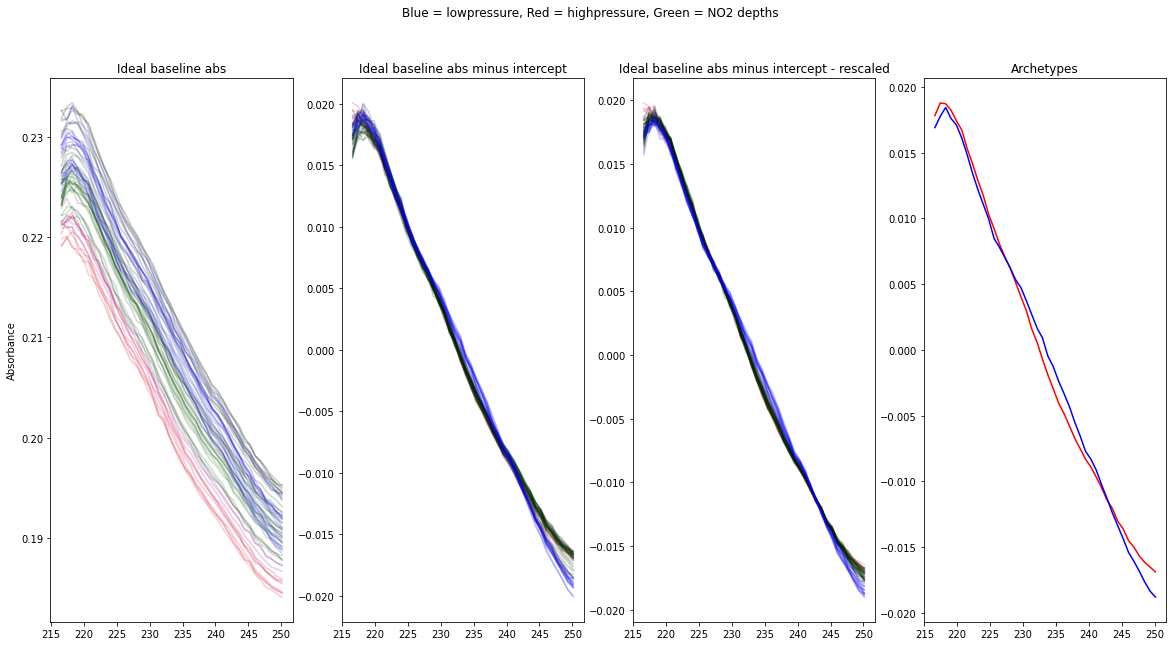

In [144]:
class JoshColMap(object): #enum-like object to store what the columns are
    BL_B = 6
    BL_M = 7
    NO3 = 5
    RMS_ERROR = 8
    PRESSURE = 2

print("For float 6960 cycle 44")
plot_ideal_baseline_absorbances(
    abs_cor=f6960_44_ABS_COR[:],
    no3_concs=f6960_44_ORIG_OUT[:,JoshColMap.NO3][:],
    pressure=f6960_44_ORIG_OUT[:,JoshColMap.PRESSURE][:],
    lowerpressurecutoff=TOPLIM,
    higherpressurecutoff=BOTLIM)

## Plot cycle 44 and cycle 38 together

Observation when plotting both cycle 44 and cycle 38 together: after rescaling the lines that have the intercept removed, , the blue lines and red lines seem to converge...implies that there is notion of rescaling, but it's just not necessarily a linear fit that needs to be rescaled.

Both float 38 and 44 together


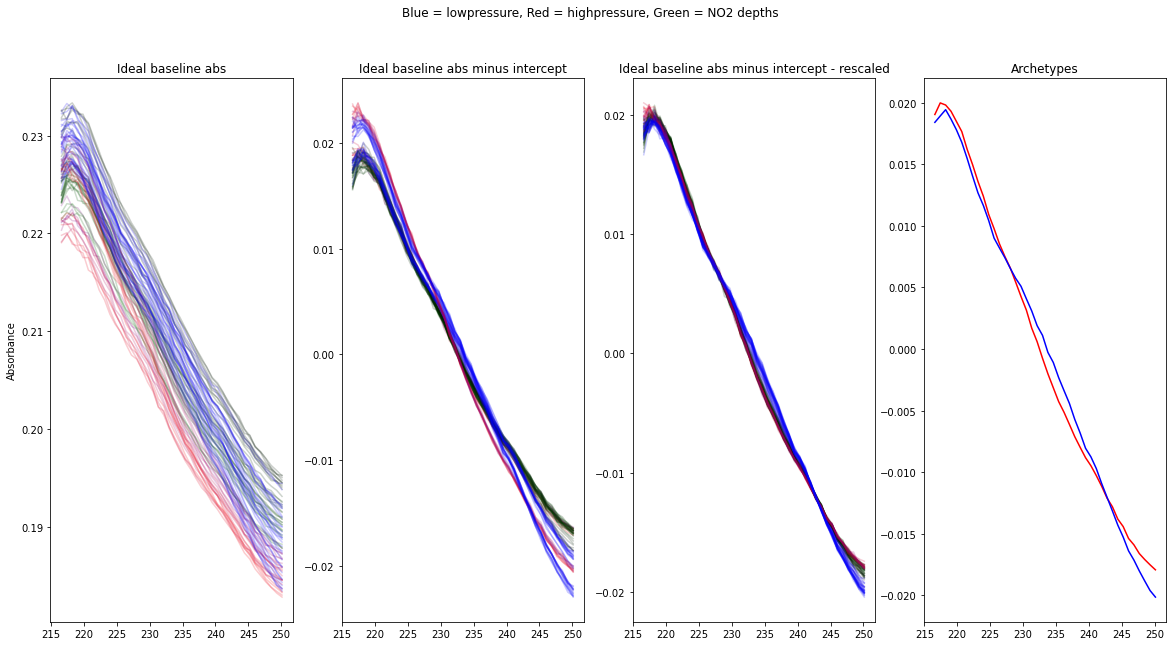

Both float 38 and 44 together - with NO2 from 38


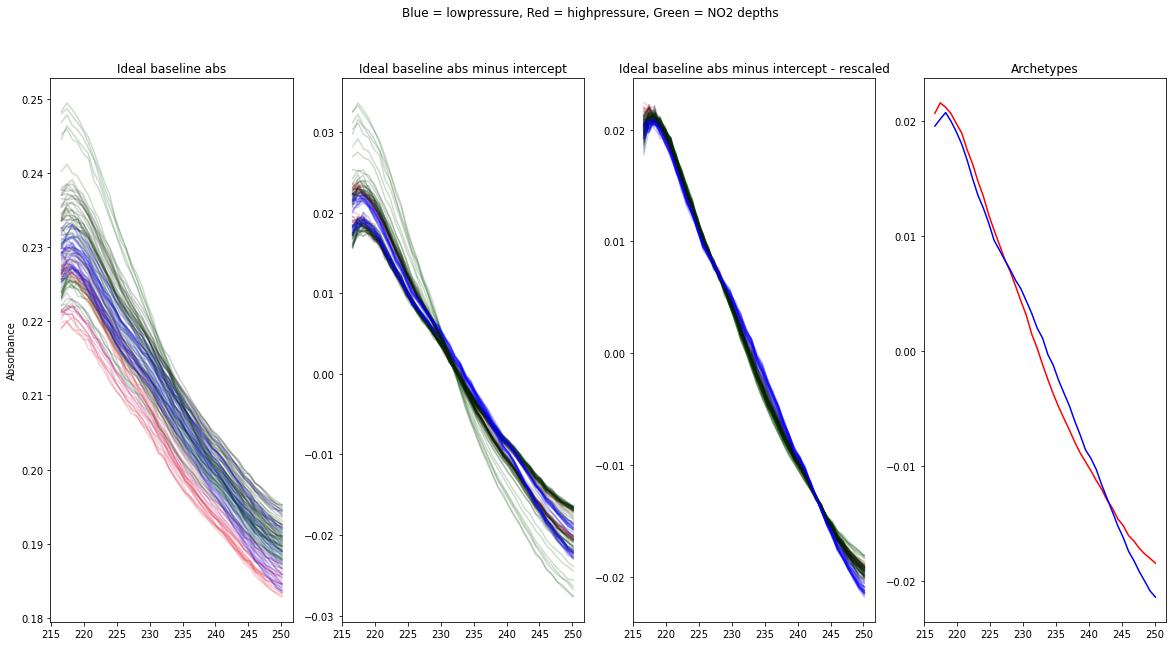

In [145]:
print("Both float 38 and 44 together")
plot_ideal_baseline_absorbances(
    abs_cor=np.concatenate([f6960_44_ABS_COR[:], ABS_COR[NO2_REGION_MASK==False]], axis=0),
    no3_concs=np.concatenate([f6960_44_ORIG_OUT[:,JoshColMap.NO3], JOSH_NO3[NO2_REGION_MASK==False]], axis=0),
    pressure=np.concatenate([f6960_44_ORIG_OUT[:,JoshColMap.PRESSURE], PRESSURE[NO2_REGION_MASK==False]], axis=0),
    lowerpressurecutoff=TOPLIM,
    higherpressurecutoff=BOTLIM)

print("Both float 38 and 44 together - with NO2 from 38")
plot_ideal_baseline_absorbances(
    abs_cor=np.concatenate([f6960_44_ABS_COR[:], ABS_COR[:]], axis=0),
    no3_concs=np.concatenate([f6960_44_ORIG_OUT[:,JoshColMap.NO3], JOSH_NO3[:]], axis=0),
    pressure=np.concatenate([f6960_44_ORIG_OUT[:,JoshColMap.PRESSURE], PRESSURE[:]], axis=0),
    lowerpressurecutoff=TOPLIM,
    higherpressurecutoff=BOTLIM)

## Archetype-inferred baselines


Plan: Get 'idea' baselines by subtracting inferred NO3 conc (using previous baselines) from the absorbance. Estimate ideal baseline shape by: (a) subtracting the mean, and (b) normalizing by standard deviation. Find archetypes. Then re-fit the data using this altered baseline formulation.

In [187]:

def estimate_scalablebaselines_shapes(ideal_baseline_abs, num_archetypes=2):
    mean_std = np.mean(np.std(ideal_baseline_abs, axis=1))
    #subtract the mean and variance normalize, use it to get a default profile
    # that can be scaled up/down.
    norm_ideal_baseline_abs = mean_std*((ideal_baseline_abs
        - np.mean(ideal_baseline_abs, axis=1)[:,None])/np.std(
            ideal_baseline_abs, axis=1)[:,None])
    
    archetypes, _, _, _, _ = py_pcha.PCHA(norm_ideal_baseline_abs.T,
                                          num_archetypes)
    archetypes = np.array(archetypes.T)
    return archetypes

#define a general class for solving for the concentrations of various species
class SolveForConcentrations(object):

    def __init__(self, extinction_coeffs):
        #extinction_coeffs has dims of [num_profiles X wavelengths]
        self.extinction_coeffs = extinction_coeffs

    def solve(self, absorbances, t_fit,
                    enforce_pos=False, verbose=False,
                    return_absorbance_fit=False,
                    scalefactor=1):
        #absorbances has dimensions of num_obs X wavelengths
        assert absorbances.shape[1] == self.extinction_coeffs.shape[1]

        #Set up the convex optimization problem
        vars = cp.Variable((absorbances.shape[0],
                            self.extinction_coeffs.shape[0]))
        #vars should have dims of [num_obs X num_absorbance_profiles]

        #define the objective
        obj = cp.Minimize(cp.sum_squares(
                           scalefactor*absorbances[:,t_fit]
                           - vars@(scalefactor*self.extinction_coeffs[:,t_fit]) ))
        constraints = [] if enforce_pos==False else [vars >= 0]
        problem = cp.Problem(obj, constraints)
        optimal_value = problem.solve(verbose=verbose,
                                      max_iter=1000000,
                                      #eps_abs=1e-7,
                                      #eps_rel = 1e-7,
                                      #eps_prim_inf=1e-7,
                                      #eps_dual_inf=1e-7
                                      )
        print("Optimal value:", optimal_value)

        if (return_absorbance_fit):
          return vars.value, vars.value[:,:,None]*self.extinction_coeffs[None,:,:]
        else:
          return vars.value


def iteratively_refine_scalablebaselines(curr_baselines, absorbances,
                                        t_fit_init, t_fit_expanded,
                                        iters):
  scalablebaselines = []
  results = []
  for i in range(iters):
    print("On iter",i)
    result = SolveForConcentrations(
                extinction_coeffs = np.array([
                    np.ones_like(WL_ROW)]+
                    curr_baselines
                    +[ENO3])).solve(absorbances=absorbances,
                                    t_fit=t_fit_init if i==0 else t_fit_expanded)
    curr_baselines = list(estimate_scalablebaselines_shapes(
        ideal_baseline_abs = absorbances - result[:,-1][:,None]*ENO3[None,:]))
    scalablebaselines.append(curr_baselines)
    results.append(result)
  return scalablebaselines, results


cycle44_scalablebaselines, cycle44_results = iteratively_refine_scalablebaselines(
    curr_baselines=[WL_ROW], absorbances=f6960_44_ABS_COR,
    t_fit_init=T_FIT,
    t_fit_expanded=(WL_ROW >= 217)*(WL_ROW <= 250),
    iters=5)


cycle38_scalablebaselines, cycle38_nono2_results = iteratively_refine_scalablebaselines(
    curr_baselines=[WL_ROW],
    absorbances=ABS_COR[NO2_REGION_MASK==False],
    t_fit_init=T_FIT,
    t_fit_expanded=(WL_ROW >= 217)*(WL_ROW <= 250),
    iters=5)

cycle38and44_scalablebaselines, _ = iteratively_refine_scalablebaselines(
    curr_baselines=[WL_ROW],
    absorbances=np.concatenate([ABS_COR[NO2_REGION_MASK==False],f6960_44_ABS_COR],
                               axis=0),
    t_fit_init=T_FIT,
    t_fit_expanded=(WL_ROW >= 217)*(WL_ROW <= 250),
    iters=5)




On iter 0
Optimal value: 0.00038307121189636836
On iter 1
Optimal value: 7.622490557555287e-05
On iter 2
Optimal value: 7.604403438141913e-05
On iter 3
Optimal value: 7.603635984103838e-05
On iter 4
Optimal value: 7.603439142636065e-05
On iter 0
Optimal value: 0.00017426719798940024
On iter 1
Optimal value: 2.7840142178409953e-05
On iter 2
Optimal value: 2.7811499289760393e-05
On iter 3
Optimal value: 2.7810389570985876e-05
On iter 4
Optimal value: 2.7810361635212048e-05
On iter 0
Optimal value: 0.0005573384098857682
On iter 1
Optimal value: 0.00011487278135073075
On iter 2
Optimal value: 0.00011491468754861276
On iter 3
Optimal value: 0.00011491641851354201
On iter 4
Optimal value: 0.00011491655942328288


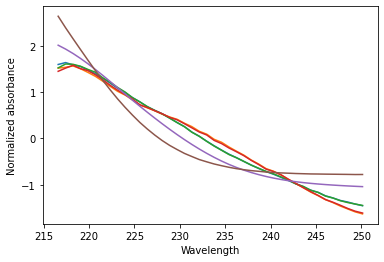

In [188]:
def plot_with_normalized_std(vals, target_std=1):
  plt.plot(WL_ROW, target_std*vals/np.std(vals))

plot_with_normalized_std(cycle38_scalablebaselines[-1][0])
plot_with_normalized_std(cycle38_scalablebaselines[-1][1])
plot_with_normalized_std(cycle44_scalablebaselines[-1][0])
plot_with_normalized_std(cycle44_scalablebaselines[-1][1])
plot_with_normalized_std(ENO2-np.mean(ENO2))
plot_with_normalized_std(ENO3-np.mean(ENO3))
plt.xlabel("Wavelength")
plt.ylabel("Normalized absorbance")
plt.show()

## Plot the result

In [205]:
scalefactor = 100
cycle38_withno2 = SolveForConcentrations(
    extinction_coeffs = np.array(
        [np.ones_like(WL_ROW)]+
        cycle38_scalablebaselines[-1]+
        [ENO3,
         ENO2])).solve(absorbances=ABS_COR,
                      t_fit=(WL_ROW >= 217)*(WL_ROW <= 250),
                      enforce_pos=True,
                      verbose=True,
                      return_absorbance_fit=True,
                      scalefactor=scalefactor)
cycle38_withoutno2 = SolveForConcentrations(
    extinction_coeffs = np.array(
        [np.ones_like(WL_ROW)]+
        cycle38_scalablebaselines[-1]+
        [ENO3])).solve(absorbances=ABS_COR,
                      t_fit=(WL_ROW >= 217)*(WL_ROW <= 250),
                      enforce_pos=True,
                      verbose=True,
                      return_absorbance_fit=True,
                      scalefactor=scalefactor)
cycle38_repljosh = SolveForConcentrations(
    extinction_coeffs = np.array([
        np.ones_like(WL_ROW),
        WL_ROW,
        ENO3])).solve(absorbances=ABS_COR,
                      t_fit=(WL_ROW >= 217)*(WL_ROW <= 240),
                      verbose=False,
                      return_absorbance_fit=True)

-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 2700, constraints m = 2700
          nnz(P) + nnz(A) = 17100
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 1000000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1   0.0000e+00   4.40e+01   1.01e+05   1.00e-01   4.40e-03s
 200   7.0874e-01   3.83e-03   2.36e-05   7.46e-03   2.51e-02s
 275   7.0873e-01   4.51e-04   1.05e-05

pressure 998.46


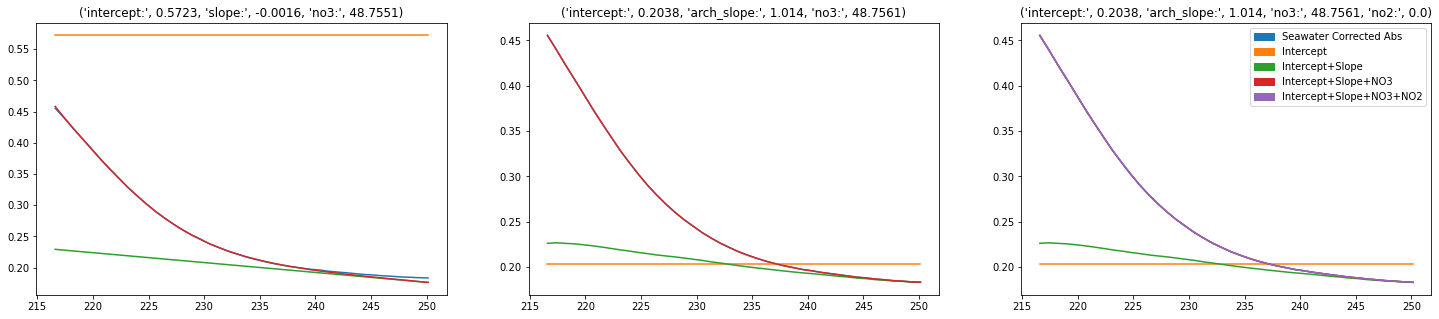

pressure 950.89


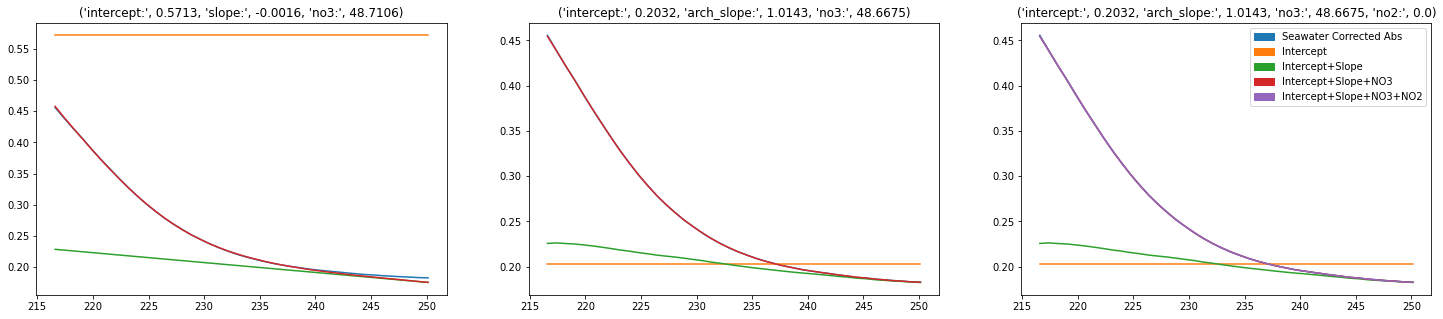

pressure 900.87


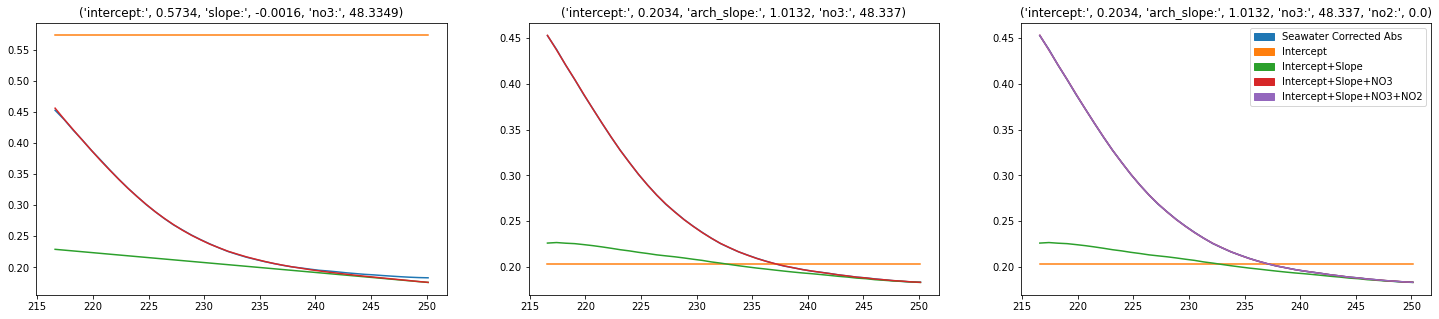

pressure 851.3


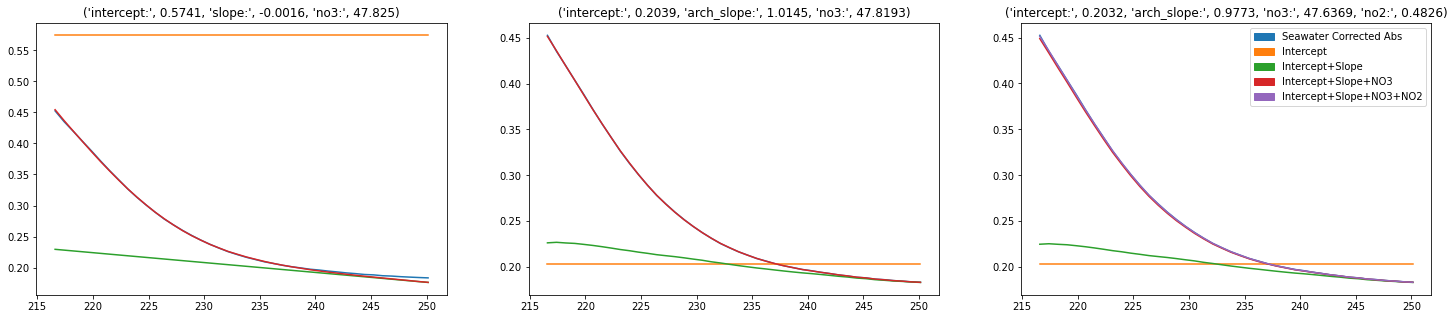

pressure 801.31


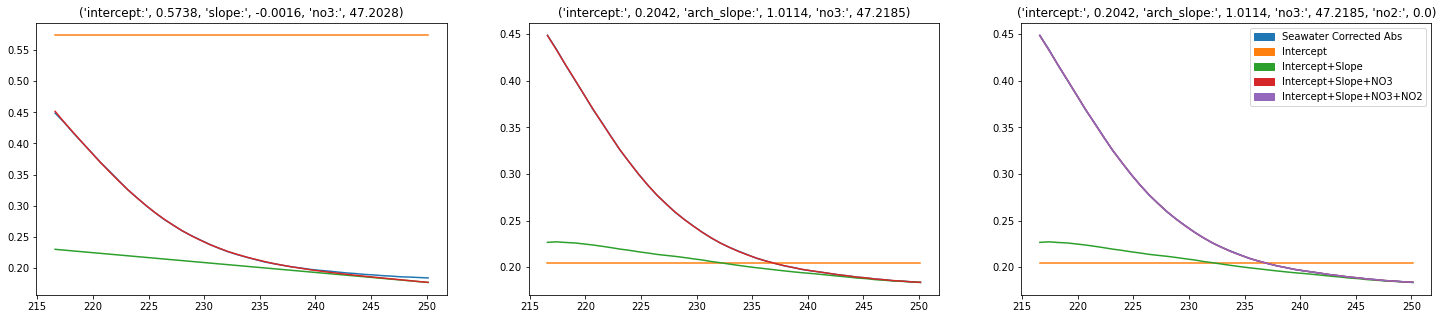

pressure 751.3


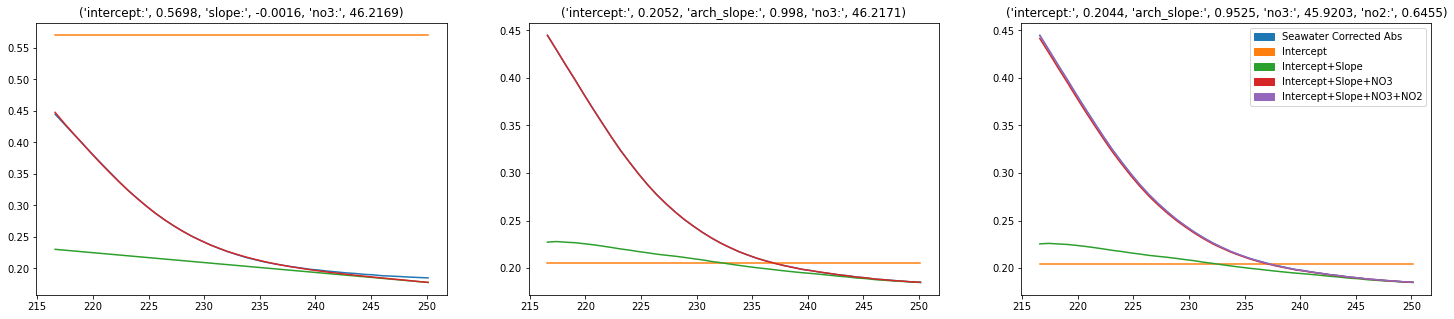

pressure 701.61


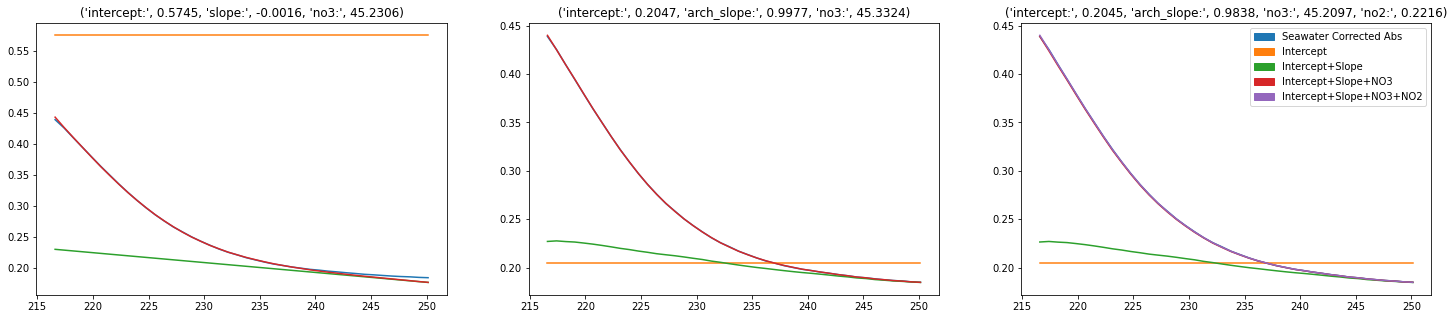

pressure 651.48


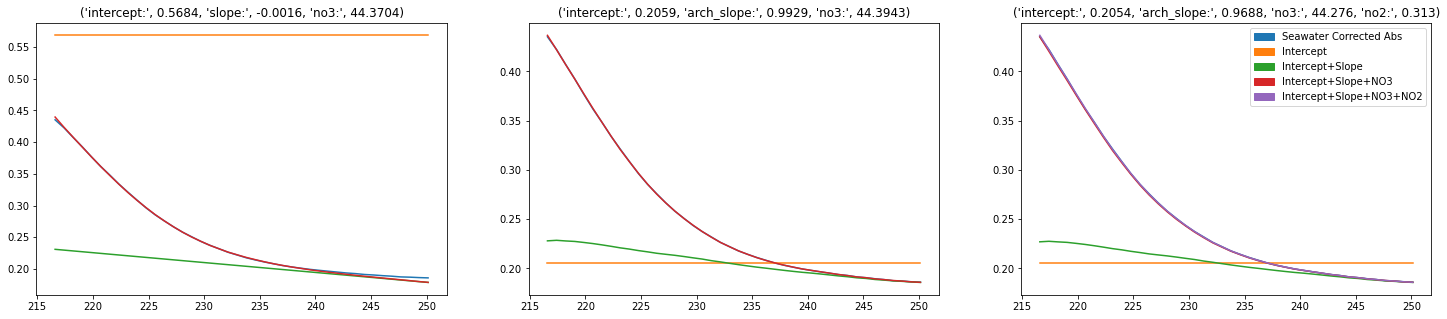

pressure 601.53


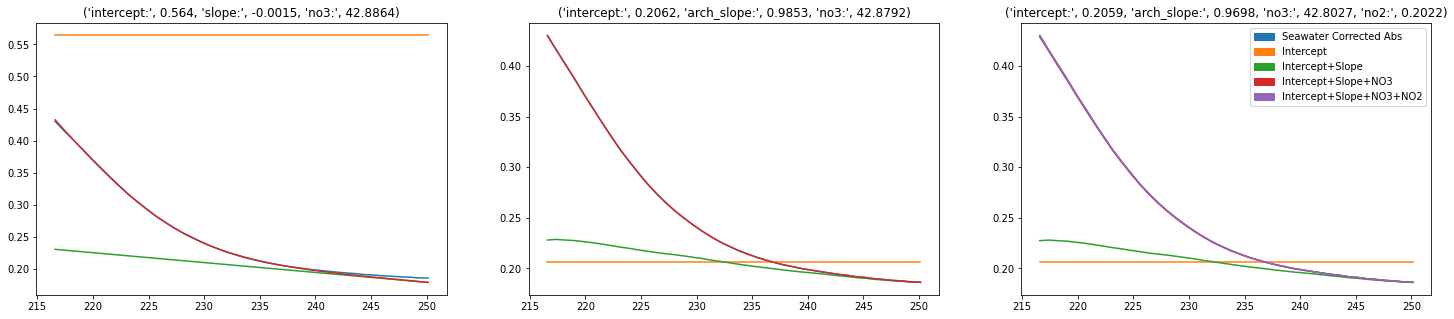

pressure 550.71


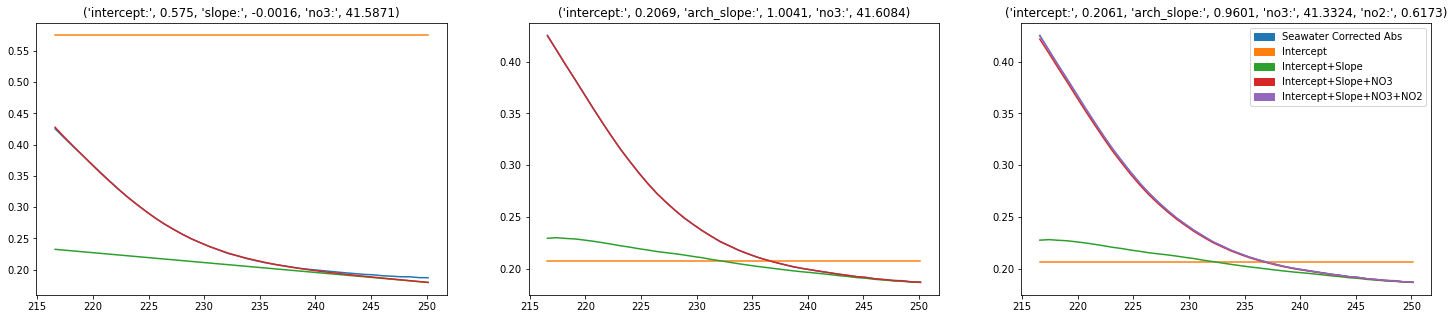

pressure 501.18


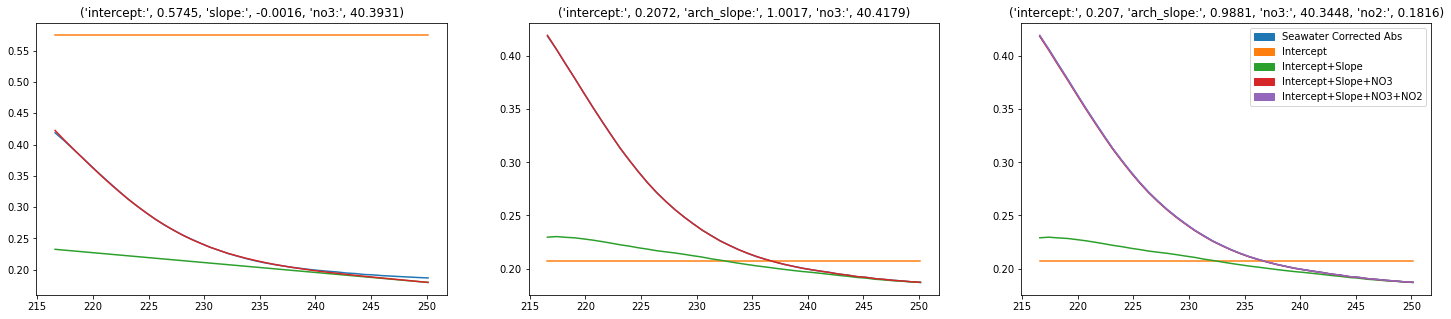

pressure 451.07


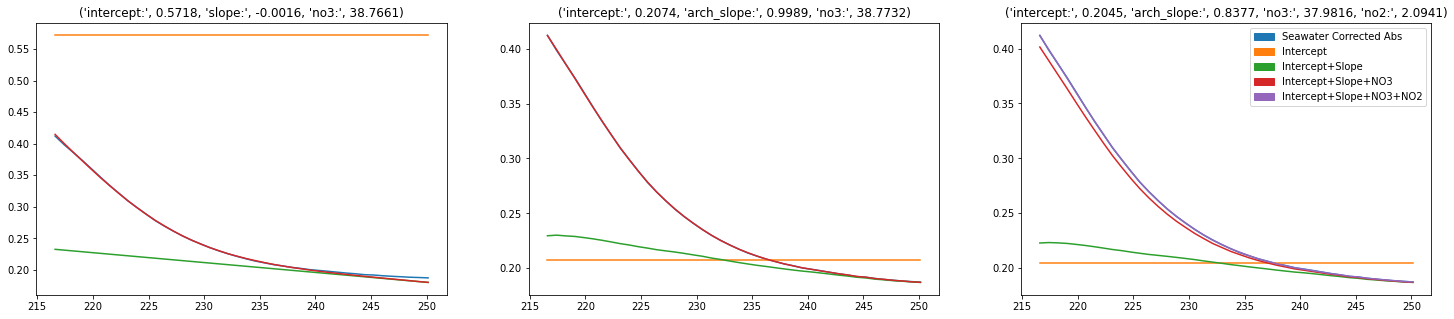

pressure 401.02


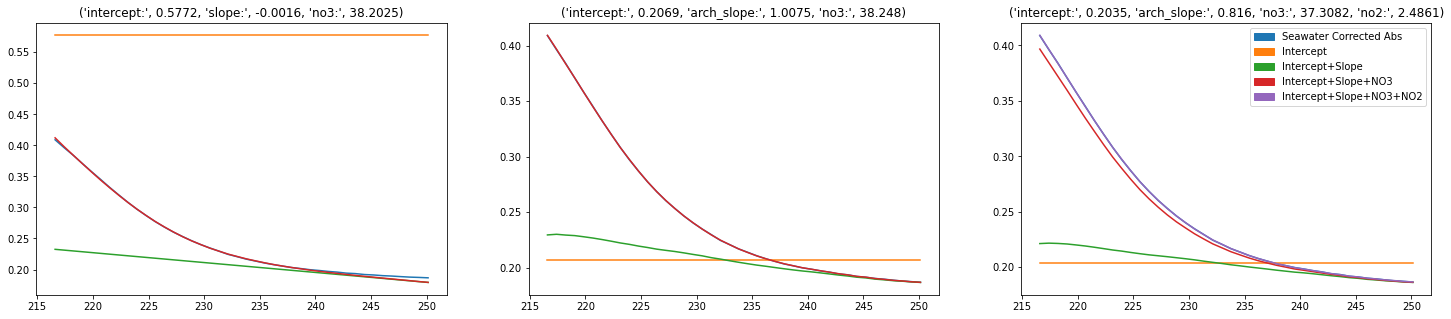

pressure 381.32


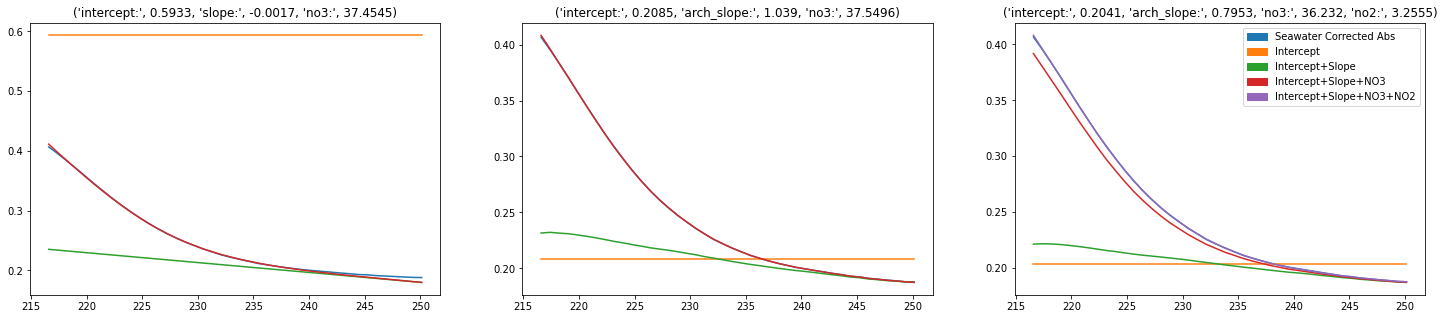

pressure 361.55


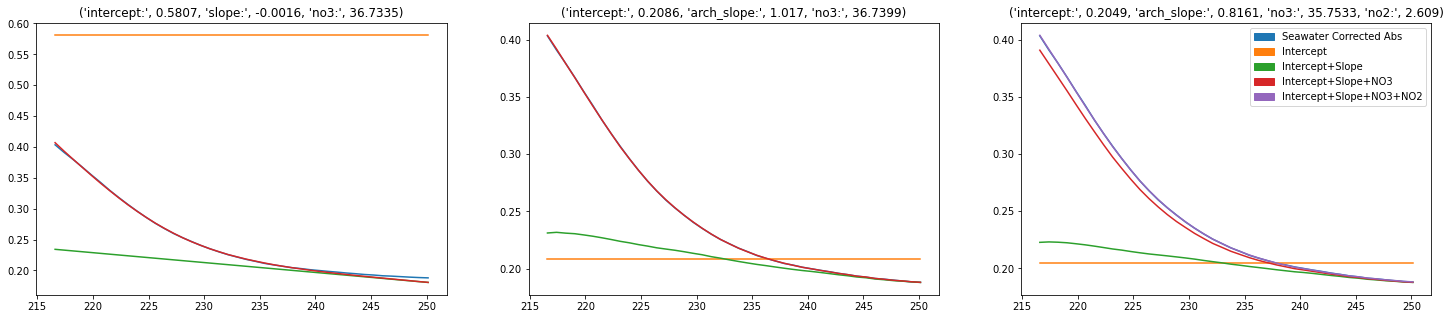

pressure 351.26


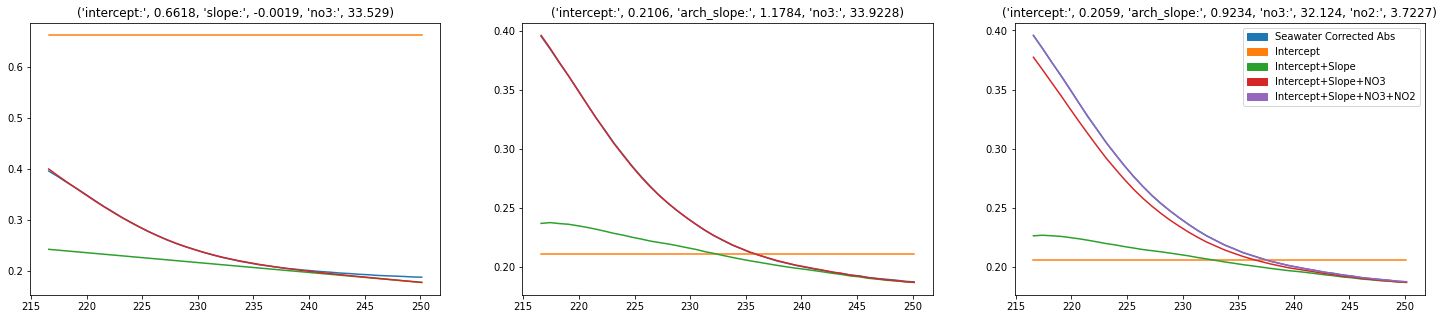

pressure 341.04


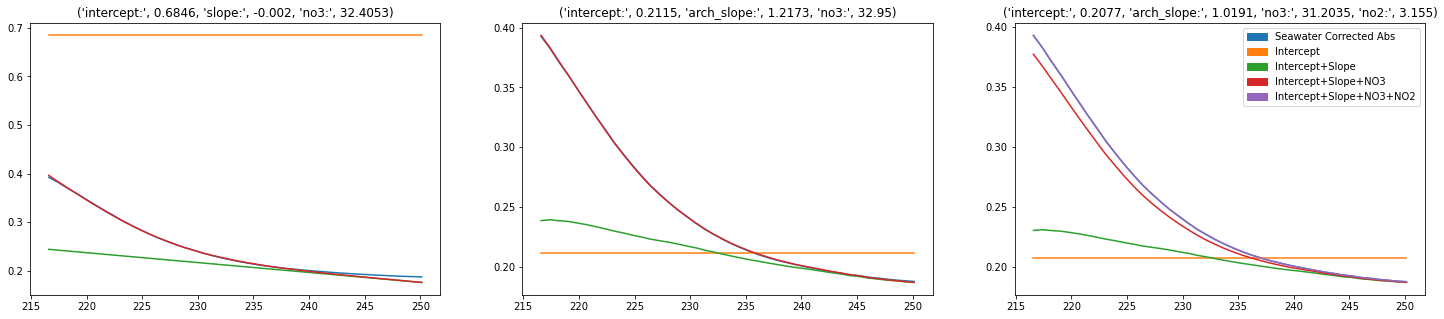

pressure 331.31


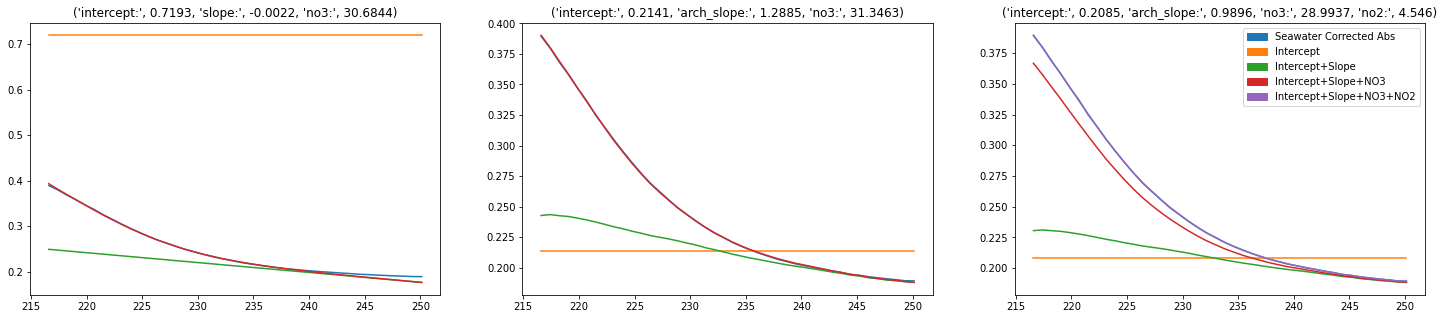

pressure 321.22


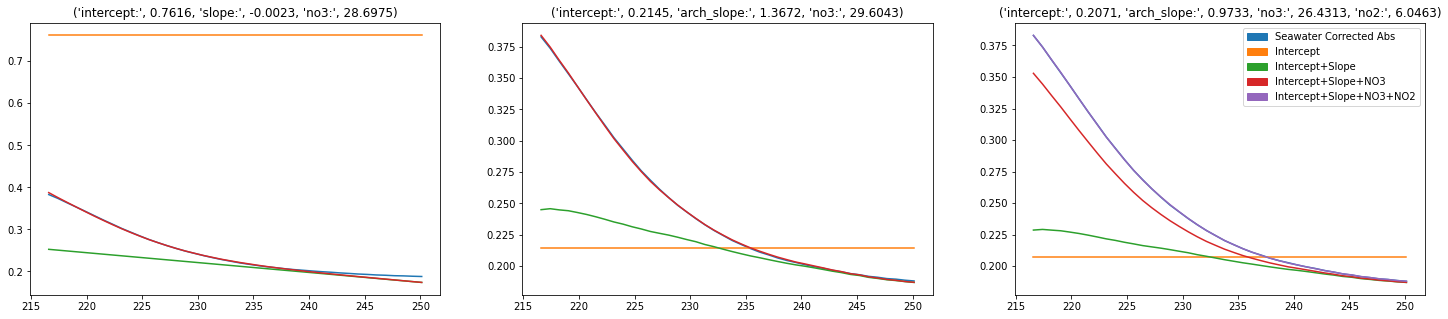

pressure 311.63


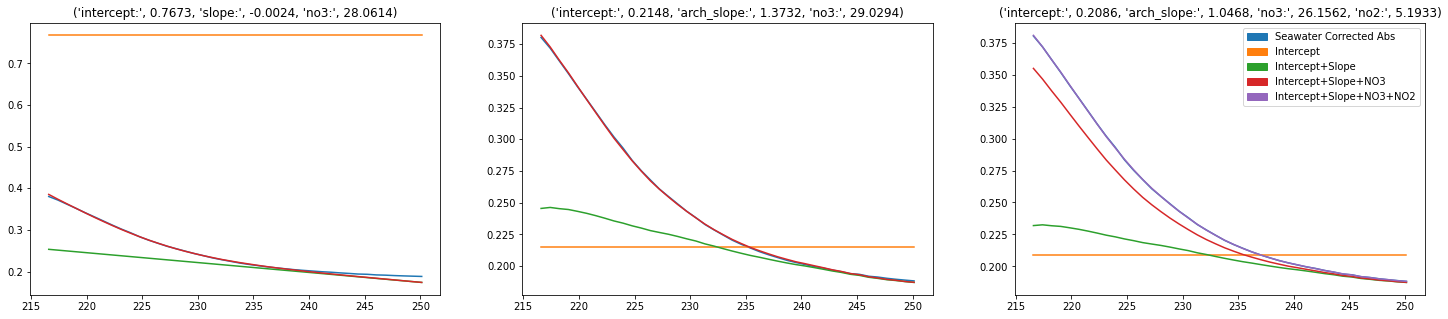

pressure 301.29


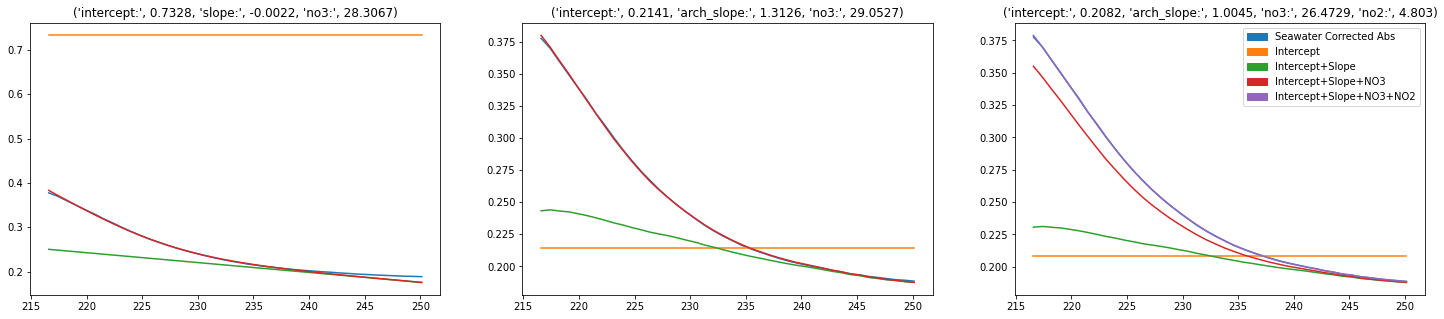

pressure 289.81


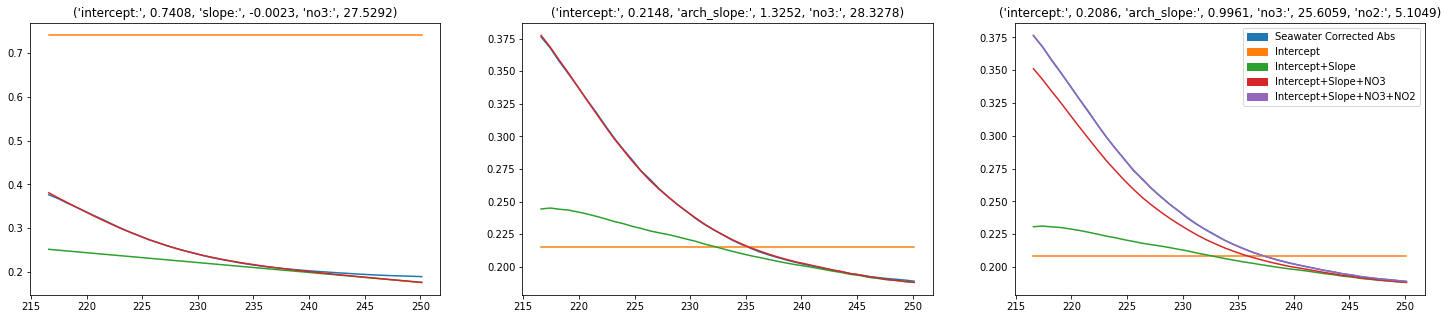

pressure 280.93


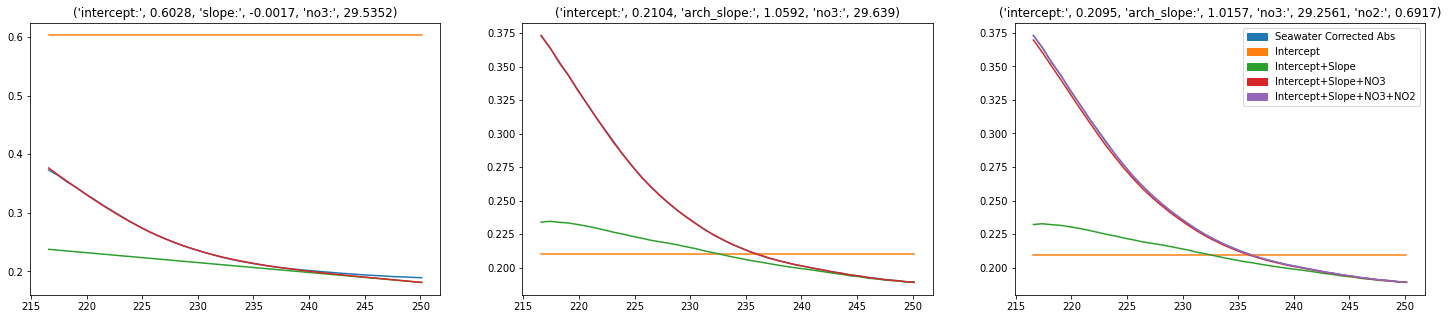

pressure 271.2


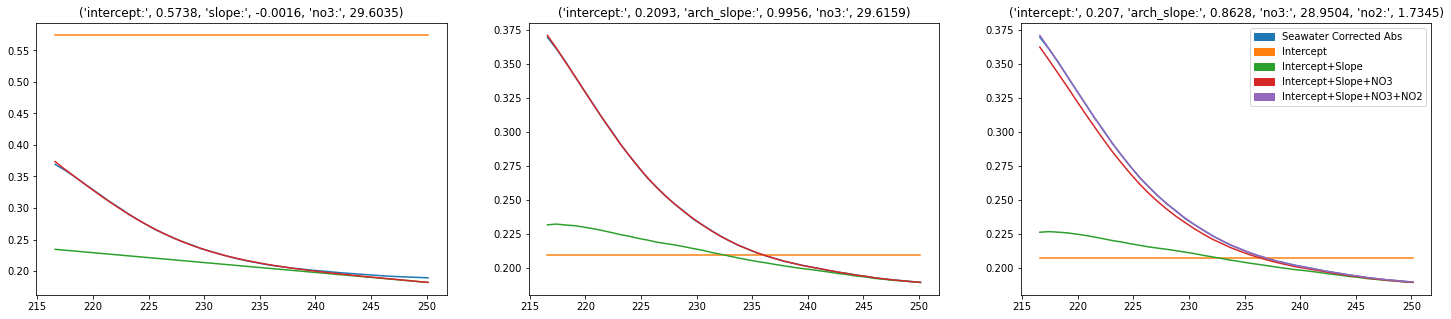

pressure 261.46


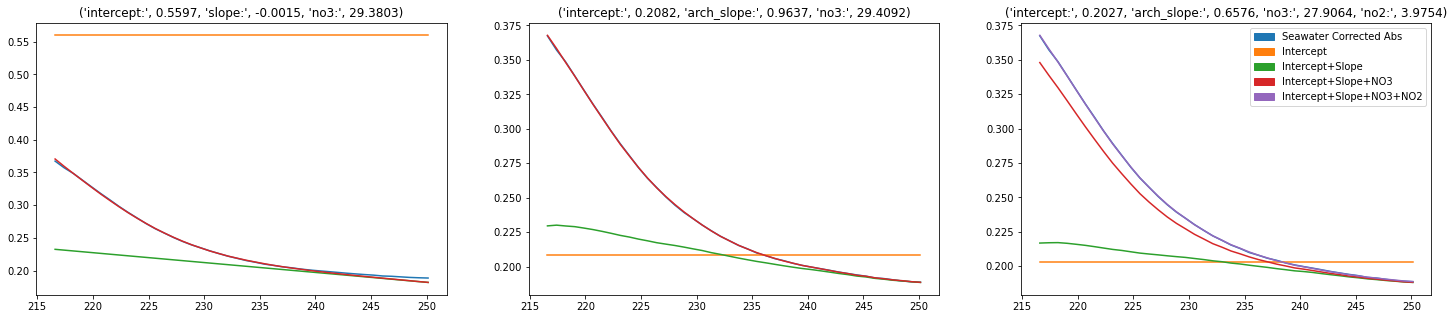

pressure 251.15


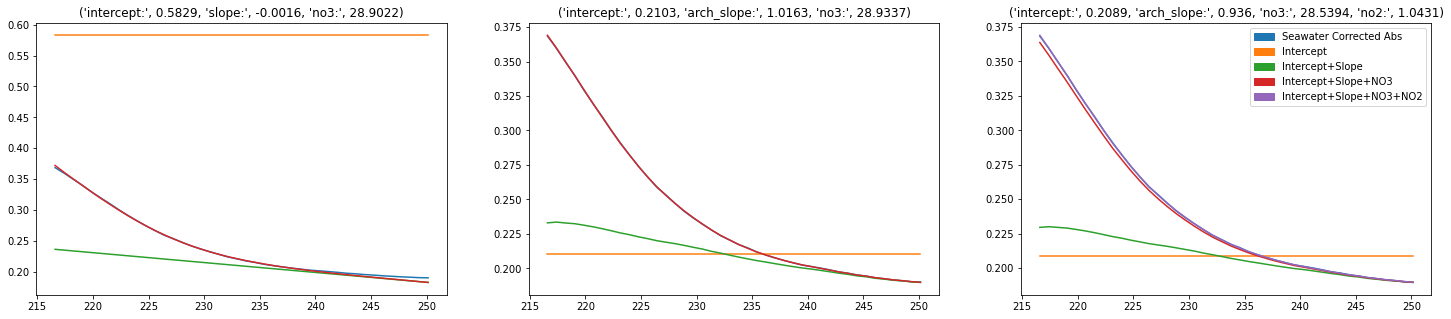

pressure 240.95


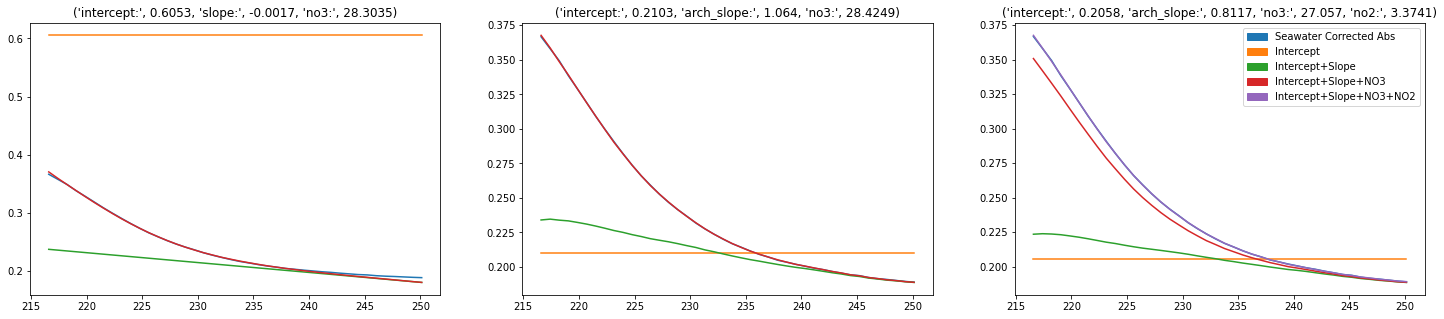

pressure 230.84


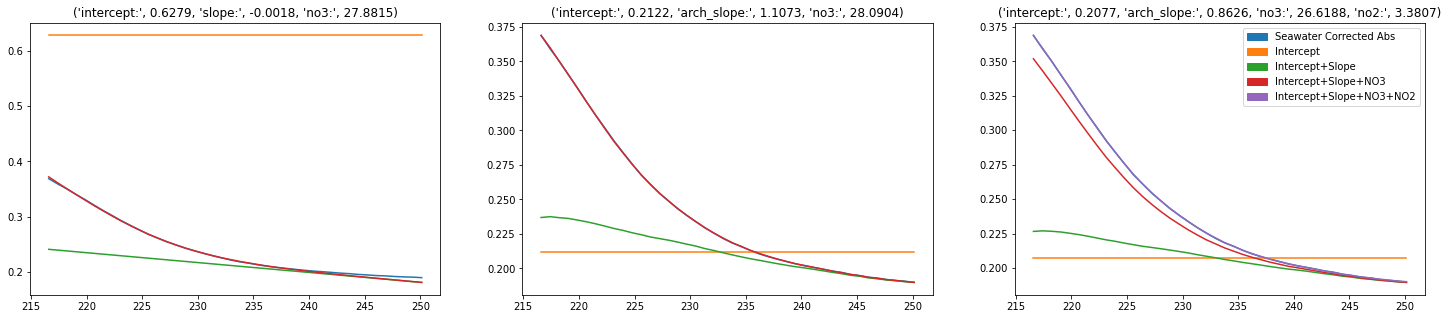

pressure 221.57


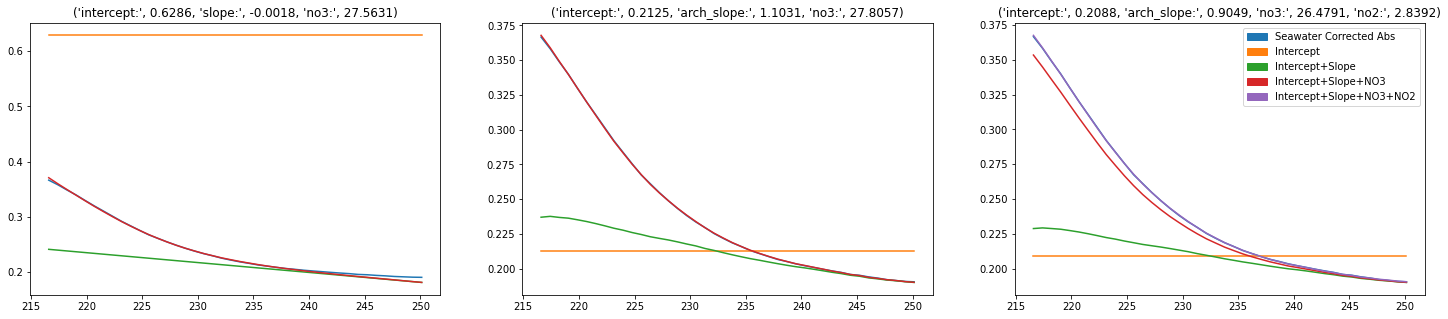

pressure 211.77


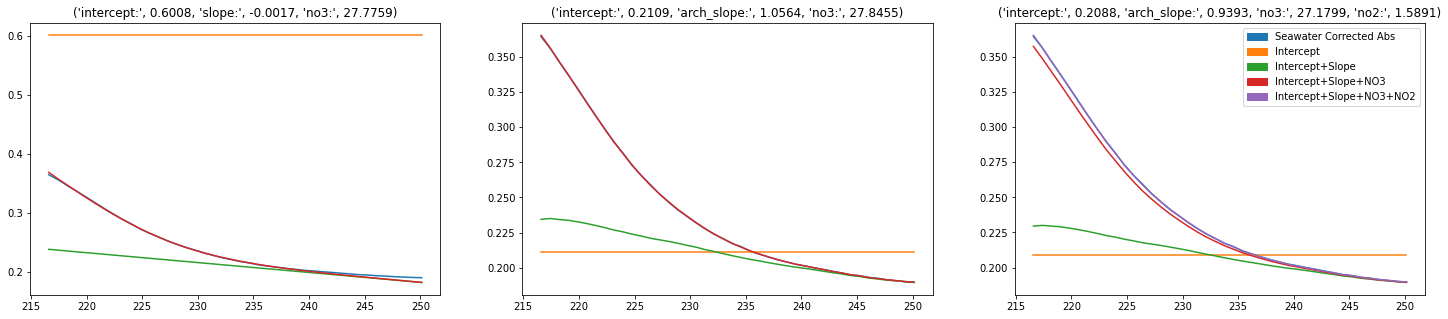

pressure 201.46


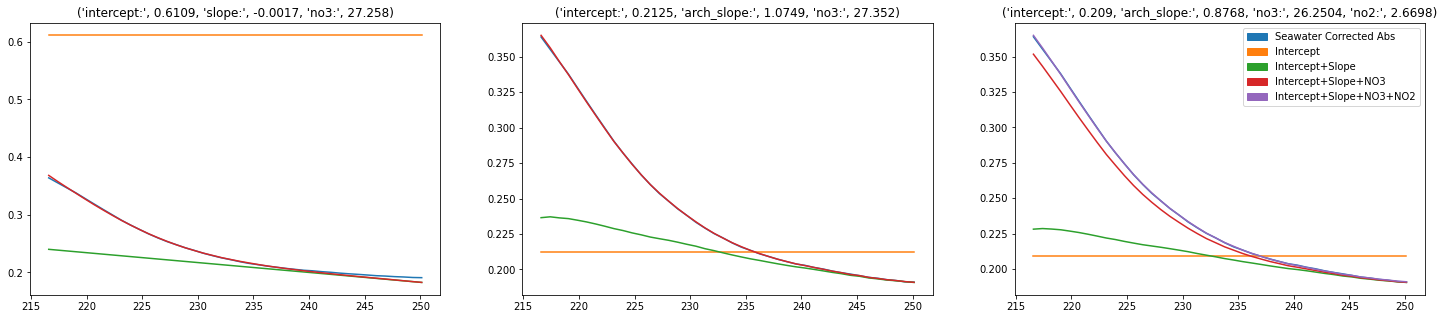

pressure 191.33


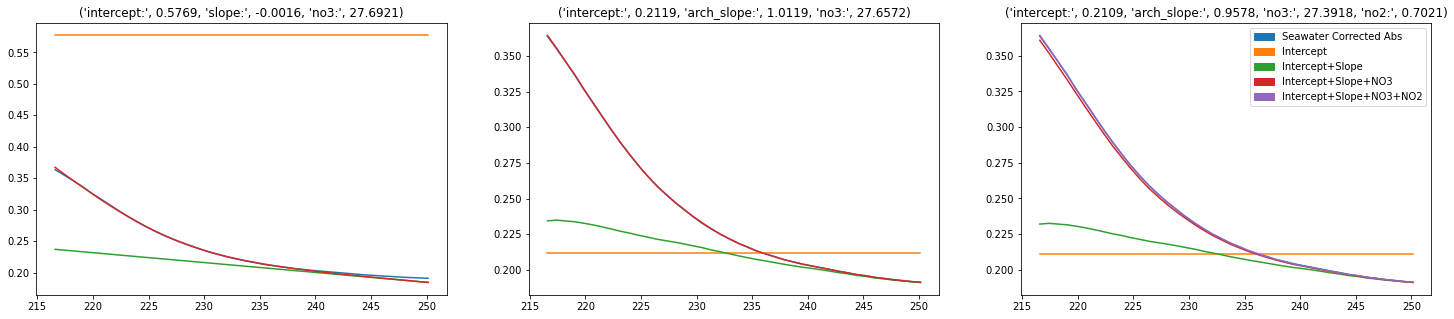

pressure 180.76


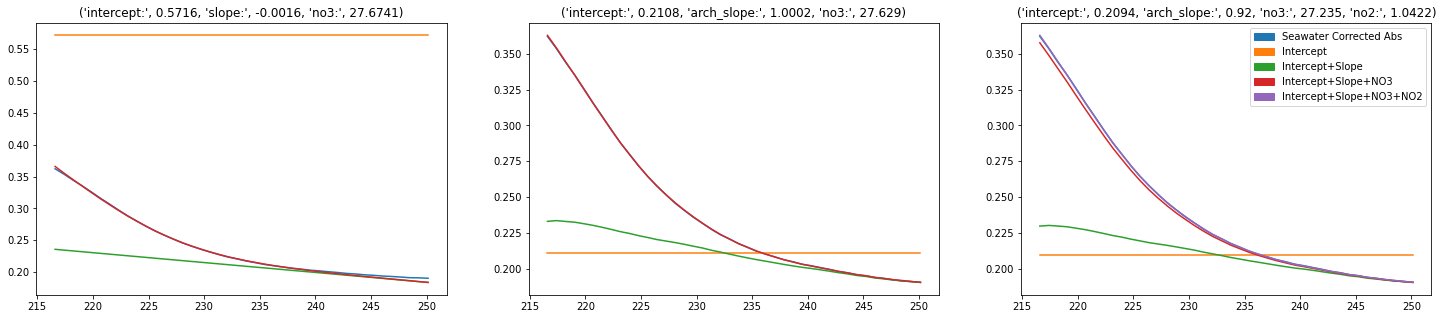

pressure 171.09


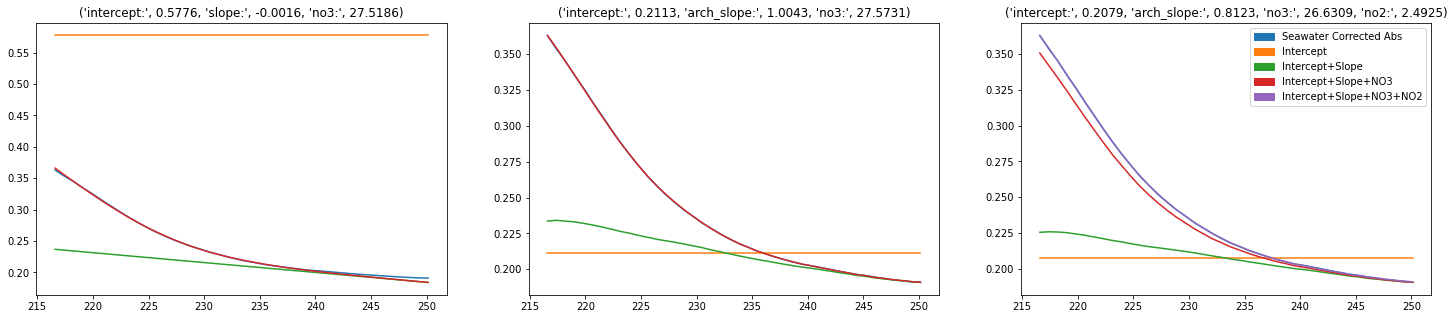

pressure 161.49


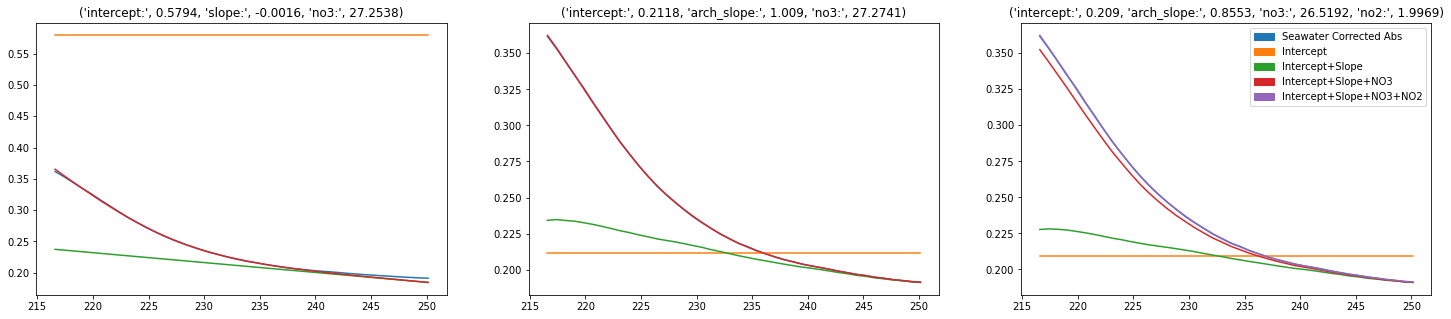

pressure 151.51


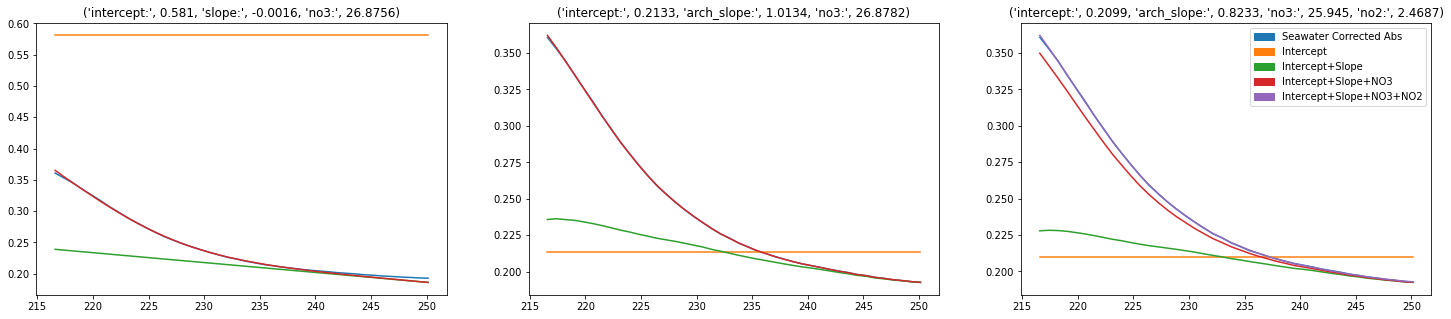

pressure 141.68


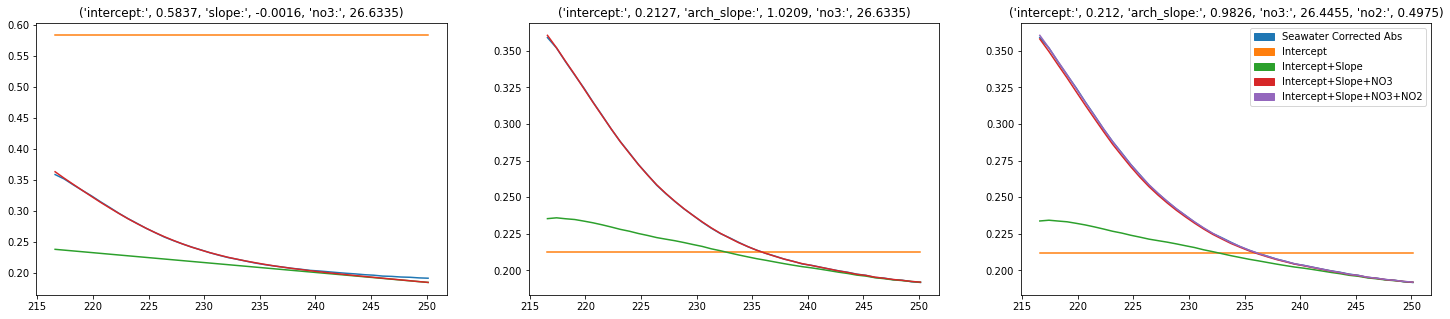

pressure 131.67


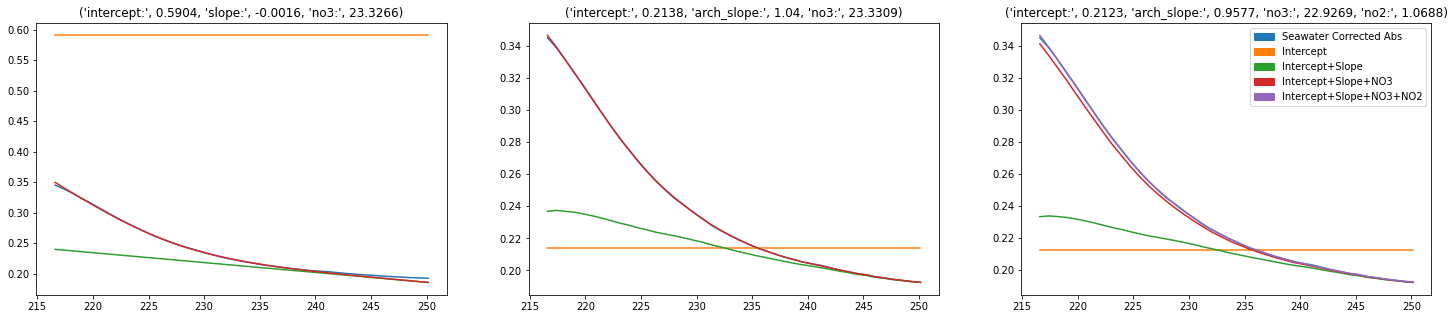

pressure 121.54


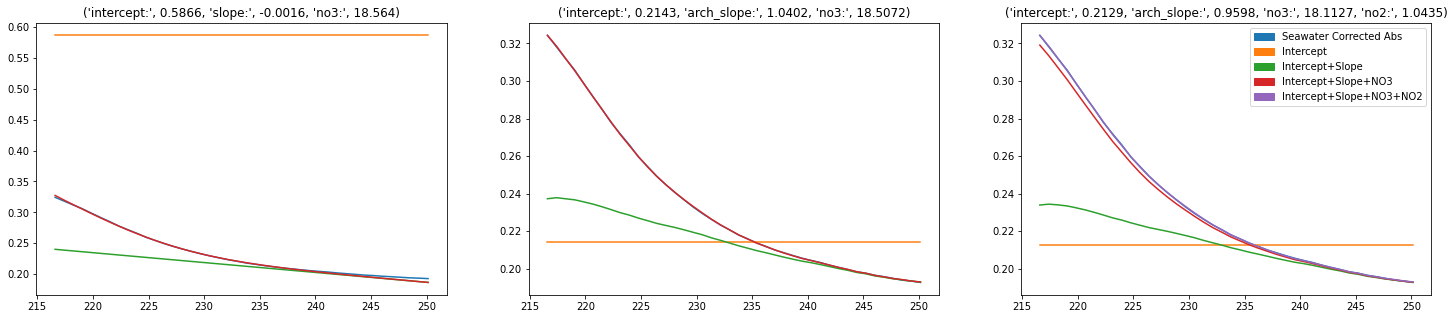

pressure 111.86


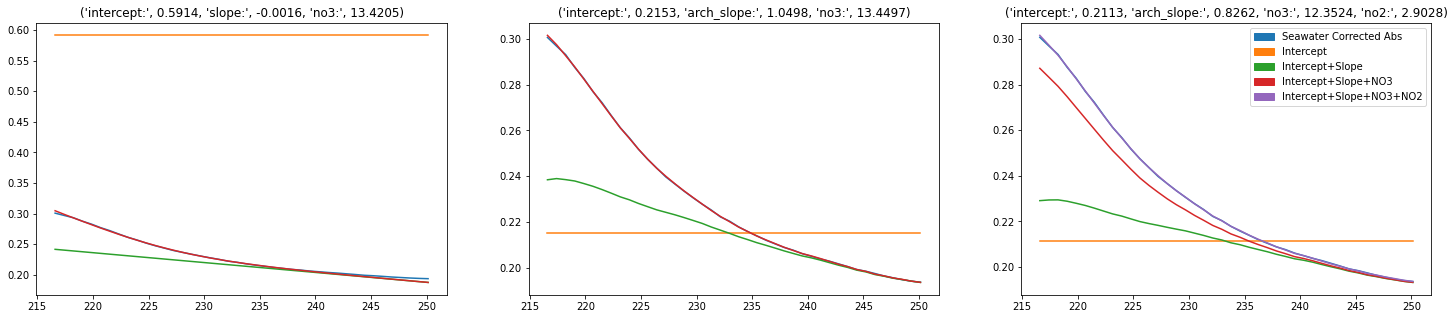

pressure 101.8


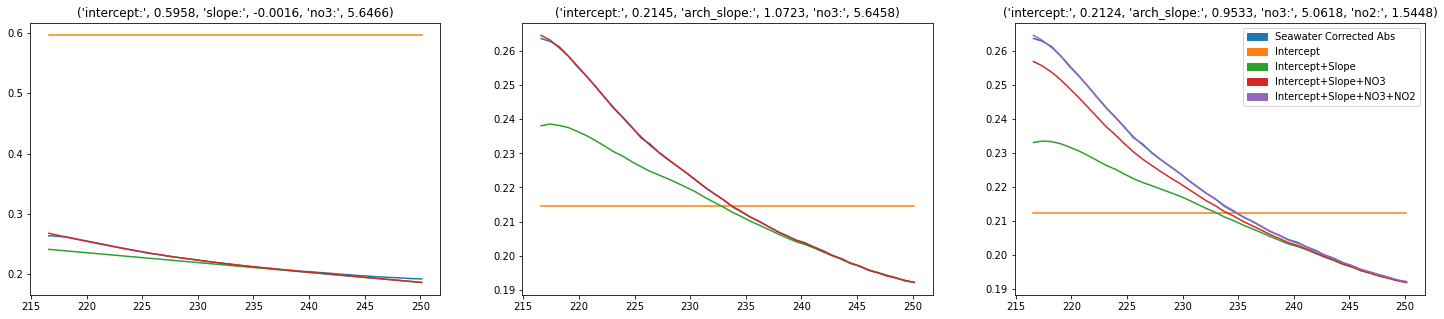

pressure 96.73


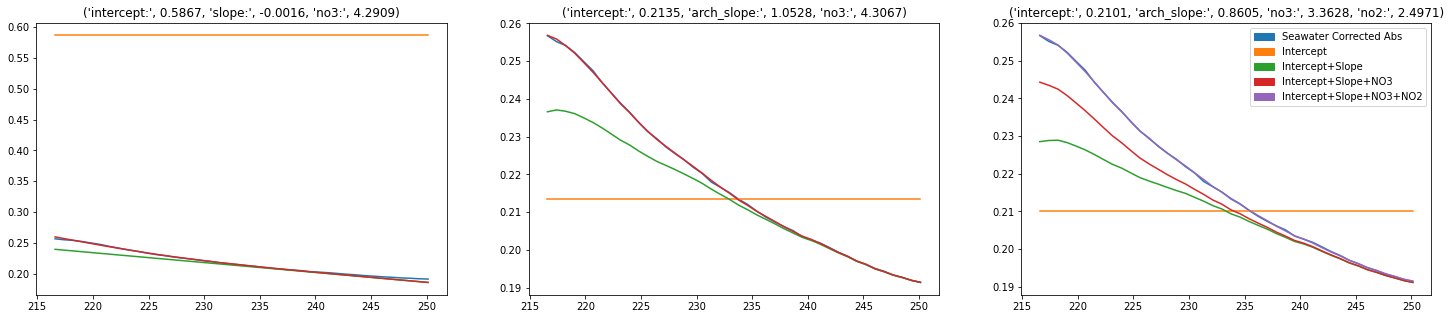

pressure 91.76


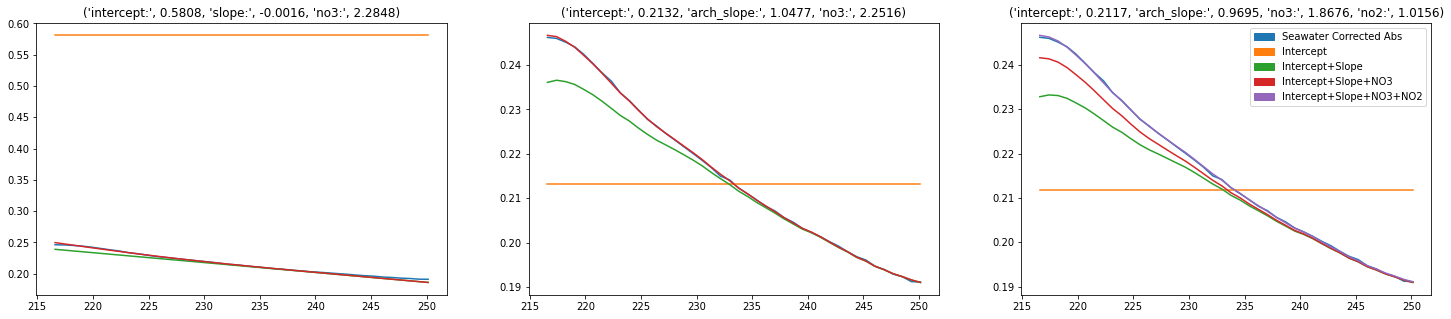

pressure 86.86


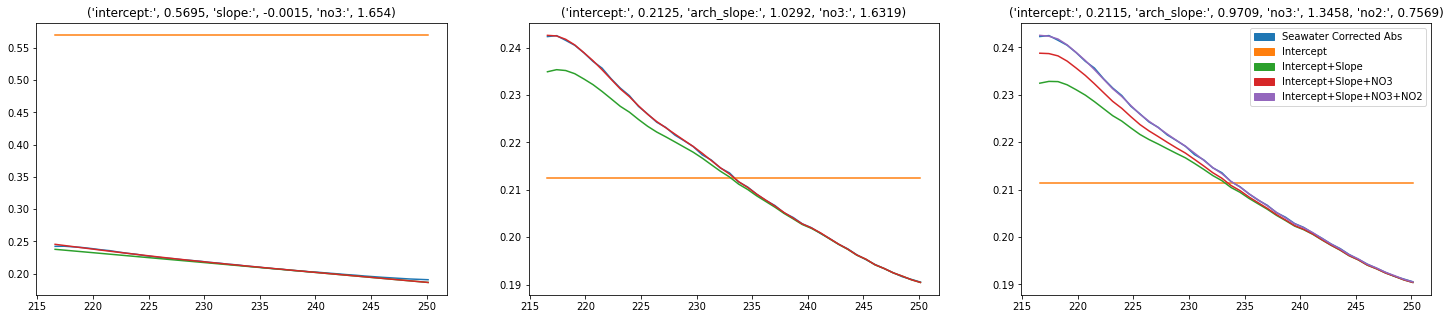

pressure 81.87


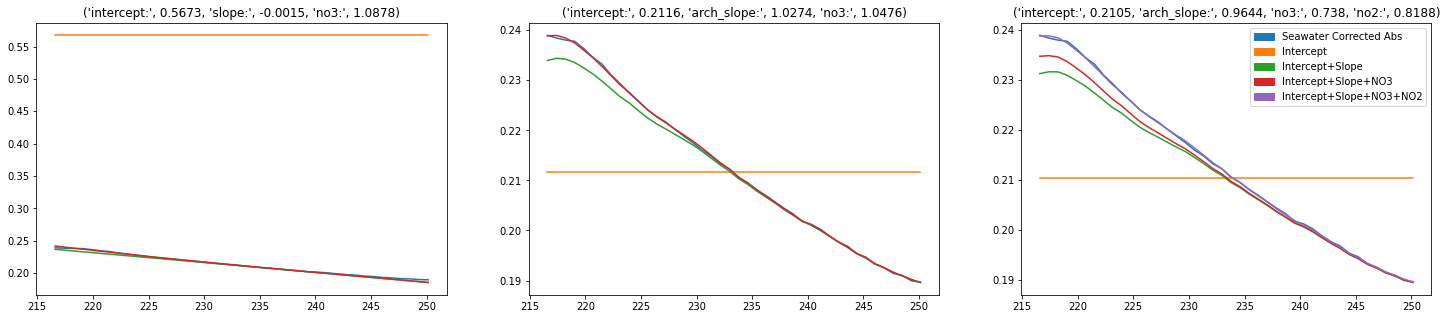

pressure 76.54


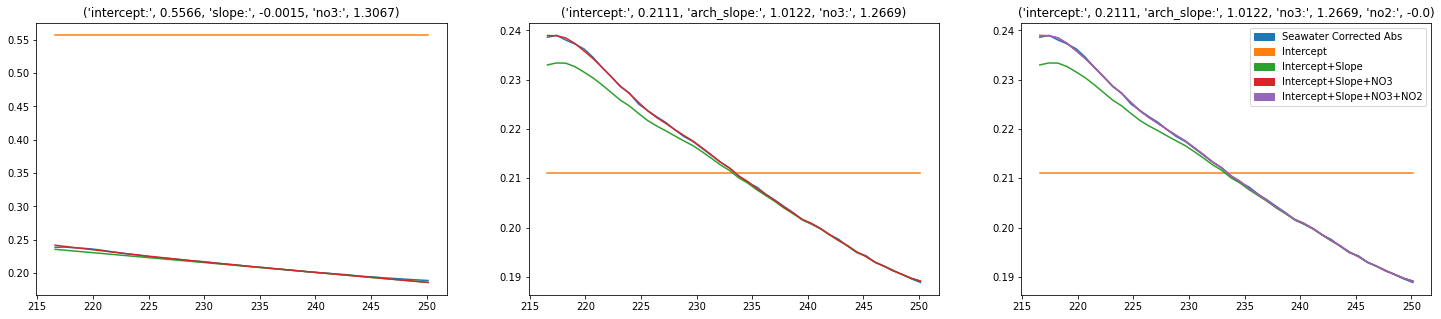

pressure 71.9


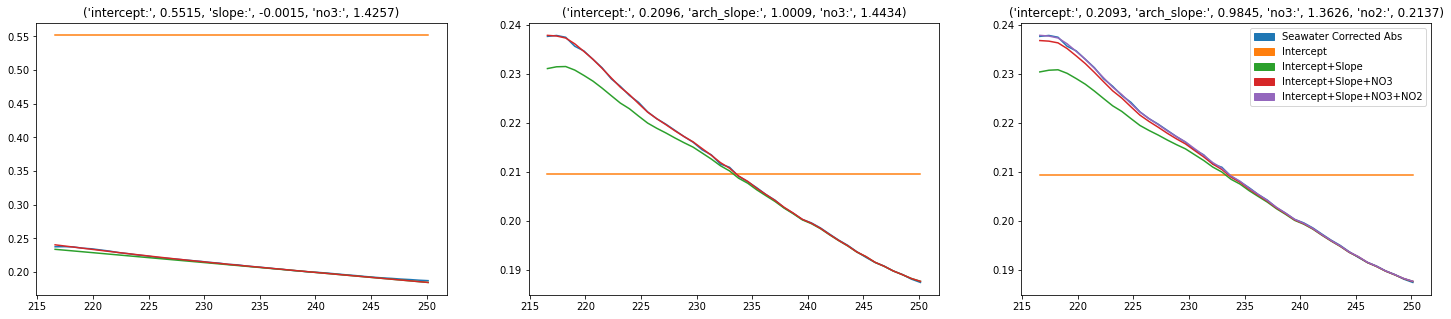

pressure 66.51


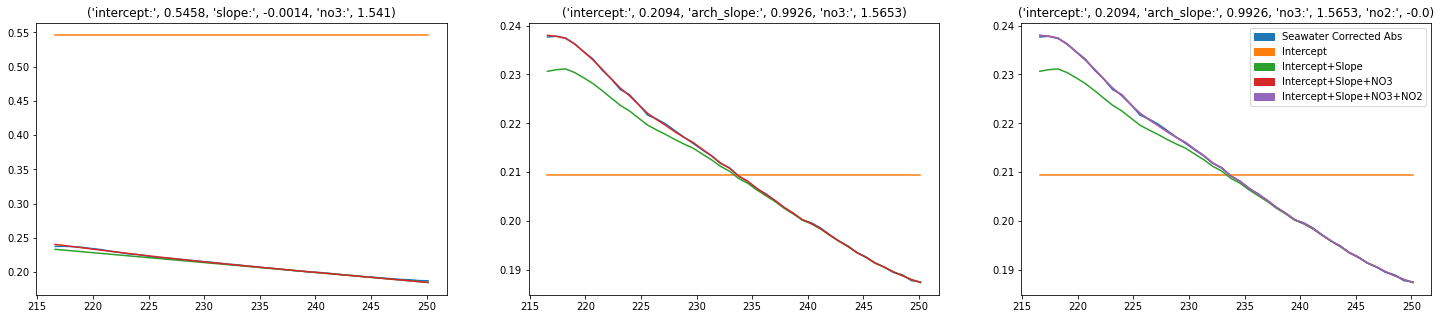

pressure 61.81


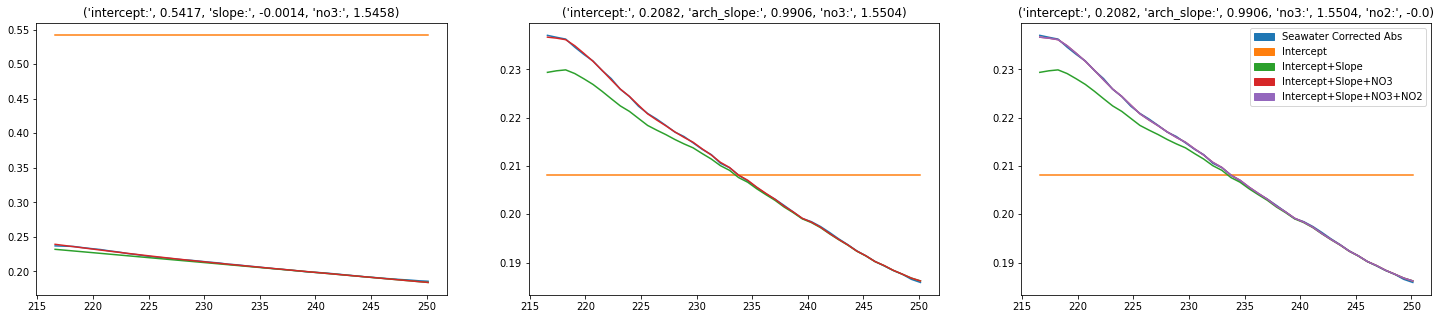

pressure 56.81


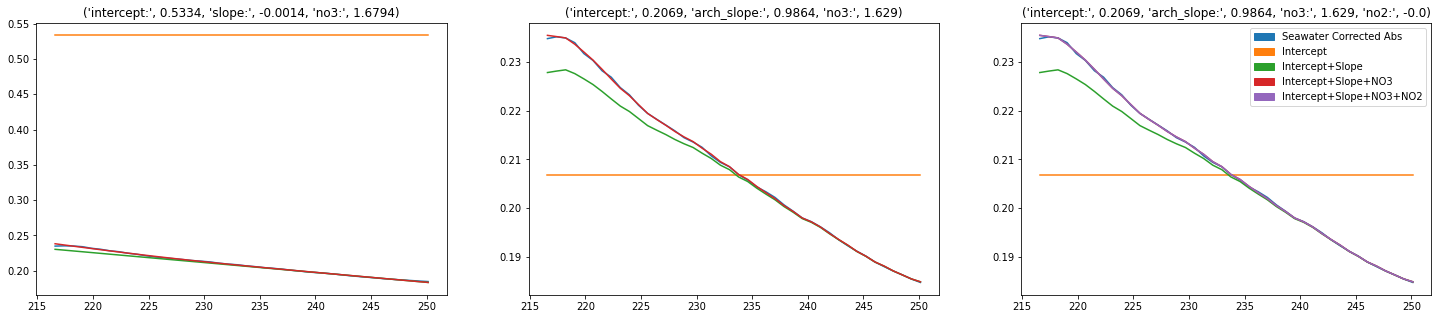

pressure 51.6


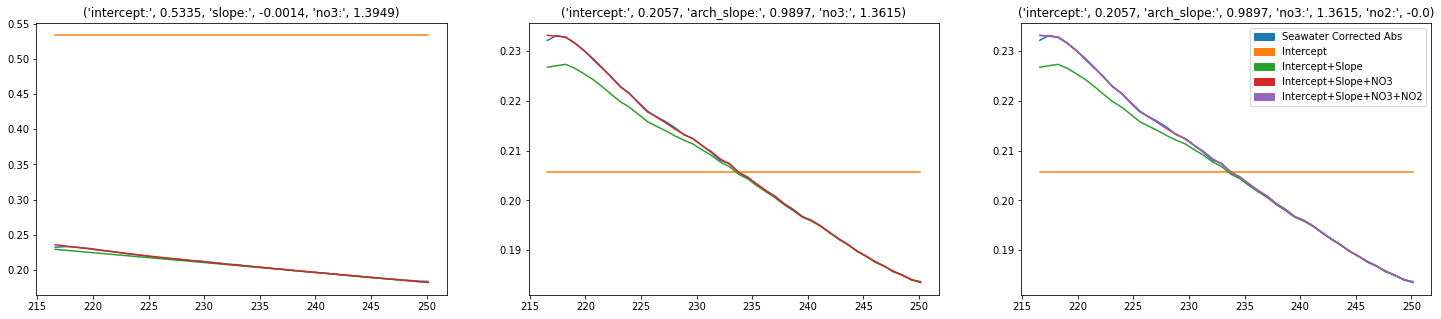

pressure 46.69


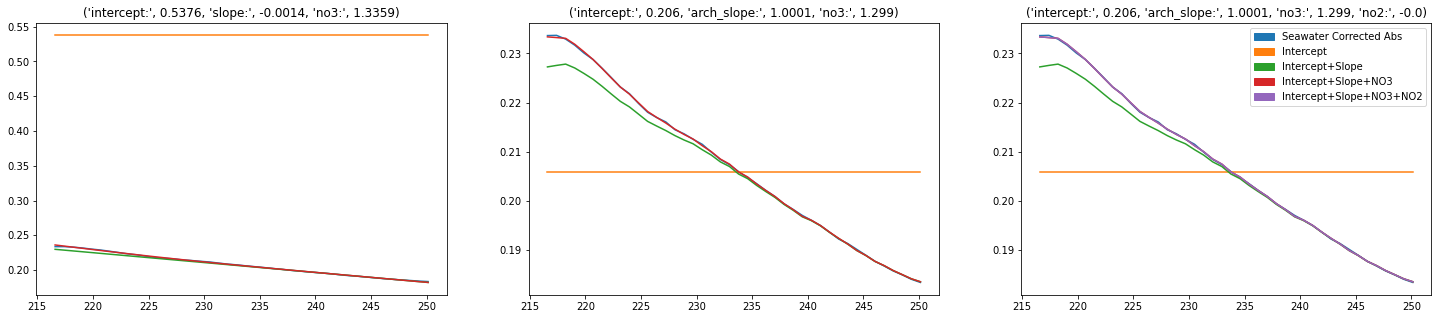

pressure 40.39


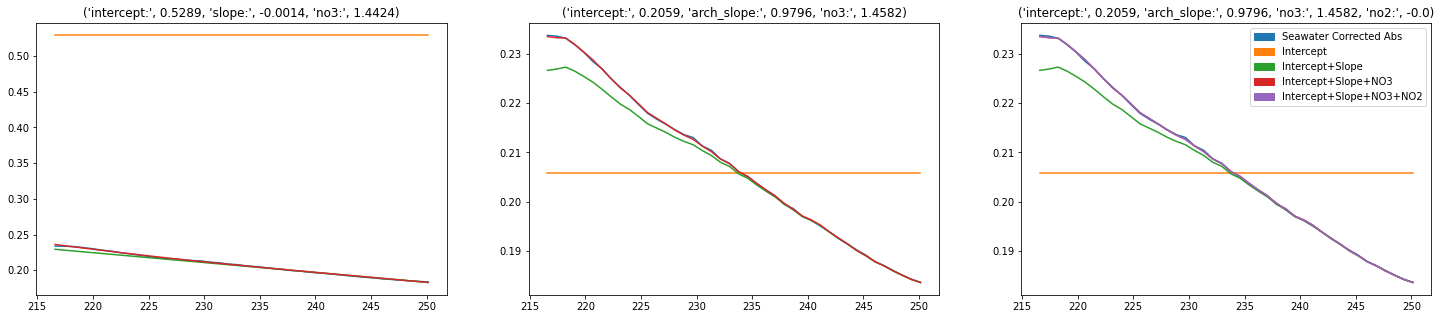

pressure 36.25


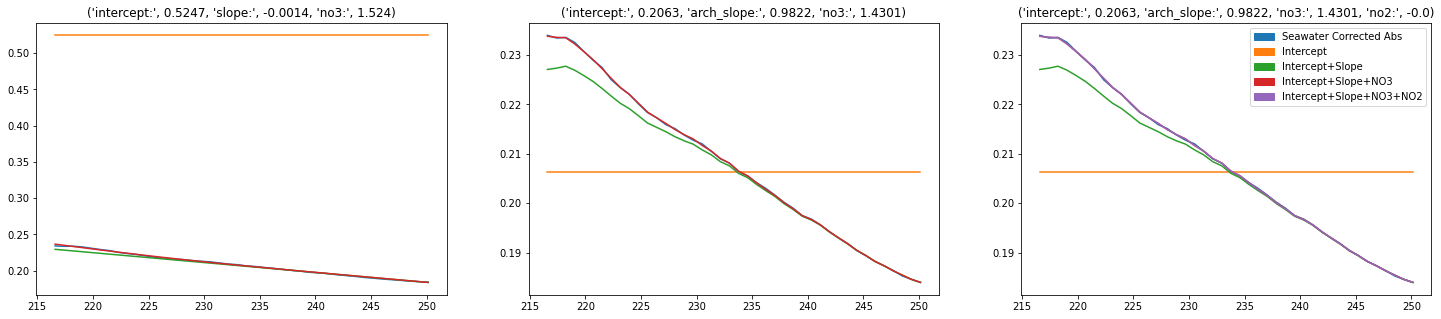

pressure 31.4


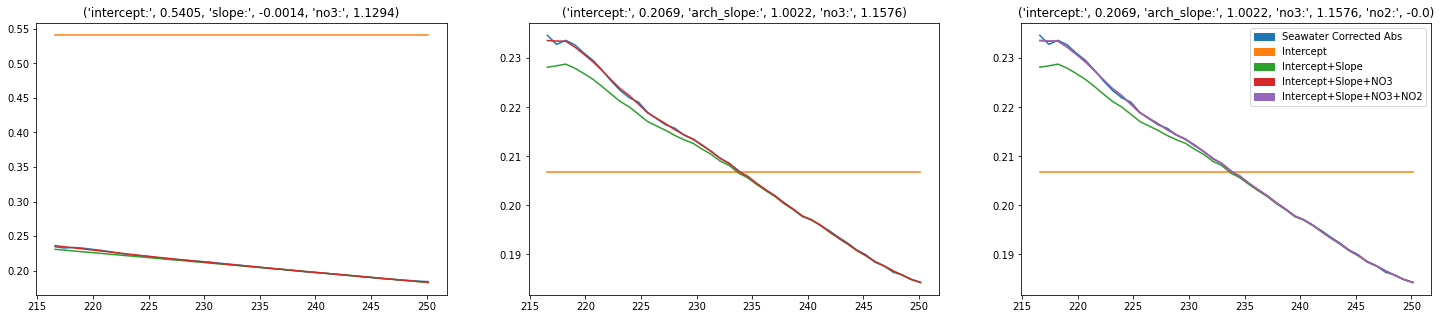

pressure 26.54


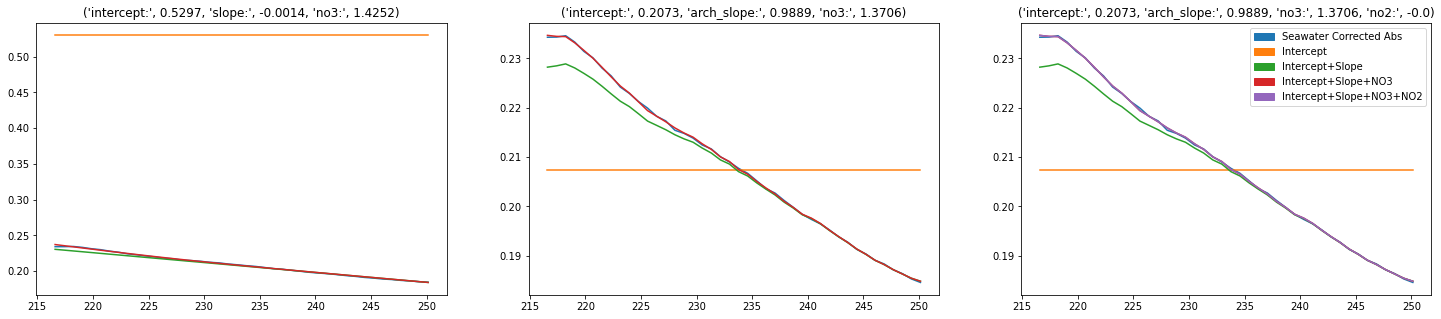

pressure 21.13


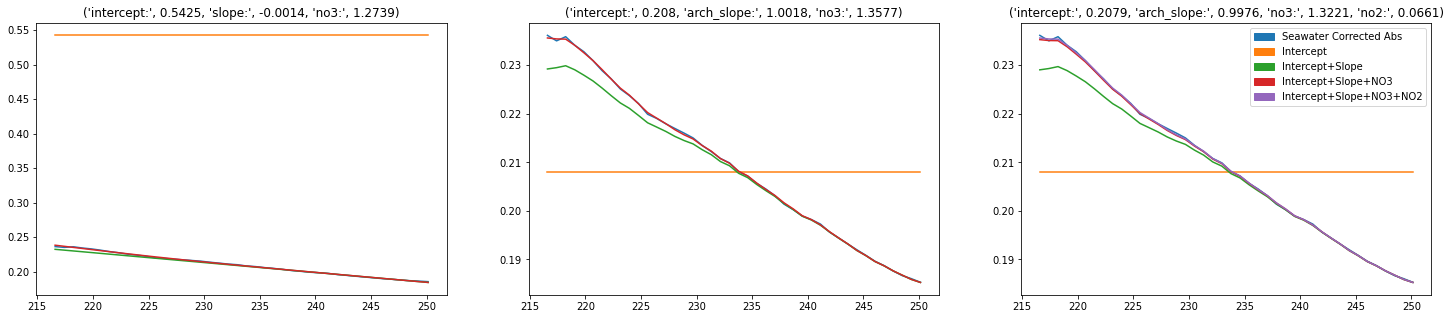

pressure 16.69


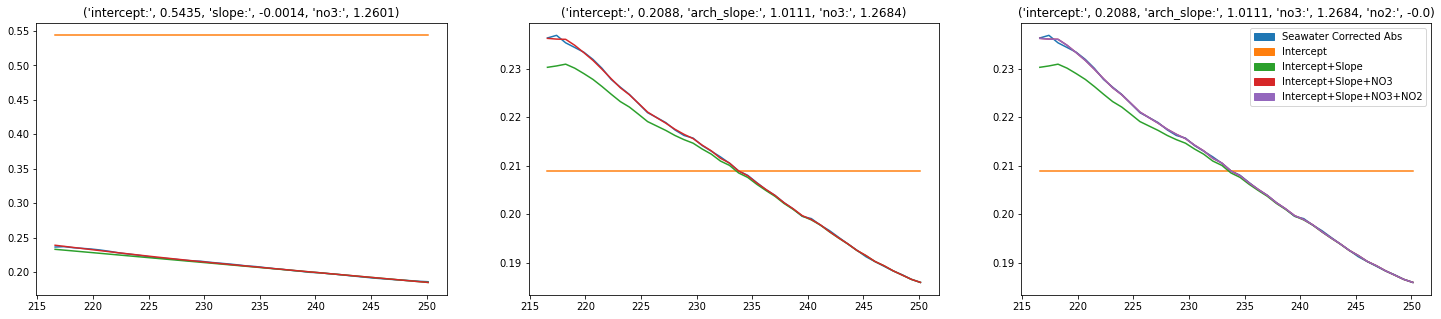

pressure 11.68


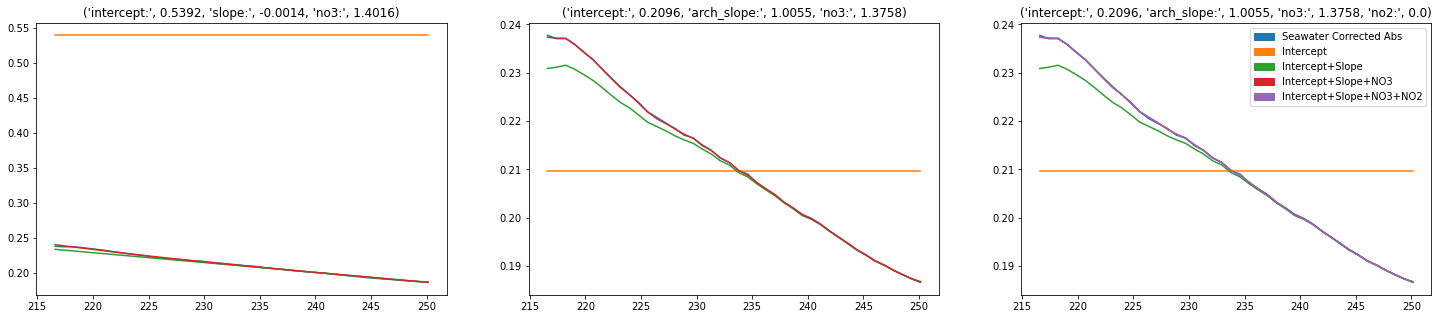

pressure 7.53


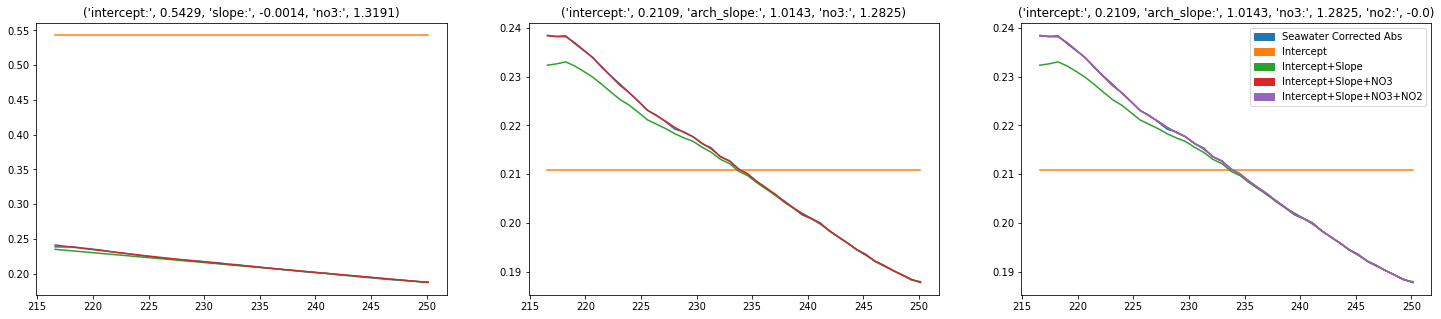

In [212]:
#Plot cycle 38 aborbance fits at different depths
import matplotlib.patches as mpatches

def plot_fit_absorbances(ax, fit_absorbances, true_absorbance):
  ax.plot(WL_ROW, true_absorbance)
  for i in range(len(fit_absorbances)):
    ax.plot(WL_ROW, np.sum(fit_absorbances[0:i+1], axis=0))

def plot_cycle38_absfits(true_absorbance, fit_orig, fit_nono2, fit_withno2, pressure):
  for i in range(len(pressure)):
    print("pressure",pressure[i])
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,5))
    ax[0].set_title(str(("intercept:",round(fit_orig[0][i][0],4),
                        "slope:", round(fit_orig[0][i][1],4),
                        "no3:", round(fit_orig[0][i][2],4))))
    plot_fit_absorbances(ax=ax[0], fit_absorbances=fit_orig[1][i], true_absorbance=true_absorbance[i])
    ax[1].set_title(str(("intercept:",round(fit_nono2[0][i][0],4),
                        "arch_slope:", round(fit_nono2[0][i][1]+fit_nono2[0][i][2],4),
                        "no3:", round(fit_nono2[0][i][3],4) )))
    plot_fit_absorbances(ax=ax[1],
      fit_absorbances=np.array([fit_nono2[1][i][0], fit_nono2[1][i][1]+fit_nono2[1][i][2], fit_nono2[1][i][3]]),
      true_absorbance=true_absorbance[i])
    ax[2].set_title(str(("intercept:", round(fit_withno2[0][i][0],4),
                        "arch_slope:", round(fit_withno2[0][i][1]+fit_withno2[0][i][2],4),
                        "no3:", round(fit_withno2[0][i][3],4),
                        "no2:", round(fit_withno2[0][i][4],4) )))
    plot_fit_absorbances(ax=ax[2],
      fit_absorbances=np.array([fit_withno2[1][i][0], fit_withno2[1][i][1]+fit_withno2[1][i][2], fit_withno2[1][i][3], fit_withno2[1][i][4]]),
      true_absorbance=true_absorbance[i])
    
    plt.legend(handles=[mpatches.Patch(color='C0', label='Seawater Corrected Abs'),
                        mpatches.Patch(color='C1', label='Intercept'),
                        mpatches.Patch(color='C2', label='Intercept+Slope'),
                        mpatches.Patch(color='C3', label='Intercept+Slope+NO3'),
                        mpatches.Patch(color='C4', label='Intercept+Slope+NO3+NO2')])

    plt.show()

plot_cycle38_absfits(true_absorbance=ABS_COR,
                     fit_orig=cycle38_repljosh,
                     fit_nono2=cycle38_withoutno2,
                     fit_withno2=cycle38_withno2,
                     pressure=PRESSURE)